#Import Library

In [ ]:
import pandas as pd                                             # Untuk manipulasi dan analisis data. Pada kode tersebut digunakan untuk membaca data dari file dan mengubahnya menjadi format dataframe.
import numpy as np                                              # Untuk komputasi numerik. Pada kode tersebut digunakan untuk melakukan perhitungan pada data yang berbentuk array.
import seaborn as sns                                           # Untuk visualisasi data yang dibangun di atas matplotlib. Pada kode tersebut digunakan untuk membuat plot visualisasi data.
import os                                                       # Untuk mengakses fungsi-fungsi sistem operasi. Pada kode tersebut digunakan untuk mengatur path direktori saat membaca data dari file.
import glob                                                     # Untuk memfilter file berdasarkan pola tertentu. Pada kode tersebut digunakan untuk mencari semua file yang berada dalam direktori tertentu.
import matplotlib.pylab as plt                                  # Untuk visualisasi data dan pembuatan grafik. Pada kode tersebut digunakan untuk membuat plot visualisasi data.
%matplotlib inline
from sklearn.model_selection import train_test_split            # Library dari sklearn untuk membagi data menjadi data latih dan data uji.
from statsmodels.tsa.stattools import adfuller                  # Library dari statsmodels untuk melakukan uji adfuller pada data deret waktu untuk mengecek apakah data stasioner atau tidak.
from sklearn.metrics import mean_squared_error                  # Library dari sklearn untuk menghitung mean squared error (MSE) dari hasil prediksi dan nilai sebenarnya pada data uji.
from sklearn.metrics import mean_absolute_error                 # Library dari sklearn untuk menghitung mean absolute error (MAE) dari hasil prediksi dan nilai sebenarnya pada data uji.
from statsmodels.tsa.arima.model import ARIMA                   # Library dari statsmodels untuk melakukan analisis dan prediksi data deret waktu dengan model ARIMA.
from datetime import datetime                                   # Library untuk pengolahan waktu.
from matplotlib.pylab import rcParams                           # Sebuah parameter yang digunakan untuk mengatur konfigurasi plot pada matplotlib. Pada kode tersebut digunakan untuk mengatur ukuran plot.
rcParams['figure.figsize'] = 10, 6

#Read Dataset

In [ ]:
# Mengakses lokasi dataset pada drive yang akan digunakan
from google.colab import drive
drive.mount('/content/drive')

# Membaca semua file dengan format .csv yang ada di folder newdataset
path = '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN'
csv_files = glob.glob(os.path.join(path, "*.csv"))

Mounted at /content/drive


In [ ]:
nama_file = os.listdir(path)

In [ ]:
data = {nama_file[i]: csv_files[i] for i in range(len(nama_file))}
data

{'Yields-Indo-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Indo-Rice.csv',
 'Yields-Phil-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Phil-Rice.csv',
 'Yields-Malay-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Malay-Rice.csv',
 'Yields-Brunei-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Brunei-Rice.csv',
 'Yields-Cambo-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Cambo-Rice.csv',
 'Yields-Myan-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Myan-Rice.csv',
 'Yields-Thai-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Thai-Rice.csv',
 'Yields-Viet-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN

In [ ]:
indonesia = pd.read_csv(csv_files[0])
filipina = pd.read_csv(csv_files[1])
malaysia = pd.read_csv(csv_files[2])
brunei = pd.read_csv(csv_files[3])
kamboja = pd.read_csv(csv_files[4])
myanmar = pd.read_csv(csv_files[5])
thailand = pd.read_csv(csv_files[6])
vietnam = pd.read_csv(csv_files[7])
laos = pd.read_csv(csv_files[8])

#Data Cleaning

In [ ]:
# Renaming the input datasets
datasets = [indonesia, filipina, malaysia, brunei, kamboja, myanmar, thailand, vietnam, laos]
titles = ["indonesia", "filipina", "malaysia", "brunei", "kamboja", "myanmar", "thailand", "vietnam", "laos"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]

data_summary.style.background_gradient(cmap='bwr')

#Atribute Selection

In [ ]:
indonesia.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
filipina.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
malaysia.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
brunei.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
kamboja.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
myanmar.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
thailand.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
vietnam.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
laos.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)

#Data Integration

In [ ]:
indonesia = indonesia.rename(columns={"Value": "ID Rice Yields"})
filipina = filipina.rename(columns={"Value": "PH Rice Yields"})
malaysia = malaysia.rename(columns={"Value": "MY Rice Yields"})
brunei = brunei.rename(columns={"Value": "BN Rice Yields"})
kamboja = kamboja.rename(columns={"Value": "KH Rice Yields"})
myanmar = myanmar.rename(columns={"Value": "MM Rice Yields"})
thailand = thailand.rename(columns={"Value": "TH Rice Yields"})
vietnam = vietnam.rename(columns={"Value": "VN Rice Yields"})
laos = laos.rename(columns={"Value": "LA Rice Yields"})

Rename attribute

Dataframe for each country

In [ ]:
# membuat data frame untuk masing-masing variabel negara.
df1 = pd.DataFrame(indonesia)
df2 = pd.DataFrame(filipina)
df3 = pd.DataFrame(malaysia)
df4 = pd.DataFrame(brunei)
df5 = pd.DataFrame(kamboja)
df6 = pd.DataFrame(myanmar)
df7 = pd.DataFrame(thailand)
df8 = pd.DataFrame(vietnam)
df9 = pd.DataFrame(laos)

merge dataframe

In [ ]:
from functools import reduce
dfl=[df1, df2, df3, df4, df5, df6, df7, df8, df9]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Year']),dfl)

In [ ]:
print(df_merged)

    Year  ID Rice Yields  PH Rice Yields  MY Rice Yields  BN Rice Yields  \
0   1961           17623           12299           21086           17306   
1   1962           17855           12548           20678           18527   
2   1963           17226           12447           21525           13711   
3   1964           17630           12478           19968           13235   
4   1965           17708           13099           21578           11737   
..   ...             ...             ...             ...             ...   
56  2017           50690           40061           37496           16604   
57  2018           52031           39718           37704           20040   
58  2019           51137           40449           35009           19410   
59  2020           51279           40888           36538           29442   
60  2021           52263           41540           37452           28852   

    KH Rice Yields  MM Rice Yields  TH Rice Yields  VN Rice Yields  \
0            1092

In [ ]:
df_merged.head(3)

Year  ID Rice Yields  PH Rice Yields  MY Rice Yields  BN Rice Yields  \
0  1961           17623           12299           21086           17306   
1  1962           17855           12548           20678           18527   
2  1963           17226           12447           21525           13711   

   KH Rice Yields  MM Rice Yields  TH Rice Yields  VN Rice Yields  \
0           10921           16066           16585           18966   
1            8920           16469           17202           19937   
2           11742           15957           18725           21400   

   LA Rice Yields  
0            8710  
1            8644  
2            8667

In [ ]:
# Mengonversi kolom tahun menjadi objek datetime dengan format tertentu
df_merged['Year'] = pd.to_datetime(df_merged['Year'], format='%Y')

# Menampilkan hasil konversi
print(df_merged['Year'])

0    1961-01-01
1    1962-01-01
2    1963-01-01
3    1964-01-01
4    1965-01-01
        ...    
56   2017-01-01
57   2018-01-01
58   2019-01-01
59   2020-01-01
60   2021-01-01
Name: Year, Length: 61, dtype: datetime64[ns]


In [ ]:
print(df_merged.dtypes)

Year              datetime64[ns]
ID Rice Yields             int64
PH Rice Yields             int64
MY Rice Yields             int64
BN Rice Yields             int64
KH Rice Yields             int64
MM Rice Yields             int64
TH Rice Yields             int64
VN Rice Yields             int64
LA Rice Yields             int64
dtype: object


In [ ]:
df_merged.index = df_merged['Year']

In [ ]:
print(df_merged.dtypes)

Year              datetime64[ns]
ID Rice Yields             int64
PH Rice Yields             int64
MY Rice Yields             int64
BN Rice Yields             int64
KH Rice Yields             int64
MM Rice Yields             int64
TH Rice Yields             int64
VN Rice Yields             int64
LA Rice Yields             int64
dtype: object


In [ ]:
for column in ['ID Rice Yields', 'PH Rice Yields', 'MY Rice Yields', 'BN Rice Yields', 'KH Rice Yields',
               'TH Rice Yields', 'MM Rice Yields', 'VN Rice Yields', 'LA Rice Yields']:
    print(type(df_merged[column]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Visualisasi data

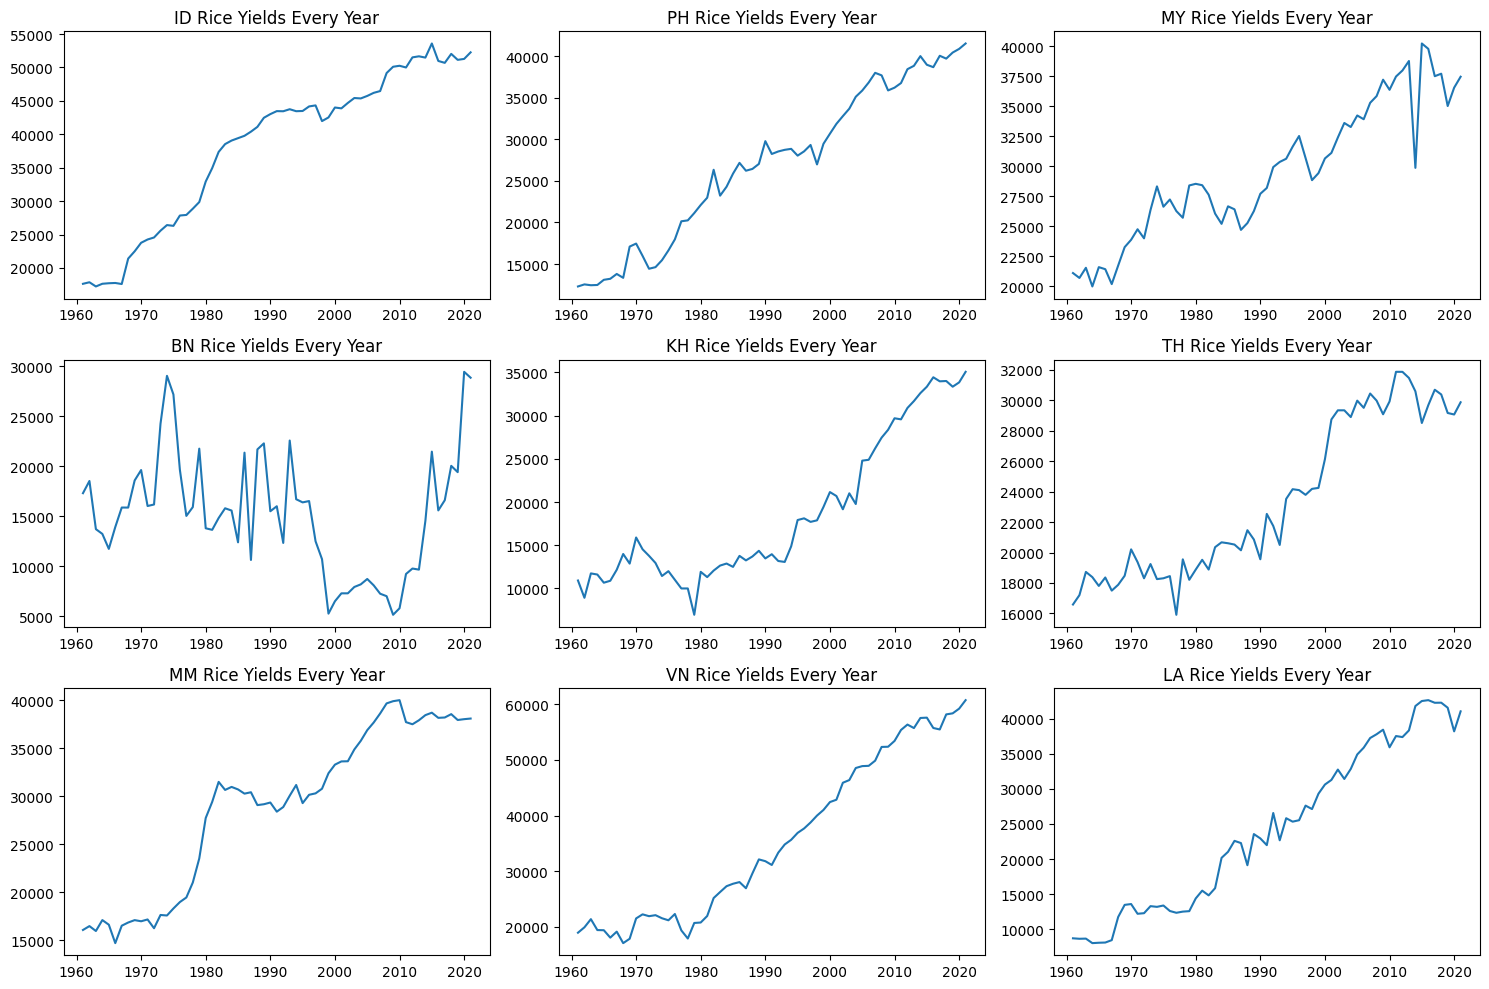

In [ ]:
all_feature = ['ID Rice Yields', 'PH Rice Yields', 'MY Rice Yields', 'BN Rice Yields', 'KH Rice Yields', 'TH Rice Yields', 'MM Rice Yields', 'VN Rice Yields', 'LA Rice Yields']
df_merged[all_feature]
plot_features = df_merged.groupby(df_merged.index)[all_feature].mean()

fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(15, 10),
    facecolor="w",
    edgecolor="k"
)

for i, feature in enumerate(all_feature):
    axes[i // 3, i % 3].plot(plot_features[feature])
    axes[i // 3, i % 3].set_title(f'{feature} Every Year')

plt.tight_layout()

plt.show()

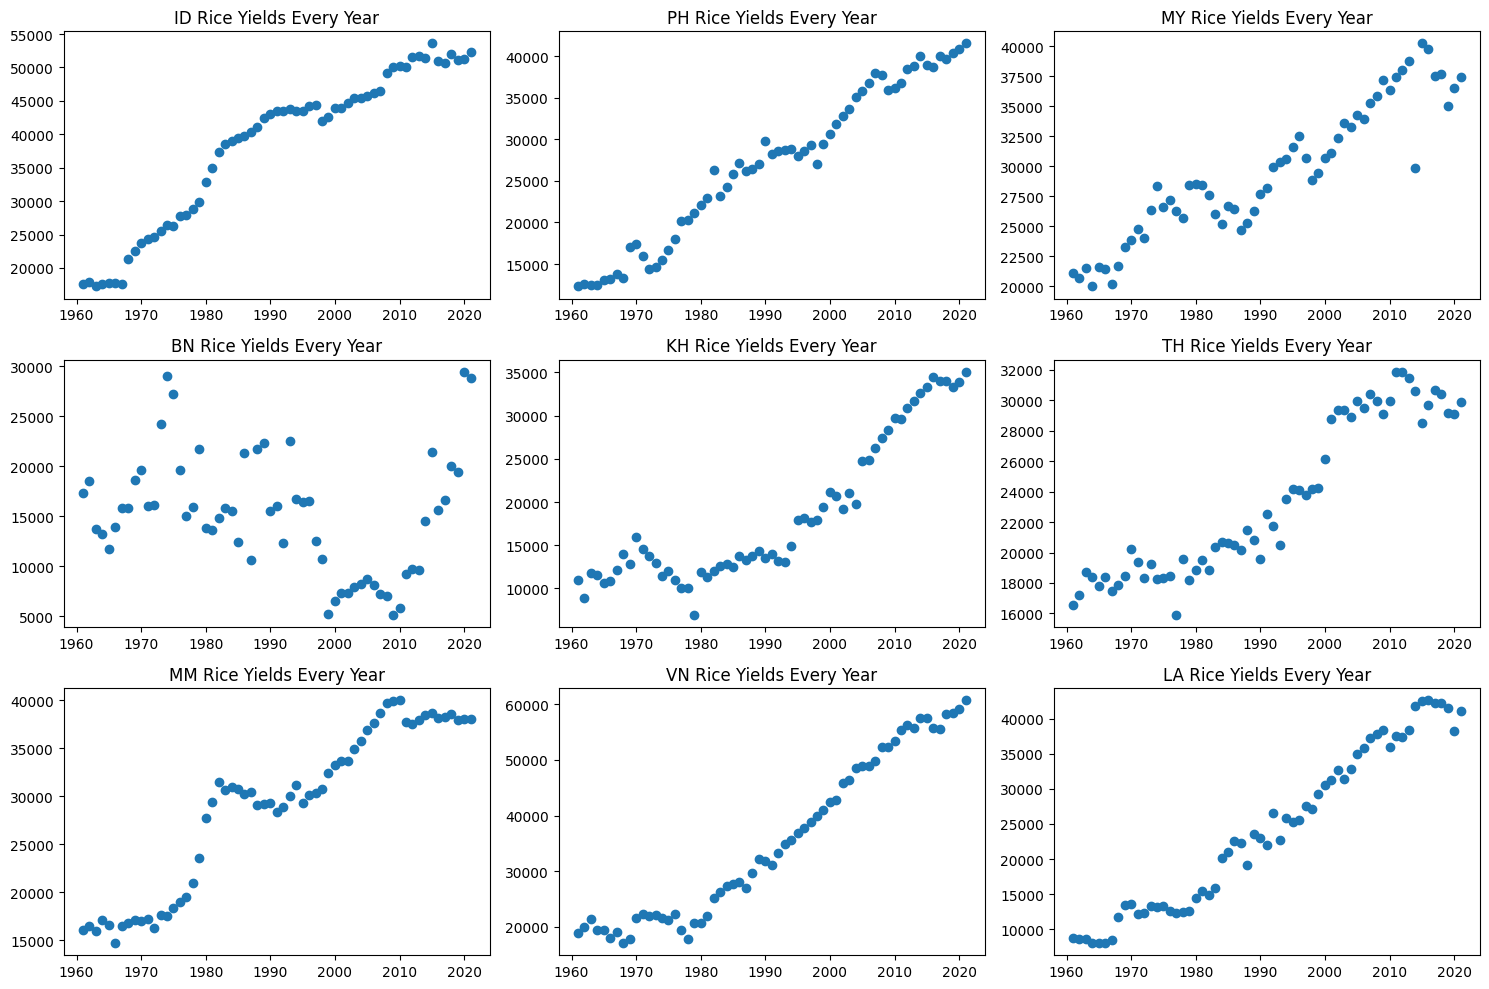

In [ ]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(15, 10),
    facecolor="w",
    edgecolor="k"
)

for i, feature in enumerate(all_feature):
    axes[i // 3, i % 3].scatter(plot_features.index, plot_features[feature])
    axes[i // 3, i % 3].set_title(f'{feature} Every Year')

plt.tight_layout()

plt.show()

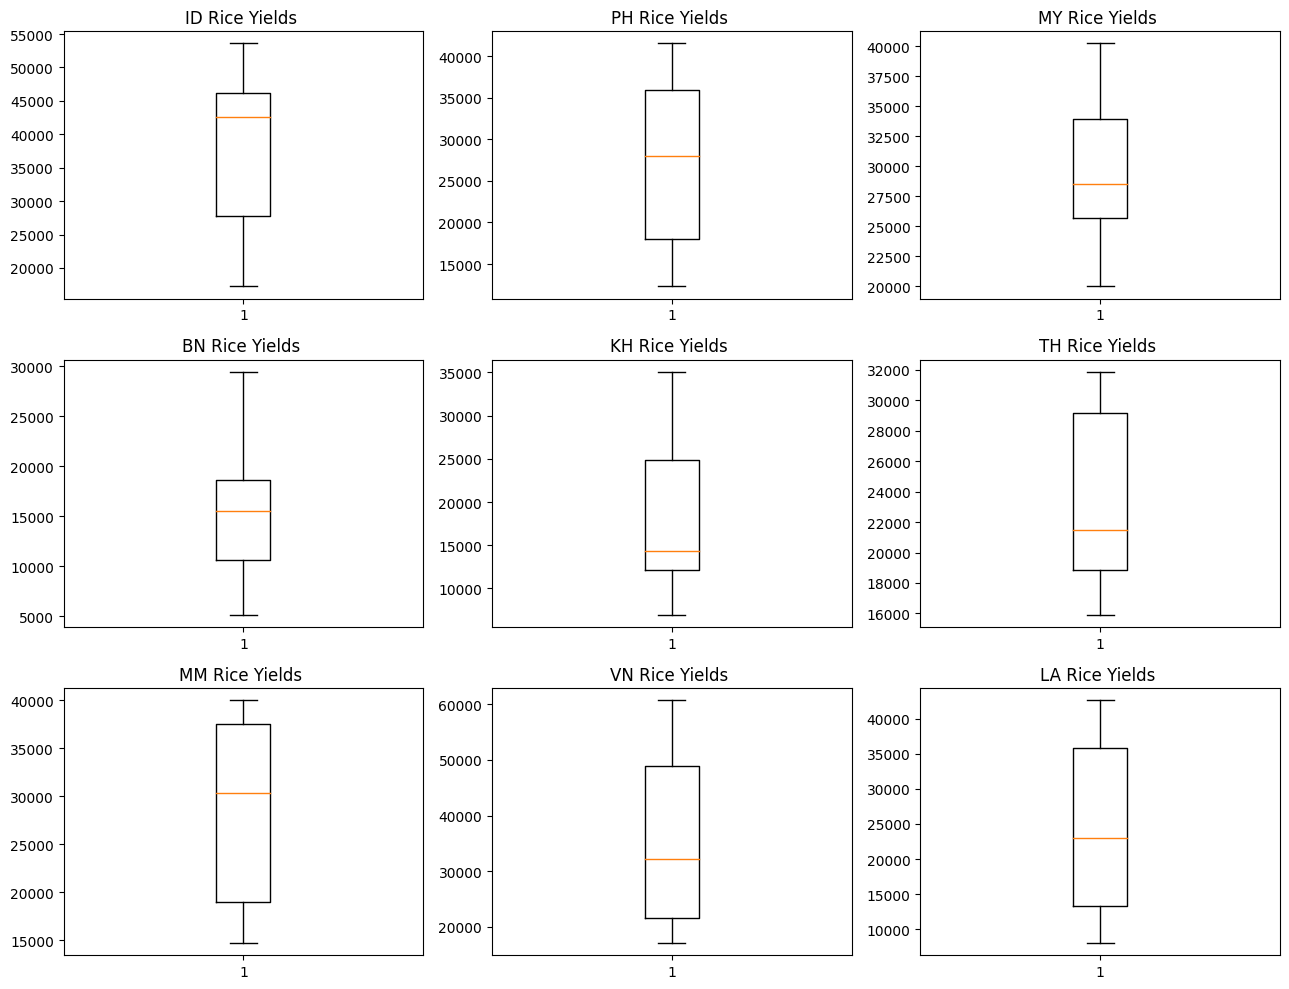

In [ ]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(13, 10),
    facecolor="w",
    edgecolor="k"
)

for i, feature in enumerate(all_feature):
    axes[i // 3, i % 3].boxplot(plot_features[feature])
    axes[i // 3, i % 3].set_title(f'{feature} ')

plt.tight_layout()

plt.show()

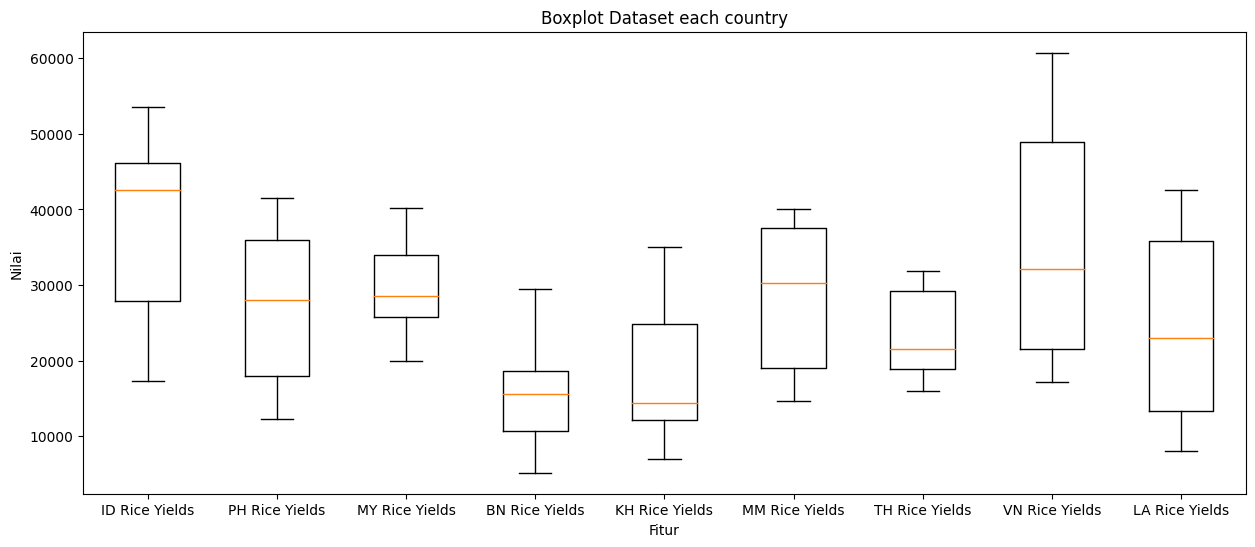

In [ ]:
numerical_columns = df_merged.select_dtypes(include='number')

# Create boxplot
plt.figure(figsize=(15, 6))
plt.boxplot(numerical_columns.values)
plt.xticks(range(1, len(numerical_columns.columns) + 1), numerical_columns.columns)
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.title('Boxplot Dataset each country')
plt.show()

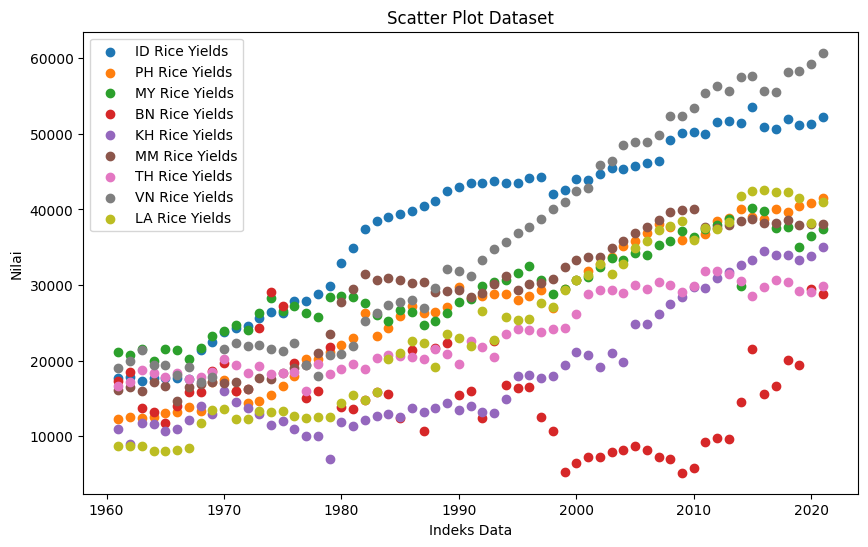

In [ ]:
plt.figure(figsize=(10, 6))
for column in df_merged.columns:
    if column != 'Year':
        plt.scatter(df_merged.index, df_merged[column], label=column)
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.title('Scatter Plot Dataset')
plt.legend()
plt.show()


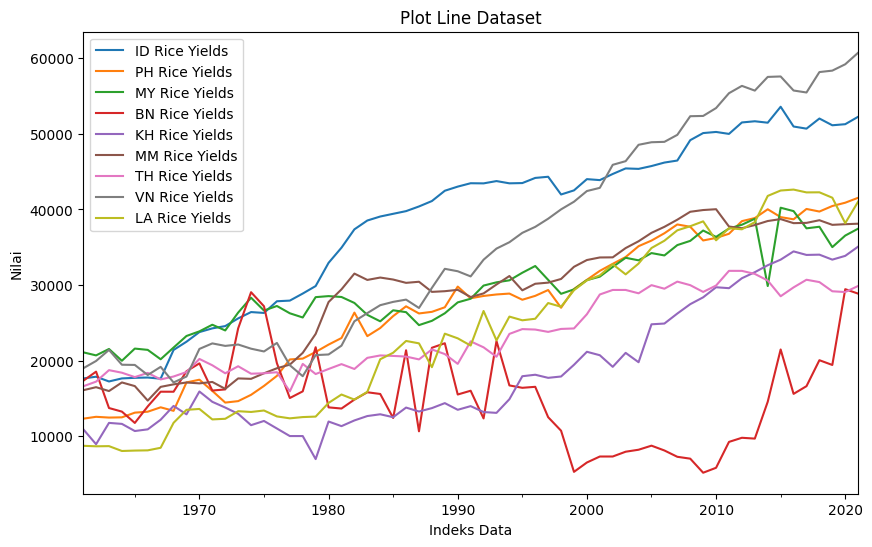

In [ ]:
plt.figure(figsize=(10, 6))
for column in df_merged.columns:
    if column != 'Year':
        df_merged[column].plot(kind='line', label=column)
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.title('Plot Line Dataset')
plt.legend()
plt.show()


# Normalisasi Data

In [ ]:
def scaled_data(df_merged):
    for i in df_merged:
        if i != 'Year':  # Tambahkan kondisi untuk mengecualikan kolom 'year'
            x = df_merged[i].max()
            y = len(str(abs(x)))
            df_merged[i] = df_merged[i] / 10**y

    return df_merged

In [ ]:
scaled_data

<function __main__.scaled_data(df_merged)>

In [ ]:
print(scaled_data(df_merged))

                 Year  ID Rice Yields  PH Rice Yields  MY Rice Yields  \
Year                                                                    
1961-01-01 1961-01-01         0.17623         0.12299         0.21086   
1962-01-01 1962-01-01         0.17855         0.12548         0.20678   
1963-01-01 1963-01-01         0.17226         0.12447         0.21525   
1964-01-01 1964-01-01         0.17630         0.12478         0.19968   
1965-01-01 1965-01-01         0.17708         0.13099         0.21578   
...               ...             ...             ...             ...   
2017-01-01 2017-01-01         0.50690         0.40061         0.37496   
2018-01-01 2018-01-01         0.52031         0.39718         0.37704   
2019-01-01 2019-01-01         0.51137         0.40449         0.35009   
2020-01-01 2020-01-01         0.51279         0.40888         0.36538   
2021-01-01 2021-01-01         0.52263         0.41540         0.37452   

            BN Rice Yields  KH Rice Yields  MM Ric

# Uji Stasioneritas

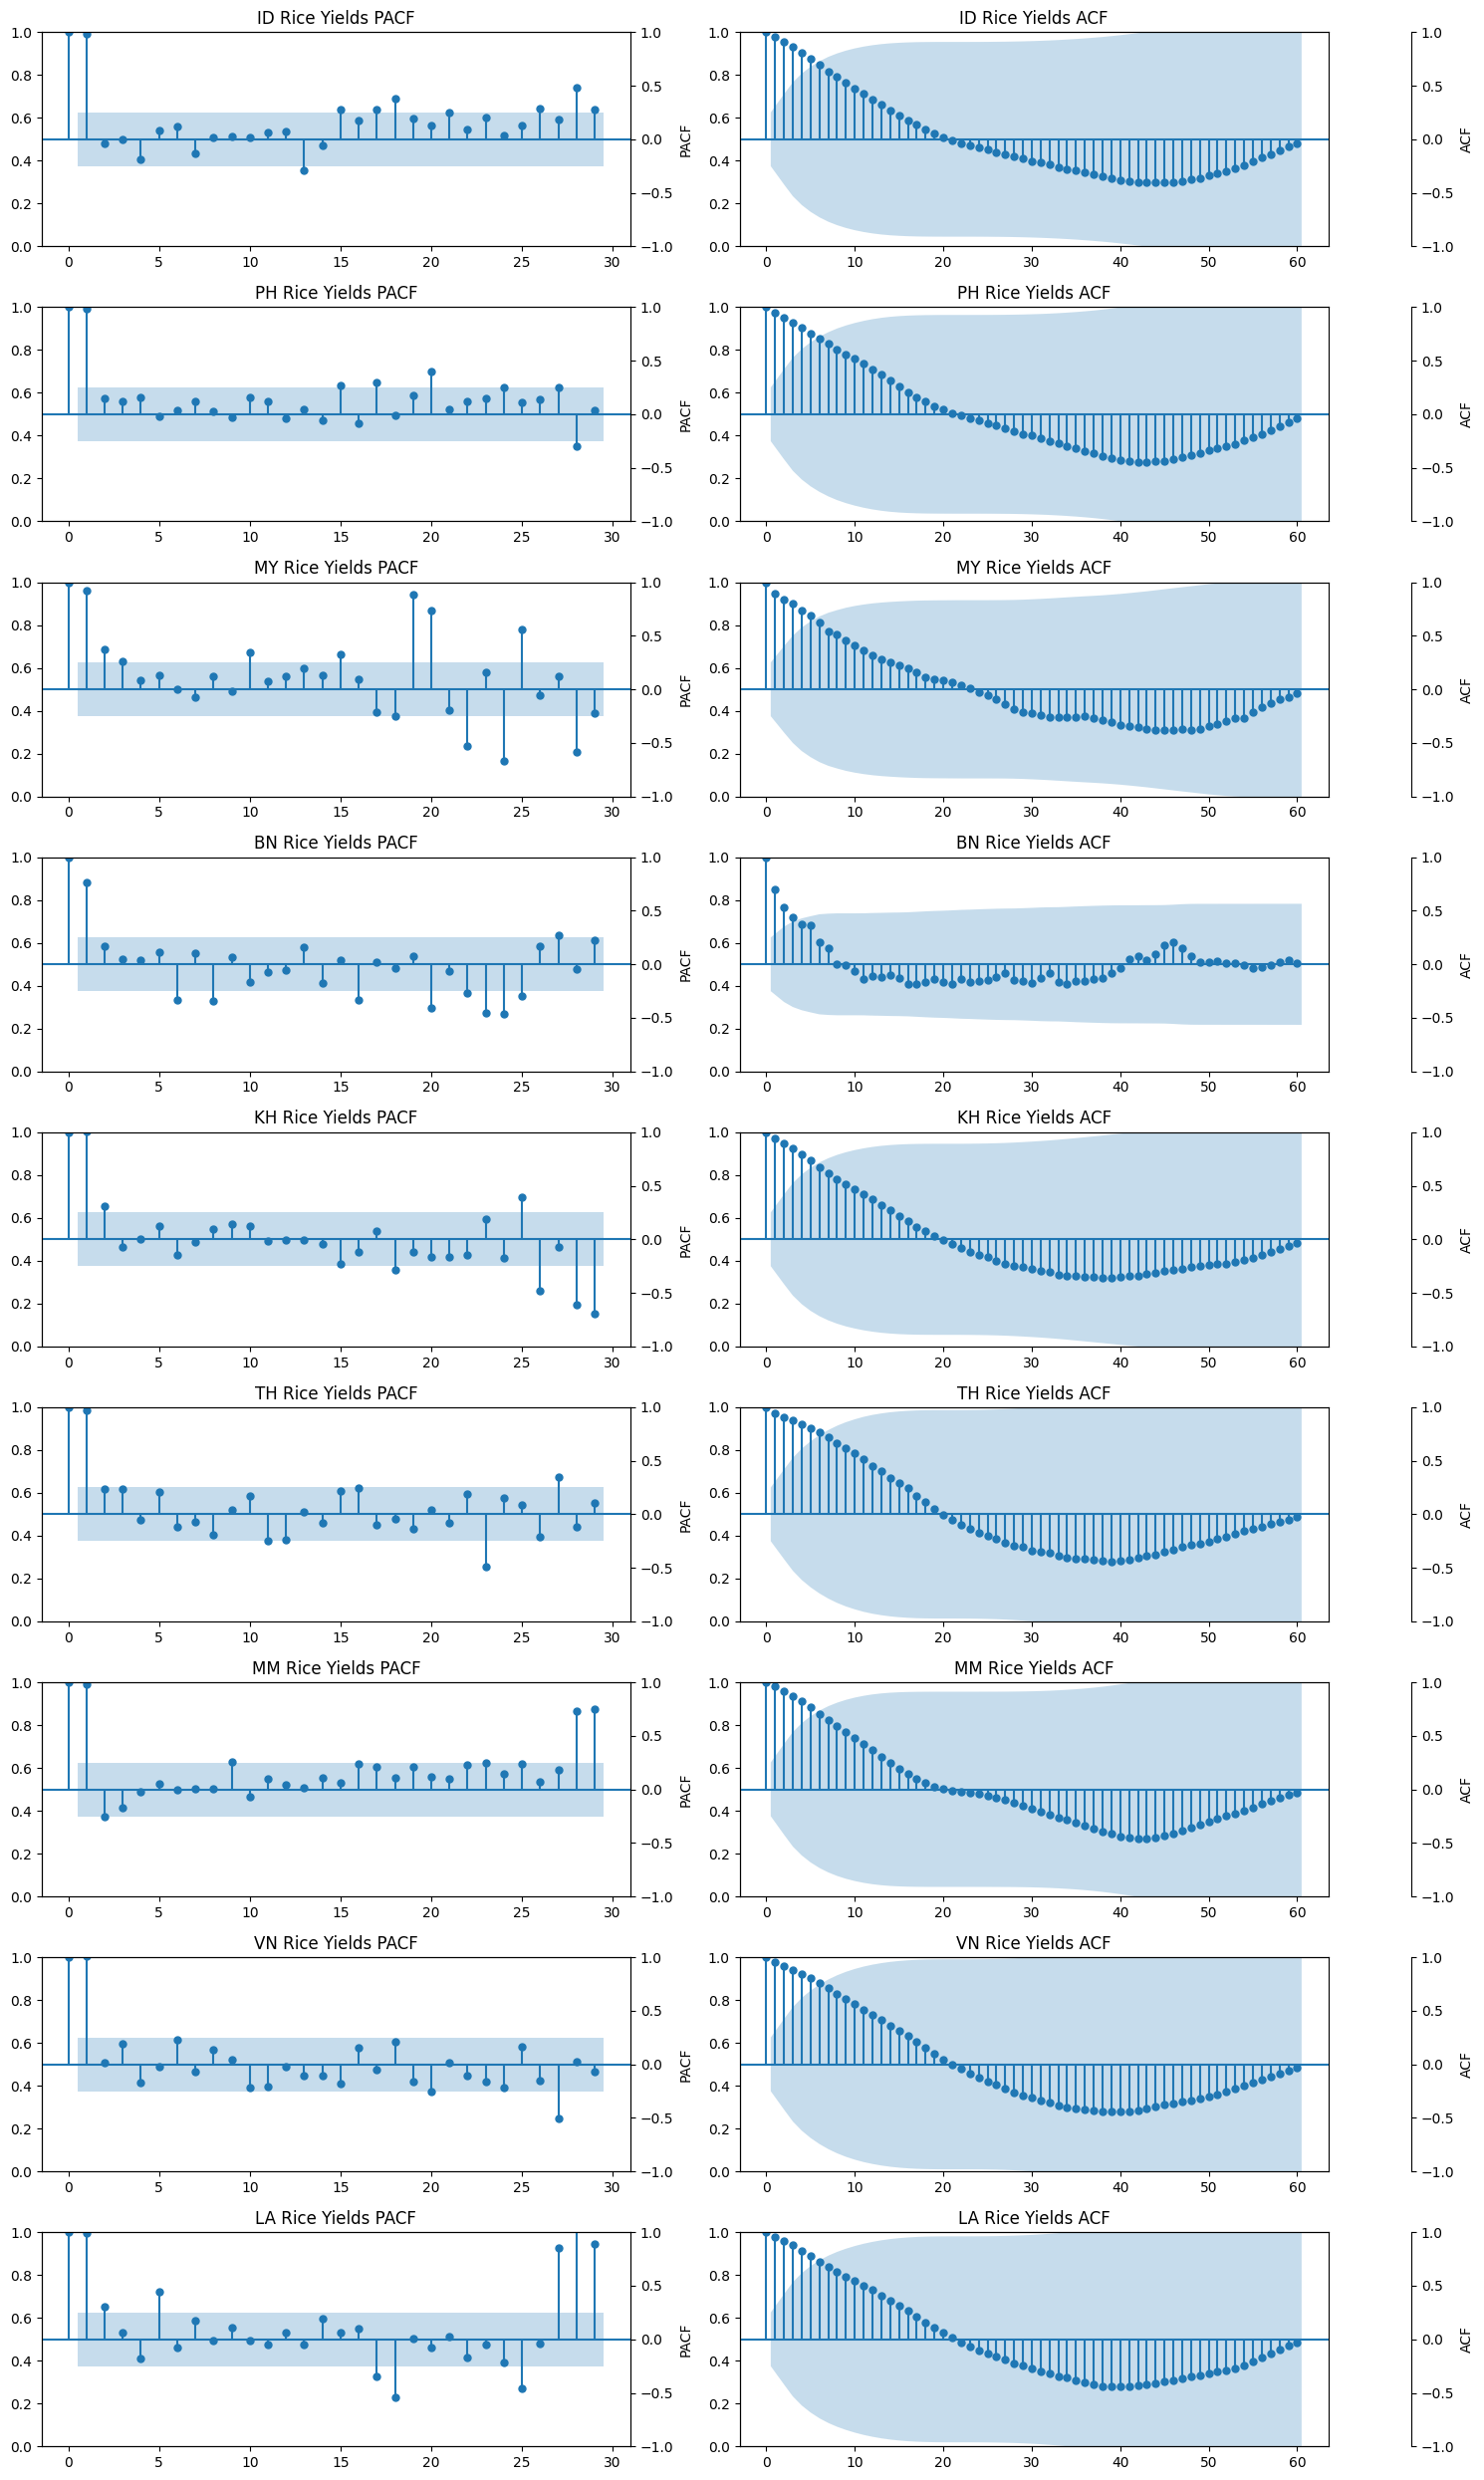

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

colomns = ['ID Rice Yields', 'PH Rice Yields', 'MY Rice Yields', 'BN Rice Yields', 'KH Rice Yields', 'TH Rice Yields', 'MM Rice Yields', 'VN Rice Yields', 'LA Rice Yields']
plot_variables = df_merged.groupby(df_merged.index)[colomns].mean()

fig, axes = plt.subplots(
    nrows=len(colomns),
    ncols=2,
    figsize=(15, 25),
    facecolor="w",
    edgecolor="k"
)

for i, variable in enumerate(colomns):
    # Plot PACF
    ax_pacf = axes[i, 0].twinx()
    ax_pacf.set_ylabel('PACF')
    plot_pacf(plot_variables[variable].values.ravel(), ax=ax_pacf, lags=range(0, int(0.5*len(df_merged))), title=f'{variable} PACF', method='ols')


    # Plot ACF
    ax_acf = axes[i, 1].twinx()
    ax_acf.spines['right'].set_position(('outward', 60))
    ax_acf.set_ylabel('ACF')
    plot_acf(plot_variables[variable].values.ravel(), ax=ax_acf, lags=range(0, len(df_merged)), title=f'{variable} ACF')


plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Ambil kolom 'ID Rice Yields', 'PH Rice Yields', dsb. sebagai dataset numerik
dataset = [df_merged['ID Rice Yields'], df_merged['PH Rice Yields'], df_merged['MY Rice Yields'], df_merged['BN Rice Yields'], df_merged['KH Rice Yields'], df_merged['TH Rice Yields'], df_merged['MM Rice Yields'], df_merged['VN Rice Yields'], df_merged['LA Rice Yields']]

# melakukan loop pada setiap dataset dan menguji stasioneritas dengan ADF
for i, dataset in enumerate(dataset):
    result = adfuller(dataset)
    print(f'Dataset {i+1}:\nADF Statistic: {result[0]}\np-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[0] < result[4]['5%']:
        print('Reject H0, the test results show the data is stationary.')
    else:
        print('Accept H0, the test results show the data is not stationary.')
    print()

Dataset 1:
ADF Statistic: -1.6104987567431517
p-value: 0.4777138168514945
Critical Values: {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}
Accept H0, the test results show the data is not stationary.

Dataset 2:
ADF Statistic: -0.5476624548663465
p-value: 0.8823751656377392
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Accept H0, the test results show the data is not stationary.

Dataset 3:
ADF Statistic: -0.9805445924275104
p-value: 0.7602939144425074
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Accept H0, the test results show the data is not stationary.

Dataset 4:
ADF Statistic: -1.7894781405077698
p-value: 0.38569787530275756
Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
Accept H0, the test results show the data is not stationary.

Dataset 5:
ADF Statistic: 0.804398906984613
p-value: 0.99170684

In [ ]:
df_merged['Diff_indonesia'] = df_merged['ID Rice Yields'].diff()
df_merged['Diff_filipina'] = df_merged['PH Rice Yields'].diff()
df_merged['Diff_malaysia'] = df_merged['MY Rice Yields'].diff()
df_merged['Diff_brunei'] = df_merged['BN Rice Yields'].diff()
df_merged['Diff_kamboja'] = df_merged['KH Rice Yields'].diff()
df_merged['Diff_myanmar'] = df_merged['TH Rice Yields'].diff()
df_merged['Diff_thailand'] = df_merged['MM Rice Yields'].diff()
df_merged['Diff_vietnam'] = df_merged['VN Rice Yields'].diff()
df_merged['Diff_laos'] = df_merged['LA Rice Yields'].diff()

In [ ]:
df_merged = df_merged.dropna()

In [ ]:
df_merged.isnull().sum()

Year              0
ID Rice Yields    0
PH Rice Yields    0
MY Rice Yields    0
BN Rice Yields    0
KH Rice Yields    0
MM Rice Yields    0
TH Rice Yields    0
VN Rice Yields    0
LA Rice Yields    0
Diff_indonesia    0
Diff_filipina     0
Diff_malaysia     0
Diff_brunei       0
Diff_kamboja      0
Diff_myanmar      0
Diff_thailand     0
Diff_vietnam      0
Diff_laos         0
dtype: int64

In [ ]:
data = [df_merged['Diff_indonesia'], df_merged['Diff_filipina'], df_merged['Diff_malaysia'], df_merged['Diff_brunei'], df_merged['Diff_kamboja'], df_merged['Diff_myanmar'], df_merged['Diff_thailand'], df_merged['Diff_vietnam'], df_merged['Diff_laos']]

# melakukan loop pada setiap dataset dan menguji stasioneritas dengan ADF
for i, data in enumerate(data):
    result = adfuller(data)
    print(f'Dataset {i+1}:\nADF Statistic: {result[0]}\np-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[0] < result[4]['5%']:
        print('Reject H0, the test results show the data is stationary.')
    else:
        print('Accept H0, the test results show the data is not stationary.')
    print()

Dataset 1:
ADF Statistic: -3.309217359434935
p-value: 0.014471452257879842
Critical Values: {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
Reject H0, the test results show the data is stationary.

Dataset 2:
ADF Statistic: -8.799582879544959
p-value: 2.1301839543629973e-14
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Reject H0, the test results show the data is stationary.

Dataset 3:
ADF Statistic: -8.198013265465722
p-value: 7.359271417214418e-13
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Reject H0, the test results show the data is stationary.

Dataset 4:
ADF Statistic: -10.071812580836609
p-value: 1.2532028655047674e-17
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Reject H0, the test results show the data is stationary.

Dataset 5:
ADF Statistic: -10.334983233043419
p-value: 2.77899302223

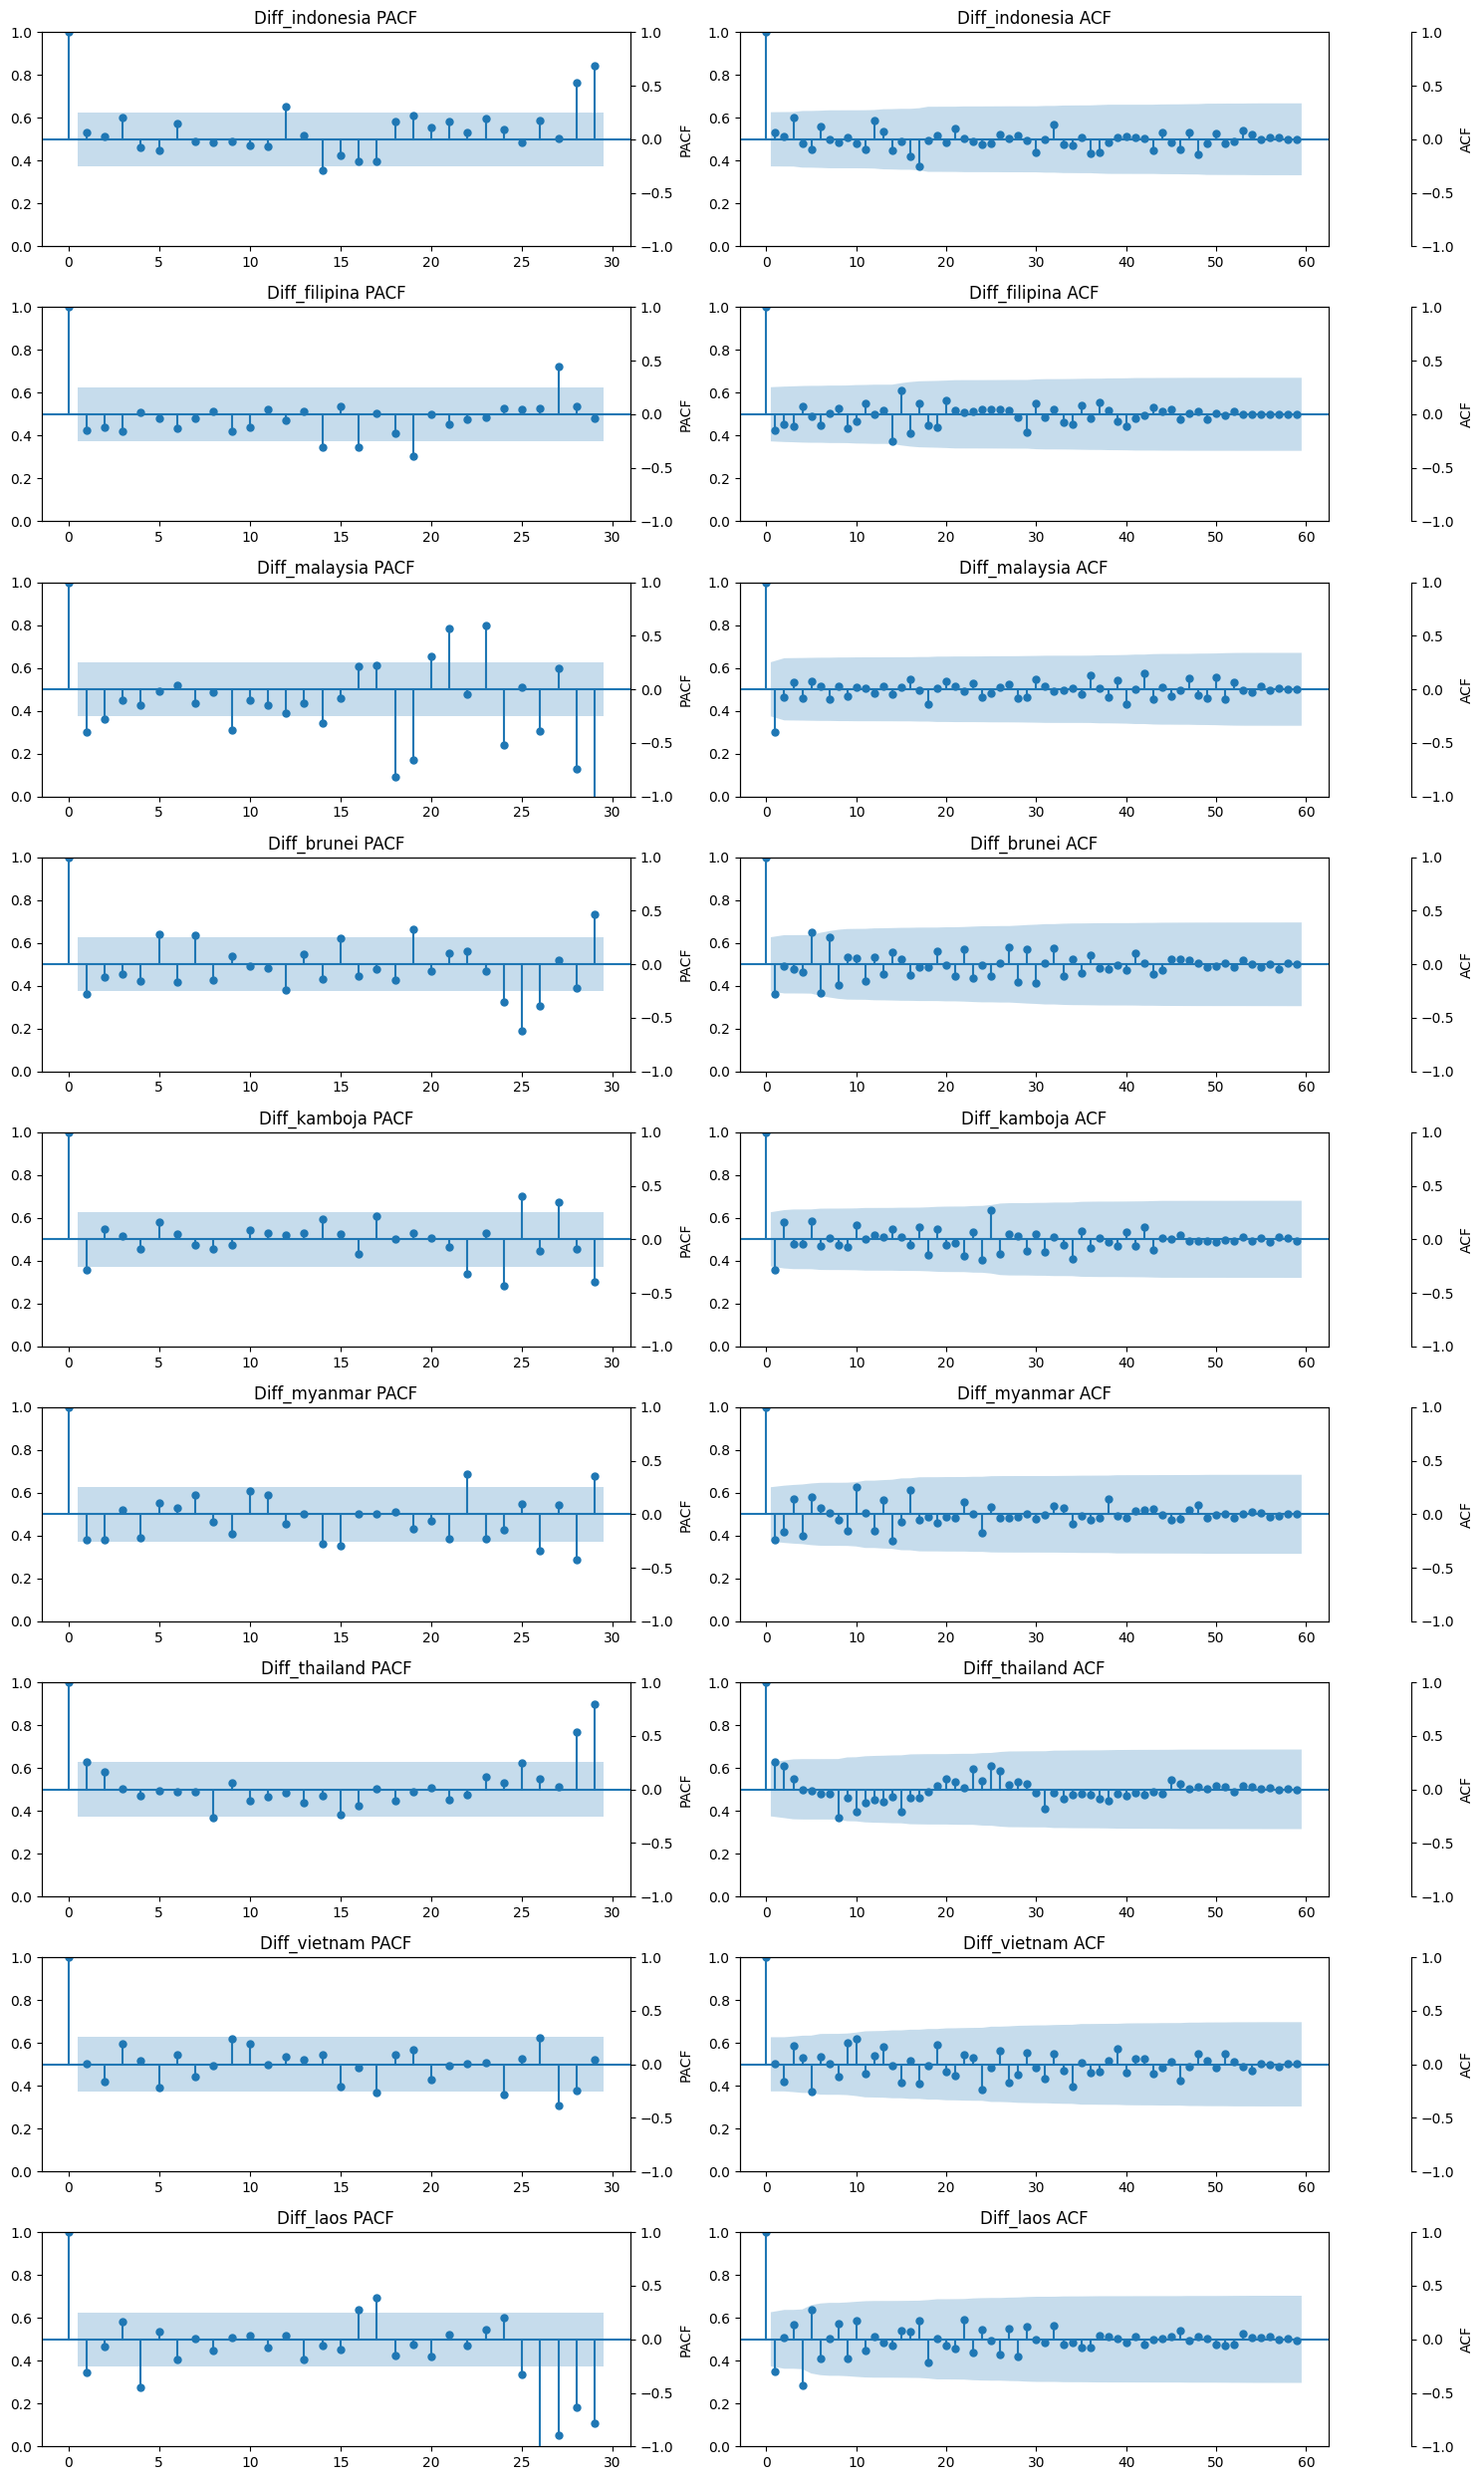

In [ ]:
colomns = ['Diff_indonesia', 'Diff_filipina', 'Diff_malaysia', 'Diff_brunei', 'Diff_kamboja', 'Diff_myanmar', 'Diff_thailand', 'Diff_vietnam', 'Diff_laos']
plot_variables = df_merged.groupby(df_merged.index)[colomns].mean()

fig, axes = plt.subplots(
    nrows=len(colomns),
    ncols=2,
    figsize=(15, 25),
    facecolor="w",
    edgecolor="k"
)

for i, variable in enumerate(colomns):
    # Plot PACF
    ax_pacf = axes[i, 0].twinx()
    ax_pacf.set_ylabel('PACF')
    plot_pacf(plot_variables[variable].values.ravel(), ax=ax_pacf, lags=range(0, int(0.5*len(df_merged))), title=f'{variable} PACF', method='ols')


    # Plot ACF
    ax_acf = axes[i, 1].twinx()
    ax_acf.spines['right'].set_position(('outward', 60))
    ax_acf.set_ylabel('ACF')
    plot_acf(plot_variables[variable].values.ravel(), ax=ax_acf, lags=range(0, len(df_merged)), title=f'{variable} ACF')


plt.tight_layout()
plt.show()

In [ ]:
print(df_merged.dtypes)

Year              datetime64[ns]
ID Rice Yields           float64
PH Rice Yields           float64
MY Rice Yields           float64
BN Rice Yields           float64
KH Rice Yields           float64
MM Rice Yields           float64
TH Rice Yields           float64
VN Rice Yields           float64
LA Rice Yields           float64
Diff_indonesia           float64
Diff_filipina            float64
Diff_malaysia            float64
Diff_brunei              float64
Diff_kamboja             float64
Diff_myanmar             float64
Diff_thailand            float64
Diff_vietnam             float64
Diff_laos                float64
dtype: object


In [ ]:
len(df_merged)

60

# Split Dataset

In [ ]:
# Split the data into train and test sets
train_data, test_data = train_test_split(df_merged, test_size=0.3, shuffle=False)

In [ ]:
print(len(train_data))
print(len(test_data))

42
18


# Select Exogenous and Endogenous Variable

In [ ]:
# Select Exog and Edog Indonesia
train_ID_X = train_data[['Diff_filipina','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_ID_y = train_data['Diff_indonesia']

test_ID_X = test_data[['Diff_filipina','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_ID_y = test_data['Diff_indonesia']

# Select Exog and Edog  Malaysia
train_MY_X = train_data[['Diff_indonesia','Diff_filipina','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_MY_y = train_data['Diff_malaysia']

test_MY_X = test_data[['Diff_indonesia','Diff_filipina','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_MY_y = test_data['Diff_malaysia']

# Select Exog and Edog Thailand
train_TH_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_filipina','Diff_kamboja','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_TH_y = train_data['Diff_thailand']

test_TH_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_filipina','Diff_kamboja','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_TH_y = test_data['Diff_thailand']

# Select Exog and Edog Filipina
train_PH_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_PH_y = train_data['Diff_filipina']

test_PH_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_PH_y = test_data['Diff_filipina']

# Select Exog and Edog Vietnam
train_VN_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_myanmar','Diff_laos']]
train_VN_y = train_data['Diff_vietnam']

test_VN_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_myanmar','Diff_laos']]
test_VN_y = test_data['Diff_vietnam']

# Select Exog and Edog Brunei
train_BN_X = train_data[['Diff_indonesia','Diff_filipina','Diff_malaysia','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_BN_y = train_data['Diff_brunei']

test_BN_X = test_data[['Diff_indonesia','Diff_filipina','Diff_malaysia','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_BN_y = test_data['Diff_brunei']

# Select Exog and Edog Laos
train_LA_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_myanmar','Diff_vietnam']]
train_LA_y = train_data['Diff_laos']

test_LA_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_myanmar','Diff_vietnam']]
test_LA_y = test_data['Diff_laos']

# Select Exog and Edog Myanmar
train_MM_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_vietnam','Diff_laos']]
train_MM_y = train_data['Diff_myanmar']

test_MM_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_vietnam','Diff_laos']]
test_MM_y = test_data['Diff_myanmar']

# Select Exog and Edog Kamboja
train_KH_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_filipina','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_KH_y = train_data['Diff_kamboja']

test_KH_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_filipina','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_KH_y = test_data['Diff_kamboja']


# Plot ACF dan PACF

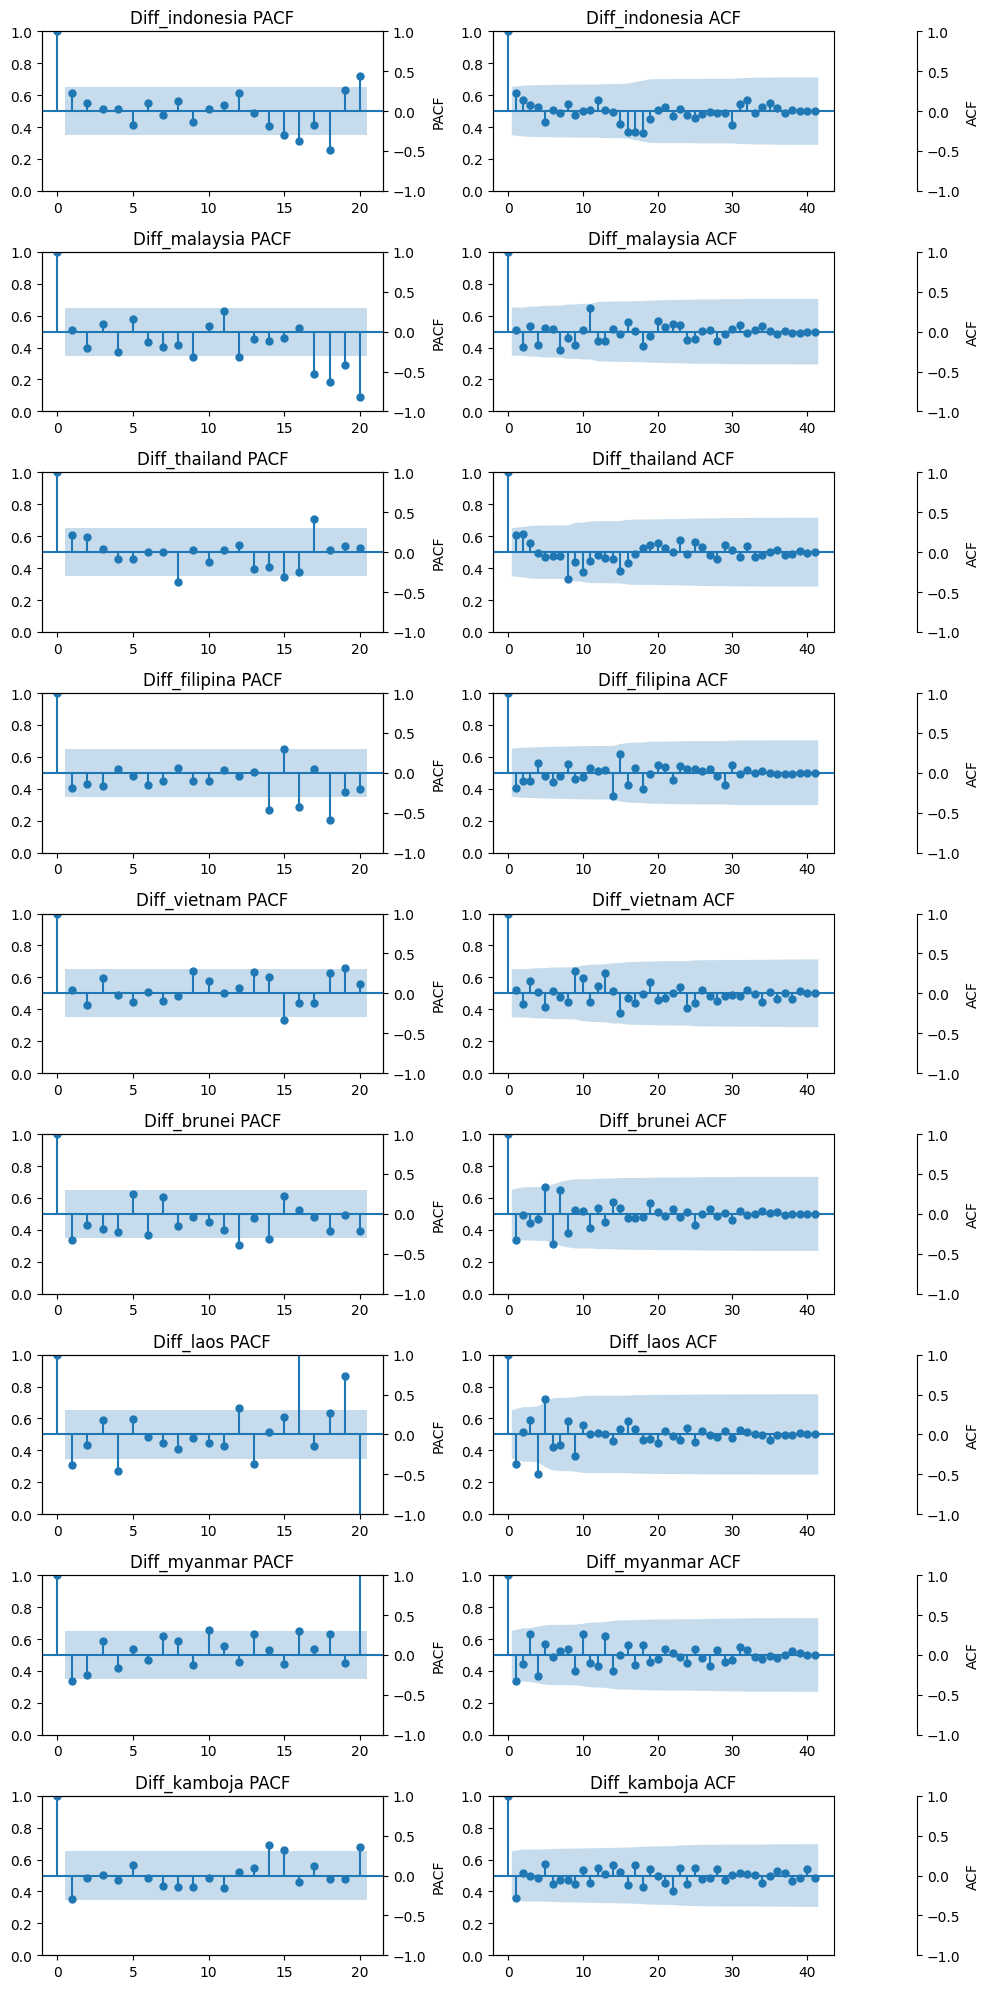

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

all_variable = ['Diff_indonesia', 'Diff_malaysia', 'Diff_thailand', 'Diff_filipina', 'Diff_vietnam', 'Diff_brunei', 'Diff_laos', 'Diff_myanmar', 'Diff_kamboja']
plot_variables = train_data.groupby(train_data.index)[all_variable].mean()

fig, axes = plt.subplots(
    nrows=len(all_variable),
    ncols=2,
    figsize=(10, 20),
    facecolor="w",
    edgecolor="k"
)

for i, variable in enumerate(all_variable):
    # Plot PACF
    ax_pacf = axes[i, 0].twinx()
    plot_pacf(plot_variables[variable], ax=ax_pacf, lags=range(0, int(0.5*len(train_data))), title=f'{variable} PACF', method='ols')
    ax_pacf.set_ylabel('PACF')

    # Plot ACF
    ax_acf = axes[i, 1].twinx()
    ax_acf.spines['right'].set_position(('outward', 60))
    plot_acf(plot_variables[variable], ax=ax_acf, lags=range(0, len(train_data)), title=f'{variable} ACF')
    ax_acf.set_ylabel('ACF')

plt.tight_layout()
plt.show()


Berdasarkan plot pacf dan acf diatas, diperoleh jumlah lag signifikan yang paling banyak keluar dari area adalah sebanyak 7 yaitu pada diff_laos, sehingga range yang akan digunakan untuk melakukan grid search adalah (0,8), dimana nilai akan di iterasi mulai dari 0 sampai 7. Maka inputan nilai 7 akan dimasukkan ke dalam iterasi. Adapun pemilihan set hyperparamter p dan q adalah berdasarkan signifikasi lag yang terdapat pada plot pacf dan acf ini.

# Eksperimen Indonesia

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_ID_y,
                     exog= train_ID_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-240.231, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-247.455, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-252.912, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-242.227, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-252.265, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-250.195, Time=0.70 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-255.975, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-253.618, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-254.641, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-249.428, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-252.191, Time=1.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.681 seconds


In [ ]:
# Mencetak hasil iterasi AIC dan BIC
print(step_wise.aic())
print(step_wise.bic())

-255.97503618201614
-252.54789204860754


In [ ]:
best_order_id = step_wise.order
print("Best Order:", best_order_id)

Best Order: (0, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_ID_y, exog=train_ID_X,
                     order=best_order_id)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:         Diff_indonesia   No. Observations:                   42
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 137.483
Date:                Wed, 26 Jul 2023   AIC                           -254.967
Time:                        06:29:57   BIC                           -237.831
Sample:                    01-01-1962   HQIC                          -248.727
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Diff_filipina     0.0751      0.118      0.633      0.526      -0.157       0.307
Diff_malaysia     0.2402      0.141      1.704      0.088      -0.036       0.517
Diff_brunei       0.0147      0.035     

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result.aic, 2)
bic = round(result.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -254.97
BIC: -237.83


In [ ]:
# Melakukan prediksi test set dengan model ARIMAX
exog_test = test_ID_X
prediction_test_id = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_id

2004-01-01   -0.000266
2005-01-01    0.014768
2006-01-01    0.002436
2007-01-01    0.008851
2008-01-01    0.003954
2009-01-01    0.003921
2010-01-01   -0.001070
2011-01-01   -0.001350
2012-01-01    0.003580
2013-01-01    0.005513
2014-01-01   -0.016502
2015-01-01    0.026879
2016-01-01    0.000410
2017-01-01   -0.004406
2018-01-01   -0.000230
2019-01-01   -0.009044
2020-01-01    0.004109
2021-01-01    0.005683
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_ID_y

Year
2004-01-01   -0.00061
2005-01-01    0.00374
2006-01-01    0.00462
2007-01-01    0.00267
2008-01-01    0.02697
2009-01-01    0.00940
2010-01-01    0.00148
2011-01-01   -0.00258
2012-01-01    0.01515
2013-01-01    0.00158
2014-01-01   -0.00191
2015-01-01    0.02111
2016-01-01   -0.02615
2017-01-01   -0.00283
2018-01-01    0.01341
2019-01-01   -0.00894
2020-01-01    0.00142
2021-01-01    0.00984
Name: Diff_indonesia, dtype: float64

MAE:0.007589


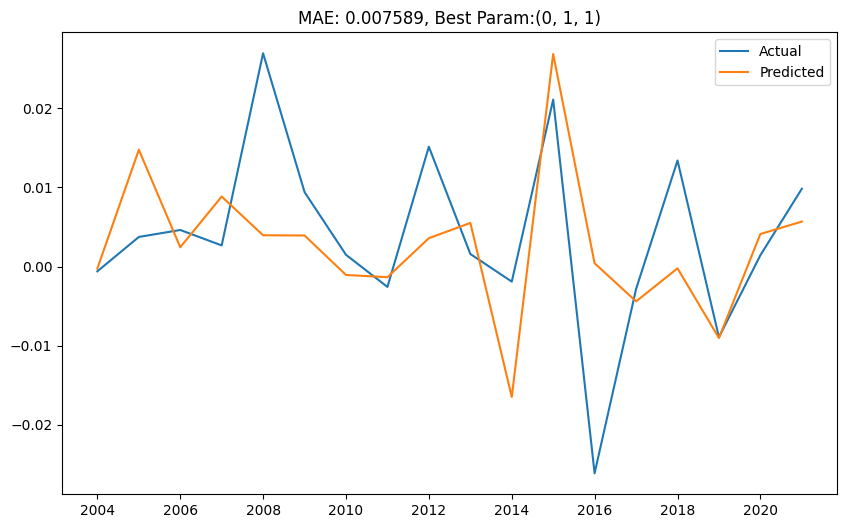

In [ ]:
# Metric
mae = mean_absolute_error(test_ID_y, prediction_test_id)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_ID_y.index, test_ID_y.values, label='Actual')
plt.plot(test_ID_y.index, prediction_test_id, label='Predicted')
plt.legend()
plt.title(label=f"MAE: {mae:.6f}, Best Param:{best_order_id}")
plt.show()

In [ ]:
prediction_train_id = result.predict(exog=train_ID_X, start=0, end=len(train_data)-1)

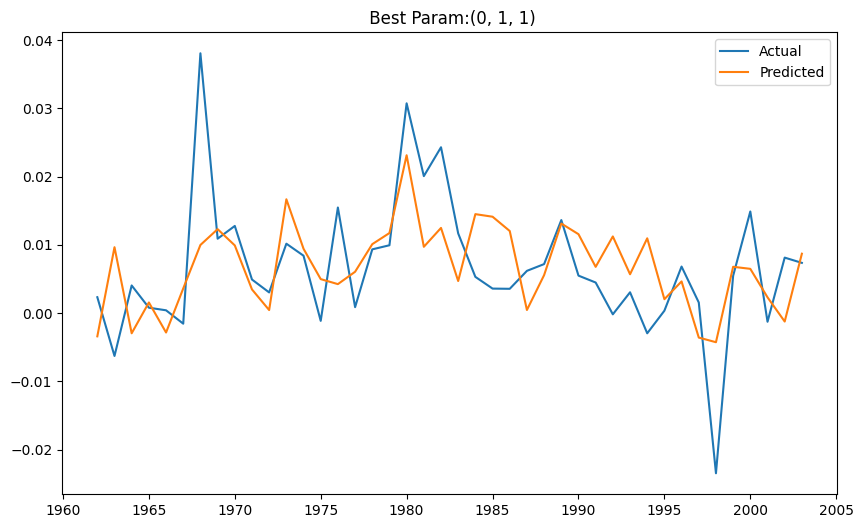

In [ ]:
# Plot
plt.plot(train_ID_y.index, train_ID_y.values, label='Actual')
plt.plot(train_ID_y.index, prediction_train_id, label='Predicted')
plt.legend()
plt.title(label=f" Best Param:{best_order_id}")
plt.show()

In [ ]:
prediction_all_id = result.predict(exog=test_ID_X,start=0, end=len(df_merged)-1)

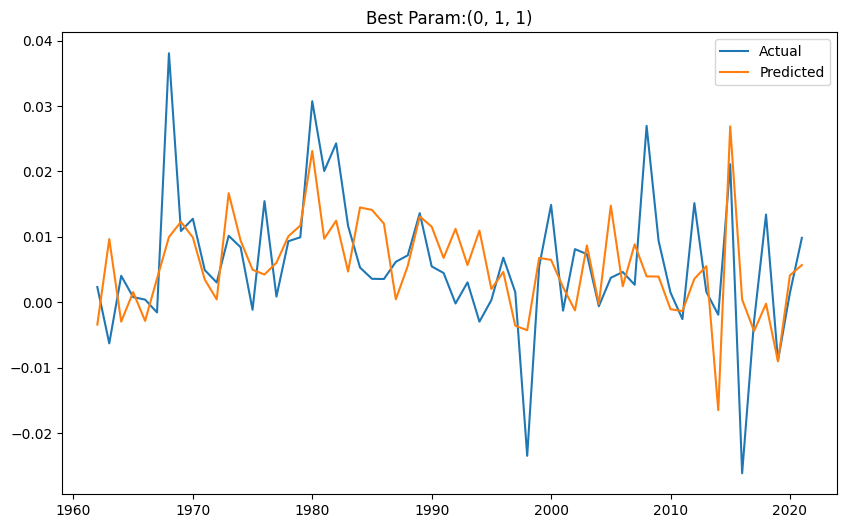

In [ ]:
# Metric
rmse = np.sqrt(mean_squared_error(df_merged['Diff_indonesia'], prediction_all_id))

# Plot
plt.plot(df_merged['Diff_indonesia'].index, df_merged['Diff_indonesia'].values, label='Actual')
plt.plot(df_merged['Diff_indonesia'].index, prediction_all_id, label='Predicted')
plt.legend()
plt.title(label=f"Best Param:{best_order_id}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['ID Rice Yields'].iloc[0]
final_test_predictions_id = prediction_test_id.cumsum() + base_value

In [ ]:
def inverse_decimal_scaling(data, scale_factor):
    return data * scale_factor

# Faktor skala yang digunakan saat melakukan decimal scaling
scale_factor = 100000

In [ ]:
final_test_predictions_id = final_test_predictions_id.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_id)

2004-01-01    45338.403281
2005-01-01    46815.240681
2006-01-01    47058.808967
2007-01-01    47943.940571
2008-01-01    48339.292092
2009-01-01    48731.422869
2010-01-01    48624.414854
2011-01-01    48489.420438
2012-01-01    48847.429851
2013-01-01    49398.753944
2014-01-01    47748.531275
2015-01-01    50436.480757
2016-01-01    50477.512481
2017-01-01    50036.870162
2018-01-01    50013.893119
2019-01-01    49109.467547
2020-01-01    49520.385352
2021-01-01    50088.718064
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['ID Rice Yields'] = test_data['ID Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['ID Rice Yields'])

Year
2004-01-01    45365.0
2005-01-01    45739.0
2006-01-01    46201.0
2007-01-01    46468.0
2008-01-01    49165.0
2009-01-01    50105.0
2010-01-01    50253.0
2011-01-01    49995.0
2012-01-01    51510.0
2013-01-01    51668.0
2014-01-01    51477.0
2015-01-01    53588.0
2016-01-01    50973.0
2017-01-01    50690.0
2018-01-01    52031.0
2019-01-01    51137.0
2020-01-01    51279.0
2021-01-01    52263.0
Name: ID Rice Yields, dtype: float64


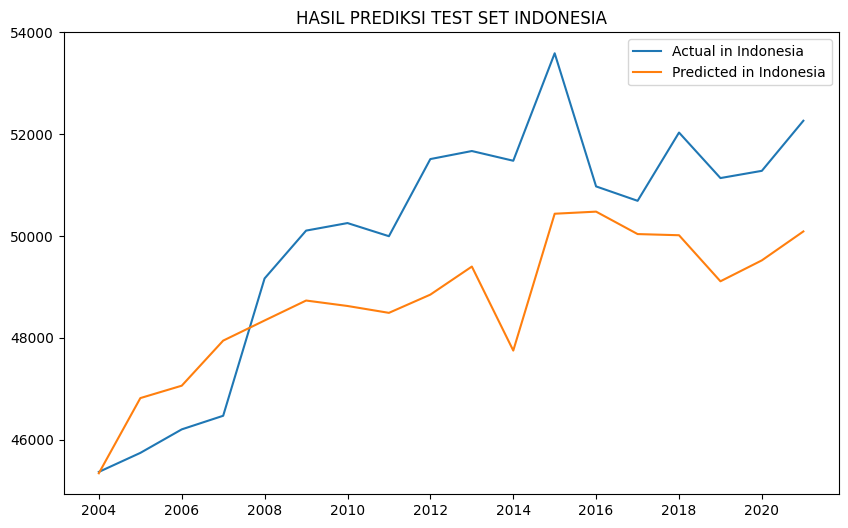

In [ ]:
# Plot
plt.plot(test_data['ID Rice Yields'].index, test_data['ID Rice Yields'].values, label='Actual in Indonesia')
plt.plot(test_data['ID Rice Yields'].index, final_test_predictions_id, label='Predicted in Indonesia')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET INDONESIA')
plt.show()

In [ ]:
base_value2 = train_data['ID Rice Yields'].iloc[0]
final_train_predictions_id = prediction_train_id.cumsum() + base_value2

In [ ]:
final_train_predictions_id = final_train_predictions_id.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_id)

1962-01-01    17513.390318
1963-01-01    18477.993741
1964-01-01    18181.141551
1965-01-01    18335.816840
1966-01-01    18050.416127
1967-01-01    18410.530819
1968-01-01    19407.577508
1969-01-01    20636.572681
1970-01-01    21627.262443
1971-01-01    21973.211113
1972-01-01    22016.768137
1973-01-01    23683.615520
1974-01-01    24625.072153
1975-01-01    25122.156585
1976-01-01    25545.625589
1977-01-01    26150.358547
1978-01-01    27159.386596
1979-01-01    28331.504297
1980-01-01    30643.634807
1981-01-01    31614.121985
1982-01-01    32861.162257
1983-01-01    33330.168450
1984-01-01    34779.119201
1985-01-01    36190.267278
1986-01-01    37391.931001
1987-01-01    37436.495960
1988-01-01    37991.863483
1989-01-01    39303.193771
1990-01-01    40458.338592
1991-01-01    41135.014619
1992-01-01    42257.186673
1993-01-01    42825.259270
1994-01-01    43920.053148
1995-01-01    44122.566148
1996-01-01    44585.708534
1997-01-01    44226.085784
1998-01-01    43798.468697
1

In [ ]:
train_data['ID Rice Yields'] = train_data['ID Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['ID Rice Yields'])

Year
1962-01-01    17855.0
1963-01-01    17226.0
1964-01-01    17630.0
1965-01-01    17708.0
1966-01-01    17748.0
1967-01-01    17592.0
1968-01-01    21398.0
1969-01-01    22487.0
1970-01-01    23763.0
1971-01-01    24254.0
1972-01-01    24556.0
1973-01-01    25572.0
1974-01-01    26412.0
1975-01-01    26297.0
1976-01-01    27843.0
1977-01-01    27929.0
1978-01-01    28862.0
1979-01-01    29855.0
1980-01-01    32928.0
1981-01-01    34934.0
1982-01-01    37363.0
1983-01-01    38530.0
1984-01-01    39060.0
1985-01-01    39418.0
1986-01-01    39773.0
1987-01-01    40391.0
1988-01-01    41108.0
1989-01-01    42470.0
1990-01-01    43018.0
1991-01-01    43465.0
1992-01-01    43446.0
1993-01-01    43750.0
1994-01-01    43453.0
1995-01-01    43487.0
1996-01-01    44168.0
1997-01-01    44322.0
1998-01-01    41974.0
1999-01-01    42519.0
2000-01-01    44007.0
2001-01-01    43879.0
2002-01-01    44691.0
2003-01-01    45426.0
Name: ID Rice Yields, dtype: float64


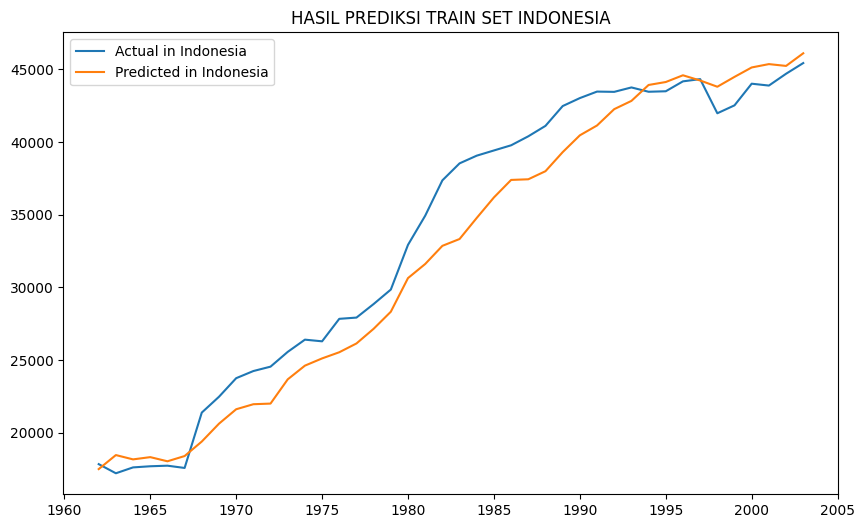

In [ ]:
# Plot
plt.plot(train_data['ID Rice Yields'].index, train_data['ID Rice Yields'].values, label='Actual in Indonesia')
plt.plot(train_data['ID Rice Yields'].index, final_train_predictions_id, label='Predicted in Indonesia')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET INDONESIA')
plt.show()

In [ ]:
base_value3 = df_merged['ID Rice Yields'].iloc[0]
final_predictions_id = prediction_all_id.cumsum() + base_value3

In [ ]:
final_predictions_id = final_predictions_id.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_id)

1962-01-01    17513.390318
1963-01-01    18477.993741
1964-01-01    18181.141551
1965-01-01    18335.816840
1966-01-01    18050.416127
1967-01-01    18410.530819
1968-01-01    19407.577508
1969-01-01    20636.572681
1970-01-01    21627.262443
1971-01-01    21973.211113
1972-01-01    22016.768137
1973-01-01    23683.615520
1974-01-01    24625.072153
1975-01-01    25122.156585
1976-01-01    25545.625589
1977-01-01    26150.358547
1978-01-01    27159.386596
1979-01-01    28331.504297
1980-01-01    30643.634807
1981-01-01    31614.121985
1982-01-01    32861.162257
1983-01-01    33330.168450
1984-01-01    34779.119201
1985-01-01    36190.267278
1986-01-01    37391.931001
1987-01-01    37436.495960
1988-01-01    37991.863483
1989-01-01    39303.193771
1990-01-01    40458.338592
1991-01-01    41135.014619
1992-01-01    42257.186673
1993-01-01    42825.259270
1994-01-01    43920.053148
1995-01-01    44122.566148
1996-01-01    44585.708534
1997-01-01    44226.085784
1998-01-01    43798.468697
1

In [ ]:
df_merged['ID Rice Yields'] = df_merged['ID Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['ID Rice Yields'])

Year
1962-01-01    17855.0
1963-01-01    17226.0
1964-01-01    17630.0
1965-01-01    17708.0
1966-01-01    17748.0
1967-01-01    17592.0
1968-01-01    21398.0
1969-01-01    22487.0
1970-01-01    23763.0
1971-01-01    24254.0
1972-01-01    24556.0
1973-01-01    25572.0
1974-01-01    26412.0
1975-01-01    26297.0
1976-01-01    27843.0
1977-01-01    27929.0
1978-01-01    28862.0
1979-01-01    29855.0
1980-01-01    32928.0
1981-01-01    34934.0
1982-01-01    37363.0
1983-01-01    38530.0
1984-01-01    39060.0
1985-01-01    39418.0
1986-01-01    39773.0
1987-01-01    40391.0
1988-01-01    41108.0
1989-01-01    42470.0
1990-01-01    43018.0
1991-01-01    43465.0
1992-01-01    43446.0
1993-01-01    43750.0
1994-01-01    43453.0
1995-01-01    43487.0
1996-01-01    44168.0
1997-01-01    44322.0
1998-01-01    41974.0
1999-01-01    42519.0
2000-01-01    44007.0
2001-01-01    43879.0
2002-01-01    44691.0
2003-01-01    45426.0
2004-01-01    45365.0
2005-01-01    45739.0
2006-01-01    46201.0
2007-

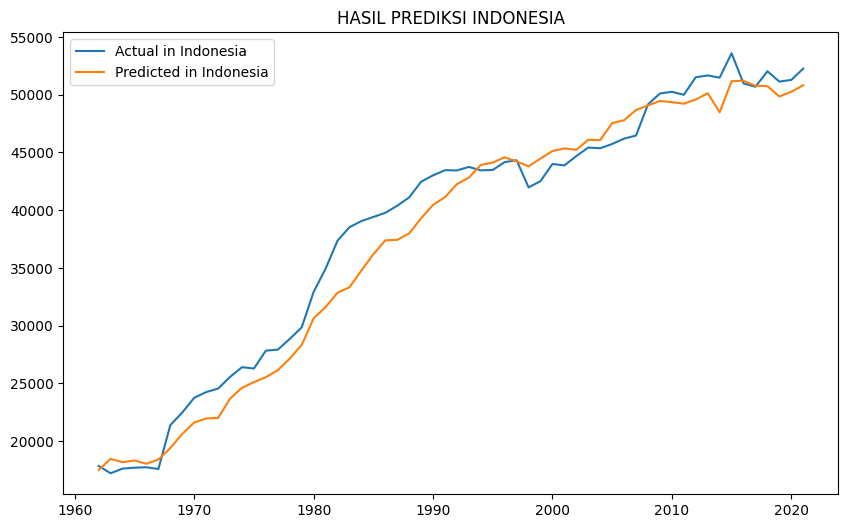

In [ ]:
# Plot
plt.plot(df_merged['ID Rice Yields'].index, df_merged['ID Rice Yields'].values, label='Actual in Indonesia')
plt.plot(df_merged['ID Rice Yields'].index, final_predictions_id, label='Predicted in Indonesia')
plt.legend()
plt.title('HASIL PREDIKSI INDONESIA')
plt.show()

# Eksperimen Malaysia

In [ ]:
print(len(train_MY_X))
print(len(train_MY_y))

print(len(test_MY_X))
print(len(test_MY_y))

42
42
18
18


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_MY_y,
                     exog= train_MY_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-213.646, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-218.340, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-215.624, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-226.984, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-225.136, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-230.343, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-229.503, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-231.680, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-229.800, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-232.472, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-233.894, T

In [ ]:
best_order_my = step_wise.order
print("Best Order:", best_order_my)

Best Order: (0, 1, 3)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_MY_y, exog=train_MY_X,
                     order=best_order_my)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_my = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_my.summary())

                               SARIMAX Results                                
Dep. Variable:          Diff_malaysia   No. Observations:                   42
Model:                 ARIMA(0, 1, 3)   Log Likelihood                 126.037
Date:                Wed, 26 Jul 2023   AIC                           -228.075
Time:                        06:30:06   BIC                           -207.512
Sample:                    01-01-1962   HQIC                          -220.587
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.4716      0.340      1.388      0.165      -0.194       1.137
Diff_filipina      0.2036      0.162      1.255      0.209      -0.114       0.522
Diff_brunei        0.0289      0.058

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_my.aic, 2)
bic = round(result_my.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -228.07
BIC: -207.51


In [ ]:
exog_test = test_MY_X
prediction_test_my = result_my.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_my

2004-01-01    0.009346
2005-01-01   -0.001268
2006-01-01    0.003274
2007-01-01    0.003041
2008-01-01    0.014092
2009-01-01   -0.000628
2010-01-01    0.001596
2011-01-01    0.011038
2012-01-01    0.011978
2013-01-01   -0.000654
2014-01-01    0.006066
2015-01-01    0.009014
2016-01-01   -0.017803
2017-01-01    0.002398
2018-01-01    0.011866
2019-01-01   -0.000400
2020-01-01    0.004678
2021-01-01    0.009024
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_MY_y

Year
2004-01-01   -0.00336
2005-01-01    0.00961
2006-01-01   -0.00314
2007-01-01    0.01370
2008-01-01    0.00559
2009-01-01    0.01369
2010-01-01   -0.00844
2011-01-01    0.01107
2012-01-01    0.00504
2013-01-01    0.00791
2014-01-01   -0.08908
2015-01-01    0.10368
2016-01-01   -0.00448
2017-01-01   -0.02279
2018-01-01    0.00208
2019-01-01   -0.02695
2020-01-01    0.01529
2021-01-01    0.00914
Name: Diff_malaysia, dtype: float64

MAE:0.020246


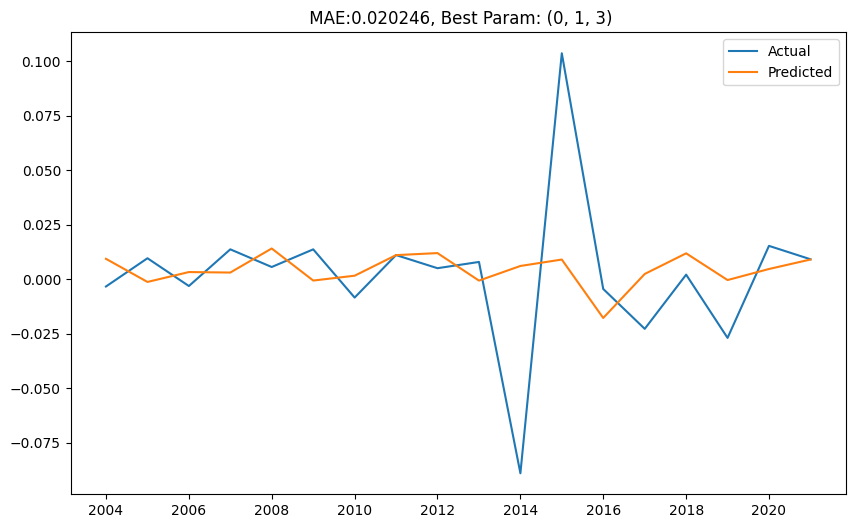

In [ ]:
# Metric
mae = mean_absolute_error(test_MY_y, prediction_test_my)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_MY_y.index, test_MY_y.values, label='Actual')
plt.plot(test_MY_y.index, prediction_test_my, label='Predicted')
plt.legend()
plt.title(label=f" MAE:{mae:.6f}, Best Param: {best_order_my}")
plt.show()

In [ ]:
prediction_train_my = result_my.predict(exog=train_MY_X, start=0, end=len(train_data)-1)

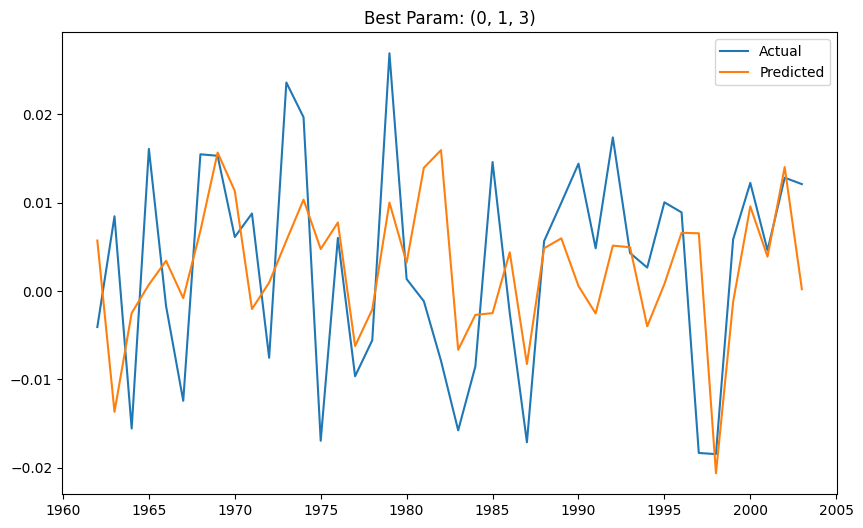

In [ ]:
# Plot
plt.plot(train_MY_y.index, train_MY_y.values, label='Actual')
plt.plot(train_MY_y.index, prediction_train_my, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_my}")
plt.show()

In [ ]:
prediction_all_my = result_my.predict(exog=test_MY_X,start=0, end=len(df_merged)-1)

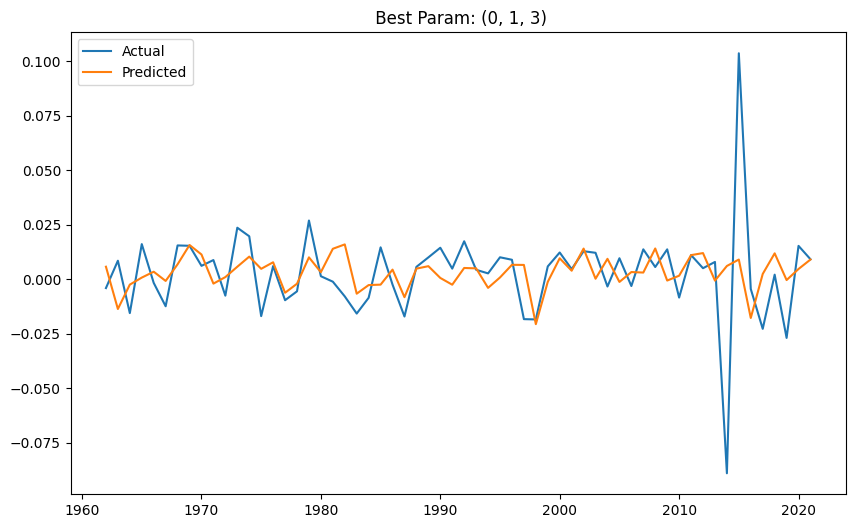

In [ ]:
# Plot
plt.plot(df_merged['Diff_malaysia'].index, df_merged['Diff_malaysia'].values, label='Actual')
plt.plot(df_merged['Diff_malaysia'].index, prediction_all_my, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_my}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['MY Rice Yields'].iloc[0]
final_test_predictions_my = prediction_test_my.cumsum() + base_value

In [ ]:
final_test_predictions_my = final_test_predictions_my.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_my)

2004-01-01    34194.584305
2005-01-01    34067.818642
2006-01-01    34395.258337
2007-01-01    34699.357676
2008-01-01    36108.602845
2009-01-01    36045.756923
2010-01-01    36205.307139
2011-01-01    37309.082175
2012-01-01    38506.855599
2013-01-01    38441.441024
2014-01-01    39048.035566
2015-01-01    39949.464468
2016-01-01    38169.178828
2017-01-01    38408.991054
2018-01-01    39595.593259
2019-01-01    39555.572314
2020-01-01    40023.342019
2021-01-01    40925.758025
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['MY Rice Yields'] = test_data['MY Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['MY Rice Yields'])

Year
2004-01-01    33260.0
2005-01-01    34221.0
2006-01-01    33907.0
2007-01-01    35277.0
2008-01-01    35836.0
2009-01-01    37205.0
2010-01-01    36361.0
2011-01-01    37468.0
2012-01-01    37972.0
2013-01-01    38763.0
2014-01-01    29855.0
2015-01-01    40223.0
2016-01-01    39775.0
2017-01-01    37496.0
2018-01-01    37704.0
2019-01-01    35009.0
2020-01-01    36538.0
2021-01-01    37452.0
Name: MY Rice Yields, dtype: float64


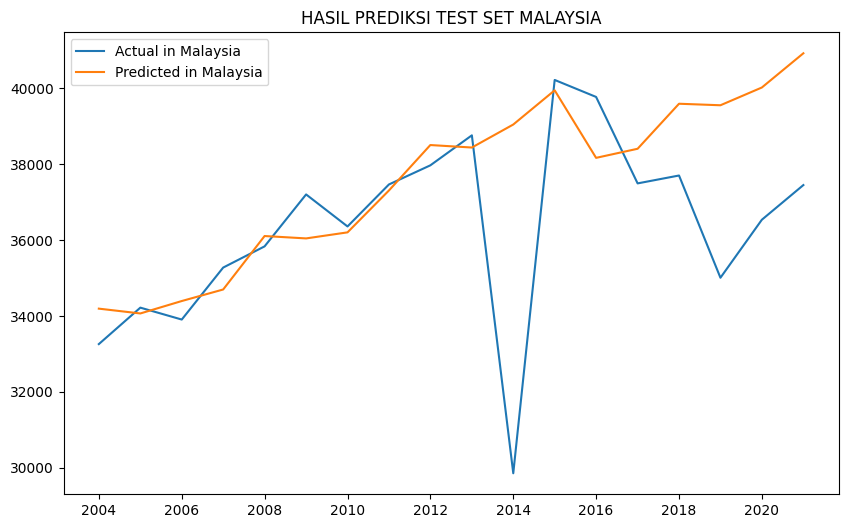

In [ ]:
# Plot
plt.plot(test_data['MY Rice Yields'].index, test_data['MY Rice Yields'].values, label='Actual in Malaysia')
plt.plot(test_data['MY Rice Yields'].index, final_test_predictions_my, label='Predicted in Malaysia')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET MALAYSIA')
plt.show()

In [ ]:
base_value2 = train_data['MY Rice Yields'].iloc[0]
final_train_predictions_my = prediction_train_my.cumsum() + base_value2

In [ ]:
final_train_predictions_my = final_train_predictions_my.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_my)

1962-01-01    21250.108401
1963-01-01    19882.067262
1964-01-01    19632.523669
1965-01-01    19705.697756
1966-01-01    20047.865081
1967-01-01    19967.535361
1968-01-01    20650.439927
1969-01-01    22219.012826
1970-01-01    23352.388095
1971-01-01    23148.789507
1972-01-01    23244.634433
1973-01-01    23815.943415
1974-01-01    24851.162862
1975-01-01    25327.039037
1976-01-01    26103.196575
1977-01-01    25480.584845
1978-01-01    25272.114595
1979-01-01    26274.178581
1980-01-01    26596.375553
1981-01-01    27991.645071
1982-01-01    29587.657296
1983-01-01    28922.129301
1984-01-01    28651.941296
1985-01-01    28401.936876
1986-01-01    28841.091557
1987-01-01    28014.636606
1988-01-01    28498.928465
1989-01-01    29095.825274
1990-01-01    29152.760132
1991-01-01    28899.061013
1992-01-01    29413.453959
1993-01-01    29909.599577
1994-01-01    29510.643542
1995-01-01    29589.607332
1996-01-01    30249.368462
1997-01-01    30903.678631
1998-01-01    28839.664206
1

In [ ]:
train_data['MY Rice Yields'] = train_data['MY Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['MY Rice Yields'])

Year
1962-01-01    20678.0
1963-01-01    21525.0
1964-01-01    19968.0
1965-01-01    21578.0
1966-01-01    21408.0
1967-01-01    20165.0
1968-01-01    21714.0
1969-01-01    23246.0
1970-01-01    23858.0
1971-01-01    24736.0
1972-01-01    23980.0
1973-01-01    26342.0
1974-01-01    28311.0
1975-01-01    26615.0
1976-01-01    27217.0
1977-01-01    26252.0
1978-01-01    25695.0
1979-01-01    28388.0
1980-01-01    28524.0
1981-01-01    28409.0
1982-01-01    27619.0
1983-01-01    26041.0
1984-01-01    25187.0
1985-01-01    26648.0
1986-01-01    26399.0
1987-01-01    24686.0
1988-01-01    25251.0
1989-01-01    26251.0
1990-01-01    27694.0
1991-01-01    28178.0
1992-01-01    29918.0
1993-01-01    30348.0
1994-01-01    30614.0
1995-01-01    31619.0
1996-01-01    32510.0
1997-01-01    30676.0
1998-01-01    28829.0
1999-01-01    29415.0
2000-01-01    30640.0
2001-01-01    31101.0
2002-01-01    32385.0
2003-01-01    33596.0
Name: MY Rice Yields, dtype: float64


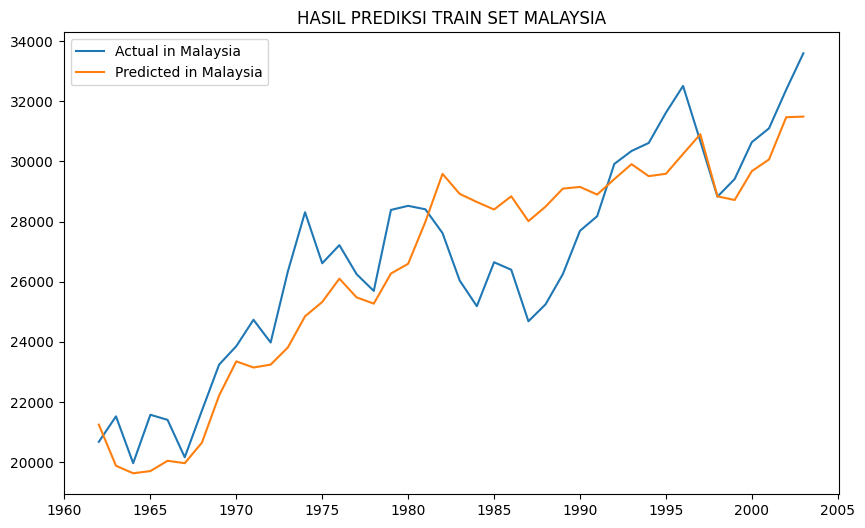

In [ ]:
# Plot
plt.plot(train_data['MY Rice Yields'].index, train_data['MY Rice Yields'].values, label='Actual in Malaysia')
plt.plot(train_data['MY Rice Yields'].index, final_train_predictions_my, label='Predicted in Malaysia')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET MALAYSIA')
plt.show()

In [ ]:
base_value3 = df_merged['MY Rice Yields'].iloc[0]
final_predictions_my = prediction_all_my.cumsum() + base_value3

In [ ]:
final_predictions_my = final_predictions_my.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_my)

1962-01-01    21250.108401
1963-01-01    19882.067262
1964-01-01    19632.523669
1965-01-01    19705.697756
1966-01-01    20047.865081
1967-01-01    19967.535361
1968-01-01    20650.439927
1969-01-01    22219.012826
1970-01-01    23352.388095
1971-01-01    23148.789507
1972-01-01    23244.634433
1973-01-01    23815.943415
1974-01-01    24851.162862
1975-01-01    25327.039037
1976-01-01    26103.196575
1977-01-01    25480.584845
1978-01-01    25272.114595
1979-01-01    26274.178581
1980-01-01    26596.375553
1981-01-01    27991.645071
1982-01-01    29587.657296
1983-01-01    28922.129301
1984-01-01    28651.941296
1985-01-01    28401.936876
1986-01-01    28841.091557
1987-01-01    28014.636606
1988-01-01    28498.928465
1989-01-01    29095.825274
1990-01-01    29152.760132
1991-01-01    28899.061013
1992-01-01    29413.453959
1993-01-01    29909.599577
1994-01-01    29510.643542
1995-01-01    29589.607332
1996-01-01    30249.368462
1997-01-01    30903.678631
1998-01-01    28839.664206
1

In [ ]:
df_merged['MY Rice Yields'] = df_merged['MY Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['MY Rice Yields'])

Year
1962-01-01    20678.0
1963-01-01    21525.0
1964-01-01    19968.0
1965-01-01    21578.0
1966-01-01    21408.0
1967-01-01    20165.0
1968-01-01    21714.0
1969-01-01    23246.0
1970-01-01    23858.0
1971-01-01    24736.0
1972-01-01    23980.0
1973-01-01    26342.0
1974-01-01    28311.0
1975-01-01    26615.0
1976-01-01    27217.0
1977-01-01    26252.0
1978-01-01    25695.0
1979-01-01    28388.0
1980-01-01    28524.0
1981-01-01    28409.0
1982-01-01    27619.0
1983-01-01    26041.0
1984-01-01    25187.0
1985-01-01    26648.0
1986-01-01    26399.0
1987-01-01    24686.0
1988-01-01    25251.0
1989-01-01    26251.0
1990-01-01    27694.0
1991-01-01    28178.0
1992-01-01    29918.0
1993-01-01    30348.0
1994-01-01    30614.0
1995-01-01    31619.0
1996-01-01    32510.0
1997-01-01    30676.0
1998-01-01    28829.0
1999-01-01    29415.0
2000-01-01    30640.0
2001-01-01    31101.0
2002-01-01    32385.0
2003-01-01    33596.0
2004-01-01    33260.0
2005-01-01    34221.0
2006-01-01    33907.0
2007-

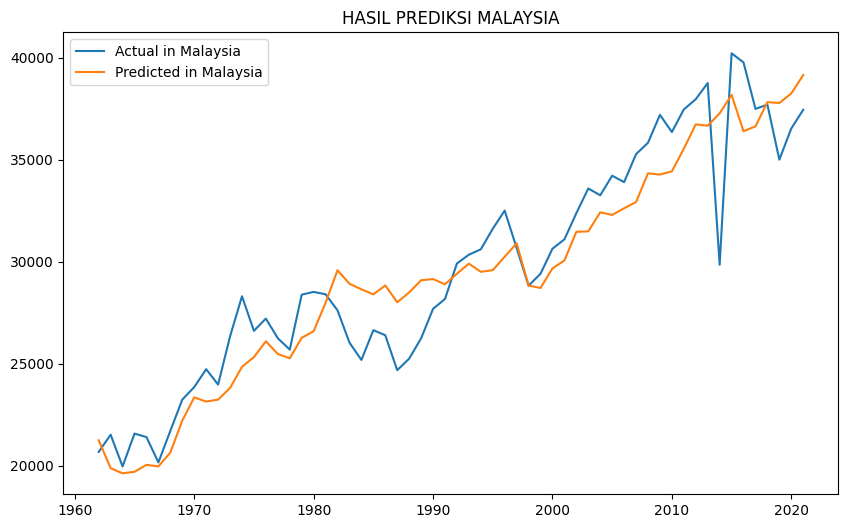

In [ ]:
# Plot
plt.plot(df_merged['MY Rice Yields'].index, df_merged['MY Rice Yields'].values, label='Actual in Malaysia')
plt.plot(df_merged['MY Rice Yields'].index, final_predictions_my, label='Predicted in Malaysia')
plt.legend()
plt.title('HASIL PREDIKSI MALAYSIA')
plt.show()

# Eksperimen Thailand

In [ ]:
print(len(train_TH_X))
print(len(train_TH_y))

print(len(test_TH_X))
print(len(test_TH_y))

42
42
18
18


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_TH_y,
                     exog= train_TH_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-227.320, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-237.126, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-240.926, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-229.312, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-238.966, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-236.969, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-242.859, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-240.486, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-240.884, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-239.107, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-238.920, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.204 seconds


In [ ]:
best_order_th = step_wise.order
print("Best Order:", best_order_th)

Best Order: (0, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_TH_y, exog=train_TH_X,
                     order=best_order_th)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_th = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_th.summary())

                               SARIMAX Results                                
Dep. Variable:          Diff_thailand   No. Observations:                   42
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 128.568
Date:                Wed, 26 Jul 2023   AIC                           -237.136
Time:                        06:30:13   BIC                           -220.001
Sample:                    01-01-1962   HQIC                          -230.896
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.3231      0.243      1.331      0.183      -0.153       0.799
Diff_malaysia     -0.1244      0.159     -0.784      0.433      -0.435       0.186
Diff_brunei       -0.0246      0.045

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_th.aic, 2)
bic = round(result_th.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -237.14
BIC: -220.0


In [ ]:
exog_test = test_TH_X
prediction_test_th = result_th.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_th

2004-01-01    0.008081
2005-01-01    0.006884
2006-01-01    0.007877
2007-01-01    0.005891
2008-01-01    0.013894
2009-01-01    0.002705
2010-01-01    0.005917
2011-01-01    0.001640
2012-01-01    0.012262
2013-01-01    0.003974
2014-01-01    0.018022
2015-01-01   -0.004438
2016-01-01   -0.005644
2017-01-01    0.006448
2018-01-01    0.008380
2019-01-01    0.006090
2020-01-01    0.000891
2021-01-01    0.008430
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_TH_y

Year
2004-01-01    0.00902
2005-01-01    0.01114
2006-01-01    0.00795
2007-01-01    0.00945
2008-01-01    0.01049
2009-01-01    0.00229
2010-01-01    0.00109
2011-01-01   -0.02293
2012-01-01   -0.00221
2013-01-01    0.00418
2014-01-01    0.00534
2015-01-01    0.00254
2016-01-01   -0.00537
2017-01-01    0.00037
2018-01-01    0.00350
2019-01-01   -0.00611
2020-01-01    0.00086
2021-01-01    0.00065
Name: Diff_thailand, dtype: float64

MAE:0.005979


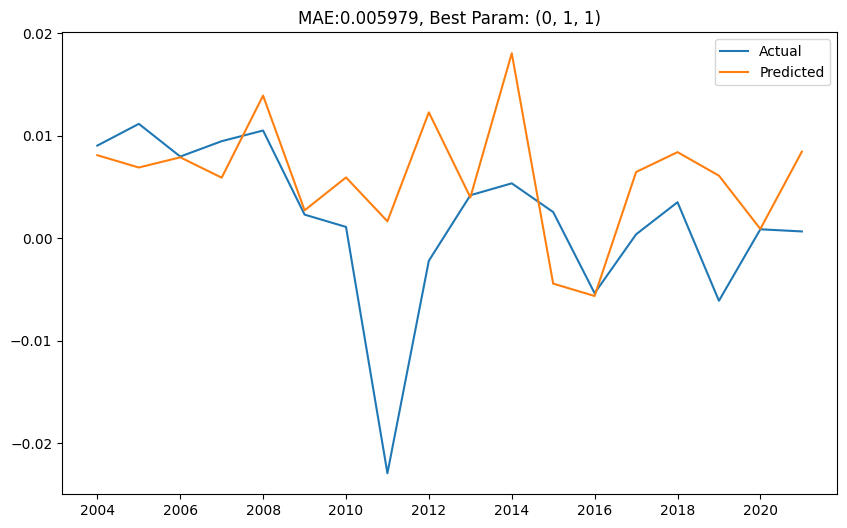

In [ ]:
# Metric
mae = mean_absolute_error(test_TH_y, prediction_test_th)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_TH_y.index, test_TH_y.values, label='Actual')
plt.plot(test_TH_y.index, prediction_test_th, label='Predicted')
plt.legend()
plt.title(label=f"MAE:{mae:.6f}, Best Param: {best_order_th}")
plt.show()

In [ ]:
prediction_train_th = result_th.predict(exog=train_TH_X, start=0, end=len(train_data)-1)

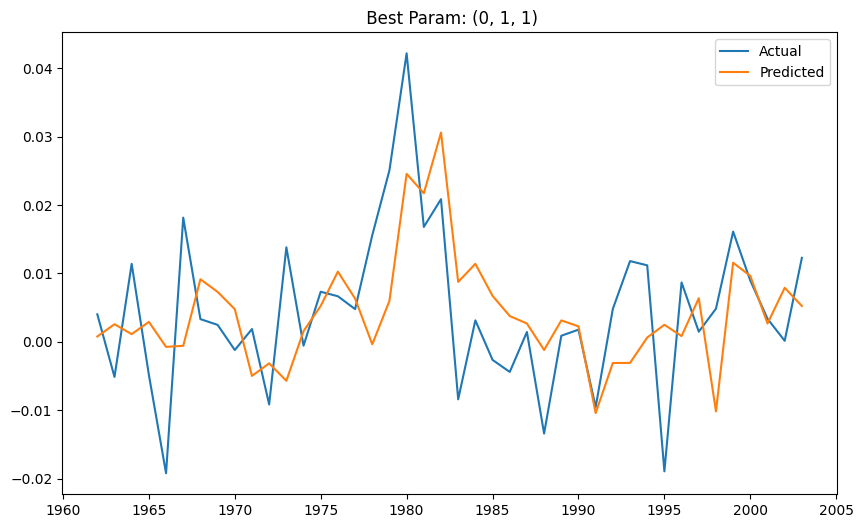

In [ ]:
# Plot
plt.plot(train_TH_y.index, train_TH_y.values, label='Actual')
plt.plot(train_TH_y.index, prediction_train_th, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_th}")
plt.show()

In [ ]:
prediction_all_th = result_th.predict(exog=test_TH_X,start=0, end=len(df_merged)-1)

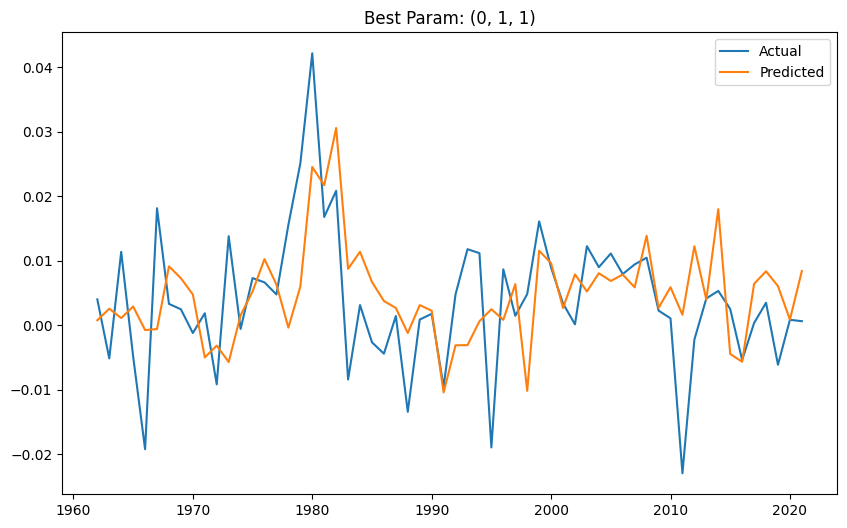

In [ ]:
# Plot
plt.plot(df_merged['Diff_thailand'].index, df_merged['Diff_thailand'].values, label='Actual')
plt.plot(df_merged['Diff_thailand'].index, prediction_all_th, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_th}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['TH Rice Yields'].iloc[0]
final_test_predictions_th = prediction_test_th.cumsum() + base_value

In [ ]:
final_test_predictions_th = final_test_predictions_th.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_th)

2004-01-01    29703.142484
2005-01-01    30391.541132
2006-01-01    31179.241205
2007-01-01    31768.358043
2008-01-01    33157.806522
2009-01-01    33428.352388
2010-01-01    34020.041937
2011-01-01    34184.057591
2012-01-01    35410.230283
2013-01-01    35807.655436
2014-01-01    37609.814499
2015-01-01    37165.969238
2016-01-01    36601.589676
2017-01-01    37246.379112
2018-01-01    38084.404198
2019-01-01    38693.423503
2020-01-01    38782.563206
2021-01-01    39625.544209
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['TH Rice Yields'] = test_data['TH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['TH Rice Yields'])

Year
2004-01-01    28895.0
2005-01-01    29974.0
2006-01-01    29503.0
2007-01-01    30441.0
2008-01-01    29974.0
2009-01-01    29079.0
2010-01-01    29921.0
2011-01-01    31867.0
2012-01-01    31865.0
2013-01-01    31463.0
2014-01-01    30586.0
2015-01-01    28506.0
2016-01-01    29678.0
2017-01-01    30690.0
2018-01-01    30380.0
2019-01-01    29164.0
2020-01-01    29064.0
2021-01-01    29867.0
Name: TH Rice Yields, dtype: float64


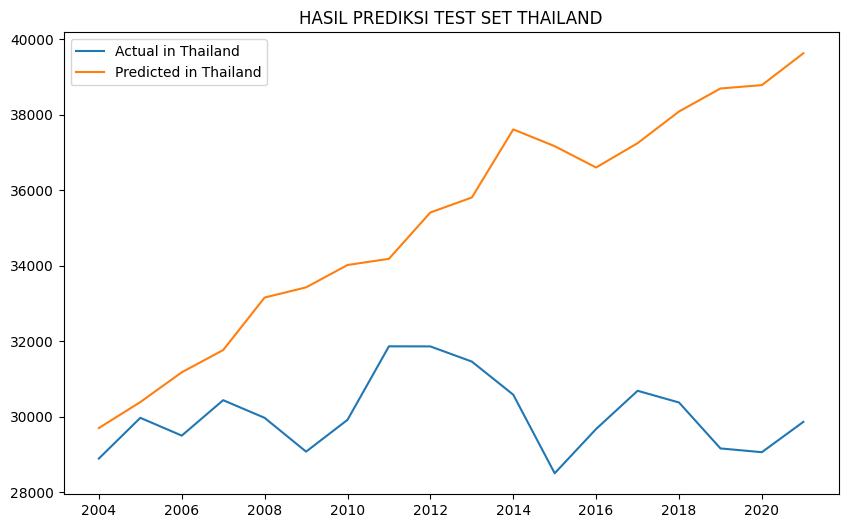

In [ ]:
# Plot
plt.plot(test_data['TH Rice Yields'].index, test_data['TH Rice Yields'].values, label='Actual in Thailand')
plt.plot(test_data['TH Rice Yields'].index, final_test_predictions_th, label='Predicted in Thailand')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET THAILAND')
plt.show()

In [ ]:
base_value2 = train_data['TH Rice Yields'].iloc[0]
final_train_predictions_th = prediction_train_th.cumsum() + base_value2

In [ ]:
final_train_predictions_th = final_train_predictions_th.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_th)

1962-01-01    17281.112368
1963-01-01    17539.319223
1964-01-01    17652.578664
1965-01-01    17945.018057
1966-01-01    17872.266854
1967-01-01    17814.949590
1968-01-01    18730.212738
1969-01-01    19460.994719
1970-01-01    19939.475331
1971-01-01    19442.364722
1972-01-01    19128.715550
1973-01-01    18560.321552
1974-01-01    18717.513465
1975-01-01    19243.245467
1976-01-01    20270.466420
1977-01-01    20902.857403
1978-01-01    20867.758658
1979-01-01    21467.533580
1980-01-01    23923.504685
1981-01-01    26095.842983
1982-01-01    29155.378261
1983-01-01    30031.778323
1984-01-01    31172.912860
1985-01-01    31845.053761
1986-01-01    32223.284317
1987-01-01    32492.079653
1988-01-01    32373.652782
1989-01-01    32687.842896
1990-01-01    32914.978986
1991-01-01    31874.903439
1992-01-01    31566.671805
1993-01-01    31259.534354
1994-01-01    31323.141208
1995-01-01    31573.680948
1996-01-01    31658.903529
1997-01-01    32297.303160
1998-01-01    31281.721200
1

In [ ]:
train_data['TH Rice Yields'] = train_data['TH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['TH Rice Yields'])

Year
1962-01-01    17202.0
1963-01-01    18725.0
1964-01-01    18384.0
1965-01-01    17805.0
1966-01-01    18360.0
1967-01-01    17497.0
1968-01-01    17882.0
1969-01-01    18474.0
1970-01-01    20207.0
1971-01-01    19369.0
1972-01-01    18308.0
1973-01-01    19242.0
1974-01-01    18254.0
1975-01-01    18308.0
1976-01-01    18450.0
1977-01-01    15910.0
1978-01-01    19552.0
1979-01-01    18209.0
1980-01-01    18878.0
1981-01-01    19521.0
1982-01-01    18880.0
1983-01-01    20351.0
1984-01-01    20670.0
1985-01-01    20608.0
1986-01-01    20522.0
1987-01-01    20147.0
1988-01-01    21465.0
1989-01-01    20853.0
1990-01-01    19556.0
1991-01-01    22534.0
1992-01-01    21745.0
1993-01-01    20497.0
1994-01-01    23521.0
1995-01-01    24158.0
1996-01-01    24098.0
1997-01-01    23788.0
1998-01-01    24180.0
1999-01-01    24244.0
2000-01-01    26128.0
2001-01-01    28739.0
2002-01-01    29338.0
2003-01-01    29339.0
Name: TH Rice Yields, dtype: float64


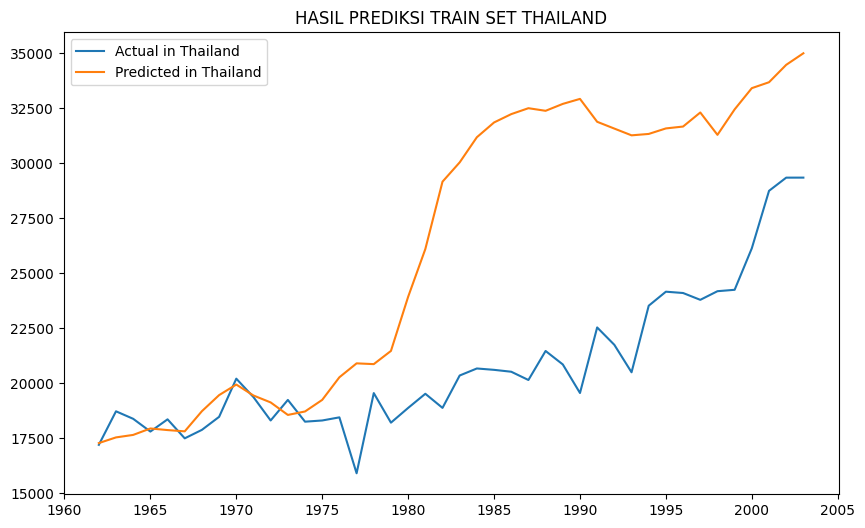

In [ ]:
# Plot
plt.plot(train_data['TH Rice Yields'].index, train_data['TH Rice Yields'].values, label='Actual in Thailand')
plt.plot(train_data['TH Rice Yields'].index, final_train_predictions_th, label='Predicted in Thailand')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET THAILAND')
plt.show()

In [ ]:
base_value3 = df_merged['TH Rice Yields'].iloc[0]
final_predictions_th = prediction_all_th.cumsum() + base_value3

In [ ]:
final_predictions_th = final_predictions_th.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_th)

1962-01-01    17281.112368
1963-01-01    17539.319223
1964-01-01    17652.578664
1965-01-01    17945.018057
1966-01-01    17872.266854
1967-01-01    17814.949590
1968-01-01    18730.212738
1969-01-01    19460.994719
1970-01-01    19939.475331
1971-01-01    19442.364722
1972-01-01    19128.715550
1973-01-01    18560.321552
1974-01-01    18717.513465
1975-01-01    19243.245467
1976-01-01    20270.466420
1977-01-01    20902.857403
1978-01-01    20867.758658
1979-01-01    21467.533580
1980-01-01    23923.504685
1981-01-01    26095.842983
1982-01-01    29155.378261
1983-01-01    30031.778323
1984-01-01    31172.912860
1985-01-01    31845.053761
1986-01-01    32223.284317
1987-01-01    32492.079653
1988-01-01    32373.652782
1989-01-01    32687.842896
1990-01-01    32914.978986
1991-01-01    31874.903439
1992-01-01    31566.671805
1993-01-01    31259.534354
1994-01-01    31323.141208
1995-01-01    31573.680948
1996-01-01    31658.903529
1997-01-01    32297.303160
1998-01-01    31281.721200
1

In [ ]:
df_merged['TH Rice Yields'] = df_merged['TH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['TH Rice Yields'])

Year
1962-01-01    17202.0
1963-01-01    18725.0
1964-01-01    18384.0
1965-01-01    17805.0
1966-01-01    18360.0
1967-01-01    17497.0
1968-01-01    17882.0
1969-01-01    18474.0
1970-01-01    20207.0
1971-01-01    19369.0
1972-01-01    18308.0
1973-01-01    19242.0
1974-01-01    18254.0
1975-01-01    18308.0
1976-01-01    18450.0
1977-01-01    15910.0
1978-01-01    19552.0
1979-01-01    18209.0
1980-01-01    18878.0
1981-01-01    19521.0
1982-01-01    18880.0
1983-01-01    20351.0
1984-01-01    20670.0
1985-01-01    20608.0
1986-01-01    20522.0
1987-01-01    20147.0
1988-01-01    21465.0
1989-01-01    20853.0
1990-01-01    19556.0
1991-01-01    22534.0
1992-01-01    21745.0
1993-01-01    20497.0
1994-01-01    23521.0
1995-01-01    24158.0
1996-01-01    24098.0
1997-01-01    23788.0
1998-01-01    24180.0
1999-01-01    24244.0
2000-01-01    26128.0
2001-01-01    28739.0
2002-01-01    29338.0
2003-01-01    29339.0
2004-01-01    28895.0
2005-01-01    29974.0
2006-01-01    29503.0
2007-

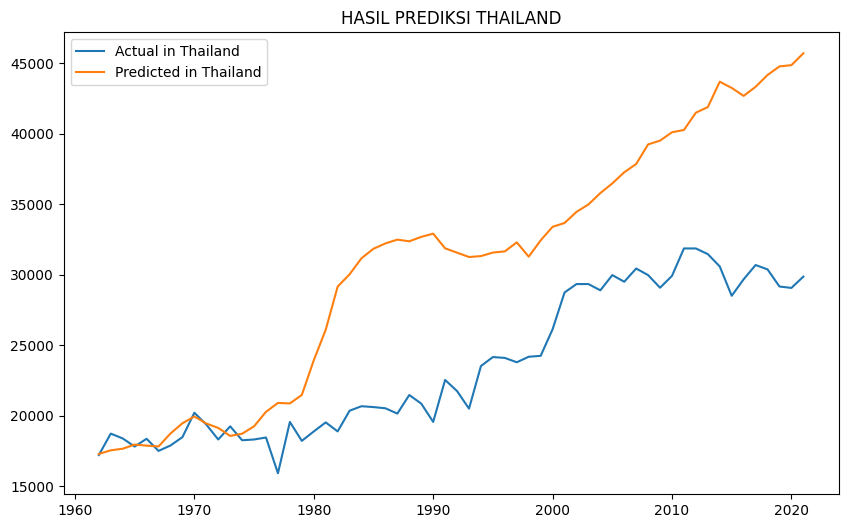

In [ ]:
# Plot
plt.plot(df_merged['TH Rice Yields'].index, df_merged['TH Rice Yields'].values, label='Actual in Thailand')
plt.plot(df_merged['TH Rice Yields'].index, final_predictions_th, label='Predicted in Thailand')
plt.legend()
plt.title('HASIL PREDIKSI THAILAND')
plt.show()

# Eksperimen Filipina

In [ ]:
print(len(train_PH_X))
print(len(train_PH_y))

print(len(test_PH_X))
print(len(test_PH_y))

42
42
18
18


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_PH_y,
                     exog= train_PH_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-196.560, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-208.402, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-224.687, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-198.558, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-222.805, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-224.866, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-222.977, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-223.317, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-221.600, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.105 seconds


In [ ]:
best_order_ph = step_wise.order
print("Best Order:", best_order_ph)

Best Order: (0, 1, 2)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_PH_y, exog=train_PH_X,
                     order=best_order_ph)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_ph = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_ph.summary())

                               SARIMAX Results                                
Dep. Variable:          Diff_filipina   No. Observations:                   42
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 122.136
Date:                Wed, 26 Jul 2023   AIC                           -222.273
Time:                        06:30:17   BIC                           -203.423
Sample:                    01-01-1962   HQIC                          -215.409
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.2063      0.186      1.112      0.266      -0.157       0.570
Diff_malaysia      0.2206      0.193      1.142      0.253      -0.158       0.599
Diff_brunei       -0.0165      0.055

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result.aic, 2)
bic = round(result.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -254.97
BIC: -237.83


In [ ]:
exog_test = test_PH_X
prediction_test_ph = result_ph.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_ph

2004-01-01    0.007310
2005-01-01    0.005425
2006-01-01    0.007089
2007-01-01    0.008002
2008-01-01    0.013512
2009-01-01    0.010454
2010-01-01   -0.002530
2011-01-01   -0.003668
2012-01-01    0.005769
2013-01-01    0.007124
2014-01-01   -0.012395
2015-01-01    0.033615
2016-01-01   -0.006770
2017-01-01   -0.004490
2018-01-01    0.007542
2019-01-01   -0.004263
2020-01-01    0.002585
2021-01-01    0.007611
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_PH_y

Year
2004-01-01    0.01434
2005-01-01    0.00746
2006-01-01    0.00968
2007-01-01    0.01164
2008-01-01   -0.00305
2009-01-01   -0.01813
2010-01-01    0.00334
2011-01-01    0.00552
2012-01-01    0.01672
2013-01-01    0.00404
2014-01-01    0.01167
2015-01-01   -0.01039
2016-01-01   -0.00290
2017-01-01    0.01371
2018-01-01   -0.00343
2019-01-01    0.00731
2020-01-01    0.00439
2021-01-01    0.00652
Name: Diff_filipina, dtype: float64

MAE:0.011395


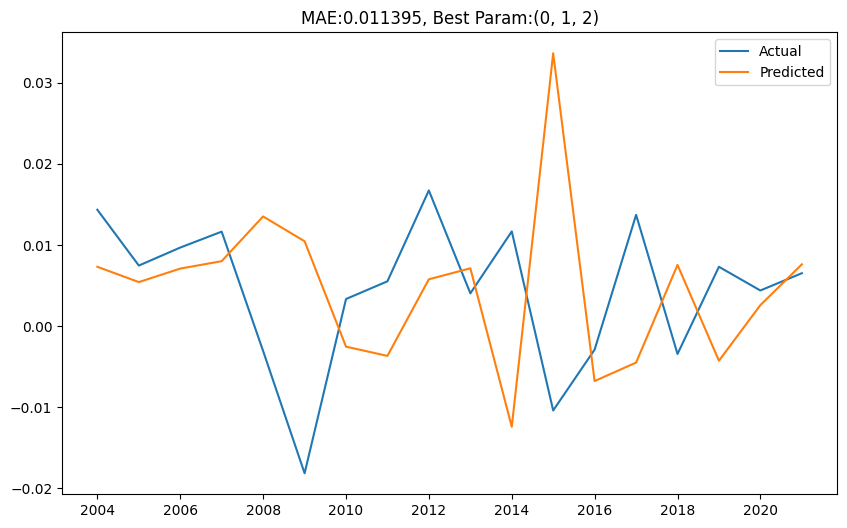

In [ ]:
# Metric
mae = mean_absolute_error(test_PH_y, prediction_test_ph)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_PH_y.index, test_PH_y.values, label='Actual')
plt.plot(test_PH_y.index, prediction_test_ph, label='Predicted')
plt.legend()
plt.title(label=f"MAE:{mae:.6f}, Best Param:{best_order_ph}")
plt.show()

In [ ]:
prediction_train_ph = result_ph.predict(exog=train_PH_X, start=0, end=len(train_data)-1)

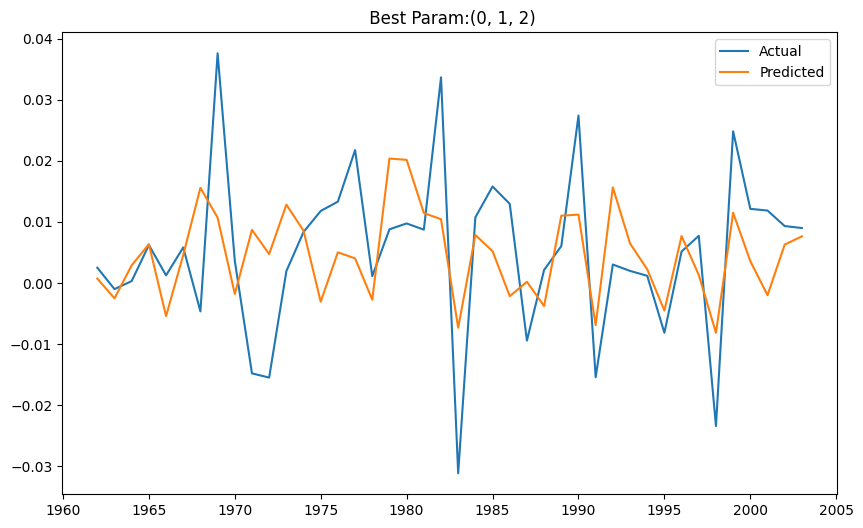

In [ ]:
# Plot
plt.plot(train_PH_y.index, train_PH_y.values, label='Actual')
plt.plot(train_PH_y.index, prediction_train_ph, label='Predicted')
plt.legend()
plt.title(label=f" Best Param:{best_order_ph}")
plt.show()

In [ ]:
prediction_all_ph = result_ph.predict(exog=test_PH_X, start=0, end=len(df_merged)-1)

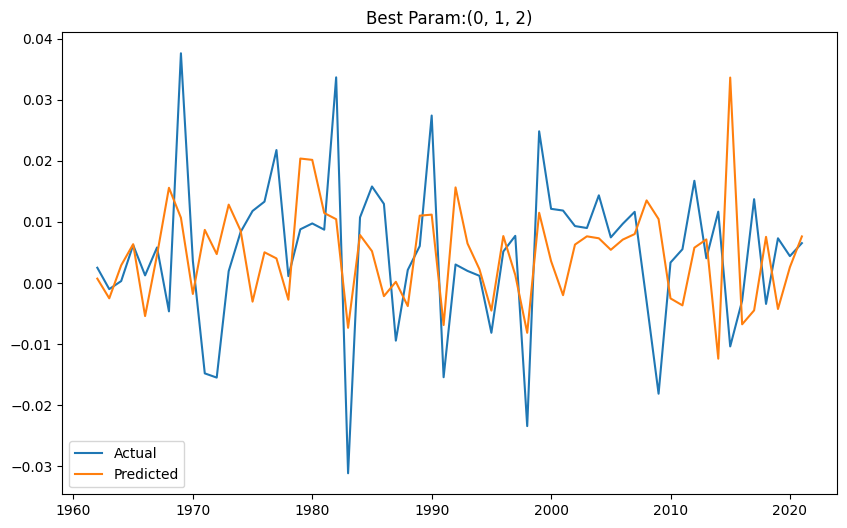

In [ ]:
# Plot
plt.plot(df_merged['Diff_filipina'].index, df_merged['Diff_filipina'].values, label='Actual')
plt.plot(df_merged['Diff_filipina'].index, prediction_all_ph, label='Predicted')
plt.legend()
plt.title(label=f"Best Param:{best_order_ph}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['PH Rice Yields'].iloc[0]
final_test_predictions_ph = prediction_test_ph.cumsum() + base_value

In [ ]:
final_test_predictions_ph

2004-01-01    0.358610
2005-01-01    0.364035
2006-01-01    0.371124
2007-01-01    0.379126
2008-01-01    0.392638
2009-01-01    0.403093
2010-01-01    0.400563
2011-01-01    0.396895
2012-01-01    0.402664
2013-01-01    0.409788
2014-01-01    0.397393
2015-01-01    0.431008
2016-01-01    0.424238
2017-01-01    0.419748
2018-01-01    0.427290
2019-01-01    0.423027
2020-01-01    0.425612
2021-01-01    0.433223
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
final_test_predictions_ph = final_test_predictions_ph.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_ph)

2004-01-01    35861.035776
2005-01-01    36403.522896
2006-01-01    37112.446672
2007-01-01    37912.625954
2008-01-01    39263.847470
2009-01-01    40309.287691
2010-01-01    40056.292317
2011-01-01    39689.504369
2012-01-01    40266.369886
2013-01-01    40978.779648
2014-01-01    39739.310066
2015-01-01    43100.825600
2016-01-01    42423.810503
2017-01-01    41974.825601
2018-01-01    42729.036205
2019-01-01    42302.712224
2020-01-01    42561.164224
2021-01-01    43322.259926
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['PH Rice Yields']

Year
2004-01-01    0.35130
2005-01-01    0.35876
2006-01-01    0.36844
2007-01-01    0.38008
2008-01-01    0.37703
2009-01-01    0.35890
2010-01-01    0.36224
2011-01-01    0.36776
2012-01-01    0.38448
2013-01-01    0.38852
2014-01-01    0.40019
2015-01-01    0.38980
2016-01-01    0.38690
2017-01-01    0.40061
2018-01-01    0.39718
2019-01-01    0.40449
2020-01-01    0.40888
2021-01-01    0.41540
Name: PH Rice Yields, dtype: float64

In [ ]:
test_data['PH Rice Yields'] = test_data['PH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['PH Rice Yields'])

Year
2004-01-01    35130.0
2005-01-01    35876.0
2006-01-01    36844.0
2007-01-01    38008.0
2008-01-01    37703.0
2009-01-01    35890.0
2010-01-01    36224.0
2011-01-01    36776.0
2012-01-01    38448.0
2013-01-01    38852.0
2014-01-01    40019.0
2015-01-01    38980.0
2016-01-01    38690.0
2017-01-01    40061.0
2018-01-01    39718.0
2019-01-01    40449.0
2020-01-01    40888.0
2021-01-01    41540.0
Name: PH Rice Yields, dtype: float64


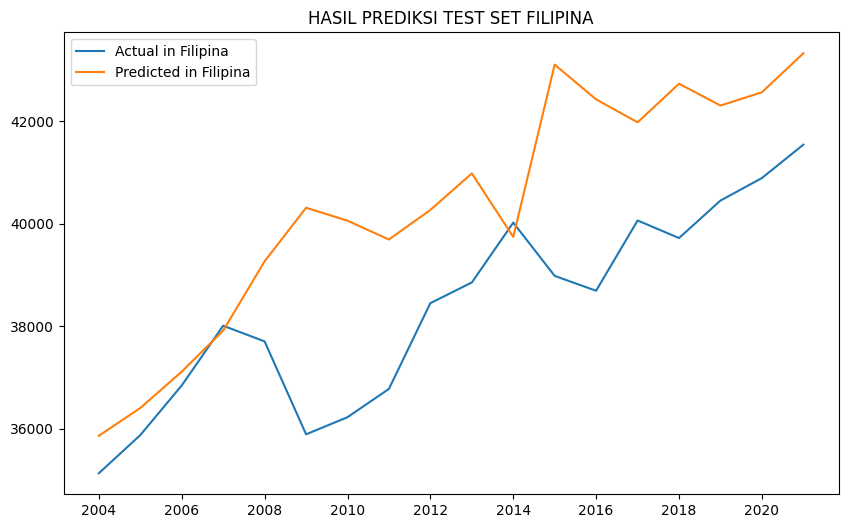

In [ ]:
# Plot
plt.plot(test_data['PH Rice Yields'].index, test_data['PH Rice Yields'].values, label='Actual in Filipina')
plt.plot(test_data['PH Rice Yields'].index, final_test_predictions_ph, label='Predicted in Filipina')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET FILIPINA')
plt.show()

In [ ]:
base_value2 = train_data['PH Rice Yields'].iloc[0]
final_train_predictions_ph = prediction_train_ph.cumsum() + base_value2

In [ ]:
final_train_predictions_ph = final_train_predictions_ph.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_ph)

1962-01-01    12618.863644
1963-01-01    12367.368451
1964-01-01    12655.857627
1965-01-01    13290.202732
1966-01-01    12747.800334
1967-01-01    13205.123134
1968-01-01    14762.457403
1969-01-01    15829.727880
1970-01-01    15649.077121
1971-01-01    16517.441892
1972-01-01    16989.892710
1973-01-01    18271.668746
1974-01-01    19127.225030
1975-01-01    18821.260893
1976-01-01    19323.258177
1977-01-01    19724.794379
1978-01-01    19450.571508
1979-01-01    21486.661359
1980-01-01    23501.109918
1981-01-01    24645.739824
1982-01-01    25689.195152
1983-01-01    24954.967977
1984-01-01    25739.398858
1985-01-01    26259.380696
1986-01-01    26043.182244
1987-01-01    26061.874496
1988-01-01    25683.354607
1989-01-01    26784.700914
1990-01-01    27902.861947
1991-01-01    27213.962631
1992-01-01    28777.587148
1993-01-01    29423.635075
1994-01-01    29647.528049
1995-01-01    29194.800232
1996-01-01    29962.270354
1997-01-01    30092.501679
1998-01-01    29276.900128
1

In [ ]:
train_data['PH Rice Yields'] = train_data['PH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['PH Rice Yields'])

Year
1962-01-01    12548.0
1963-01-01    12447.0
1964-01-01    12478.0
1965-01-01    13099.0
1966-01-01    13223.0
1967-01-01    13804.0
1968-01-01    13339.0
1969-01-01    17098.0
1970-01-01    17460.0
1971-01-01    15980.0
1972-01-01    14431.0
1973-01-01    14624.0
1974-01-01    15458.0
1975-01-01    16636.0
1976-01-01    17967.0
1977-01-01    20142.0
1978-01-01    20253.0
1979-01-01    21131.0
1980-01-01    22105.0
1981-01-01    22977.0
1982-01-01    26342.0
1983-01-01    23227.0
1984-01-01    24300.0
1985-01-01    25879.0
1986-01-01    27173.0
1987-01-01    26229.0
1988-01-01    26442.0
1989-01-01    27046.0
1990-01-01    29786.0
1991-01-01    28243.0
1992-01-01    28545.0
1993-01-01    28742.0
1994-01-01    28859.0
1995-01-01    28043.0
1996-01-01    28558.0
1997-01-01    29329.0
1998-01-01    26986.0
1999-01-01    29468.0
2000-01-01    30681.0
2001-01-01    31866.0
2002-01-01    32797.0
2003-01-01    33696.0
Name: PH Rice Yields, dtype: float64


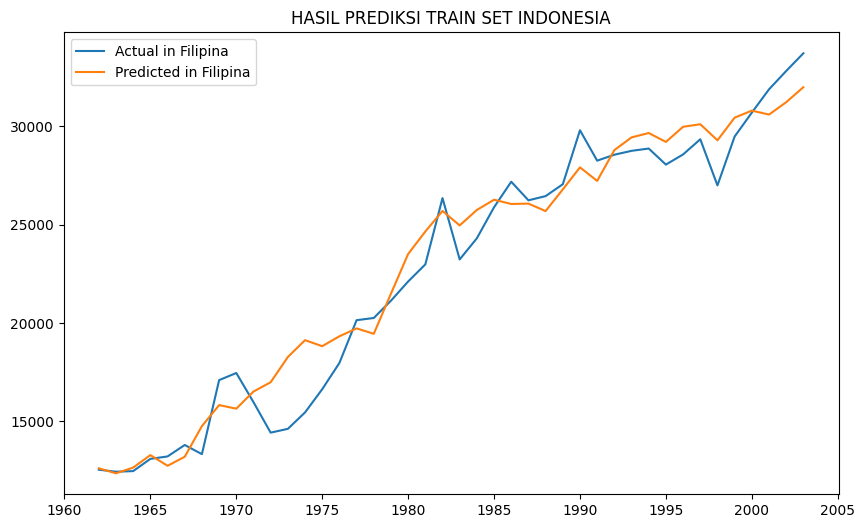

In [ ]:
# Plot
plt.plot(train_data['PH Rice Yields'].index, train_data['PH Rice Yields'].values, label='Actual in Filipina')
plt.plot(train_data['PH Rice Yields'].index, final_train_predictions_ph, label='Predicted in Filipina')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET INDONESIA')
plt.show()

In [ ]:
base_value3 = df_merged['PH Rice Yields'].iloc[0]
final_predictions_ph = prediction_all_ph.cumsum() + base_value3

In [ ]:
final_predictions_ph = final_predictions_ph.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_ph)

1962-01-01    12618.863644
1963-01-01    12367.368451
1964-01-01    12655.857627
1965-01-01    13290.202732
1966-01-01    12747.800334
1967-01-01    13205.123134
1968-01-01    14762.457403
1969-01-01    15829.727880
1970-01-01    15649.077121
1971-01-01    16517.441892
1972-01-01    16989.892710
1973-01-01    18271.668746
1974-01-01    19127.225030
1975-01-01    18821.260893
1976-01-01    19323.258177
1977-01-01    19724.794379
1978-01-01    19450.571508
1979-01-01    21486.661359
1980-01-01    23501.109918
1981-01-01    24645.739824
1982-01-01    25689.195152
1983-01-01    24954.967977
1984-01-01    25739.398858
1985-01-01    26259.380696
1986-01-01    26043.182244
1987-01-01    26061.874496
1988-01-01    25683.354607
1989-01-01    26784.700914
1990-01-01    27902.861947
1991-01-01    27213.962631
1992-01-01    28777.587148
1993-01-01    29423.635075
1994-01-01    29647.528049
1995-01-01    29194.800232
1996-01-01    29962.270354
1997-01-01    30092.501679
1998-01-01    29276.900128
1

In [ ]:
df_merged['PH Rice Yields'] = df_merged['PH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['PH Rice Yields'])

Year
1962-01-01    12548.0
1963-01-01    12447.0
1964-01-01    12478.0
1965-01-01    13099.0
1966-01-01    13223.0
1967-01-01    13804.0
1968-01-01    13339.0
1969-01-01    17098.0
1970-01-01    17460.0
1971-01-01    15980.0
1972-01-01    14431.0
1973-01-01    14624.0
1974-01-01    15458.0
1975-01-01    16636.0
1976-01-01    17967.0
1977-01-01    20142.0
1978-01-01    20253.0
1979-01-01    21131.0
1980-01-01    22105.0
1981-01-01    22977.0
1982-01-01    26342.0
1983-01-01    23227.0
1984-01-01    24300.0
1985-01-01    25879.0
1986-01-01    27173.0
1987-01-01    26229.0
1988-01-01    26442.0
1989-01-01    27046.0
1990-01-01    29786.0
1991-01-01    28243.0
1992-01-01    28545.0
1993-01-01    28742.0
1994-01-01    28859.0
1995-01-01    28043.0
1996-01-01    28558.0
1997-01-01    29329.0
1998-01-01    26986.0
1999-01-01    29468.0
2000-01-01    30681.0
2001-01-01    31866.0
2002-01-01    32797.0
2003-01-01    33696.0
2004-01-01    35130.0
2005-01-01    35876.0
2006-01-01    36844.0
2007-

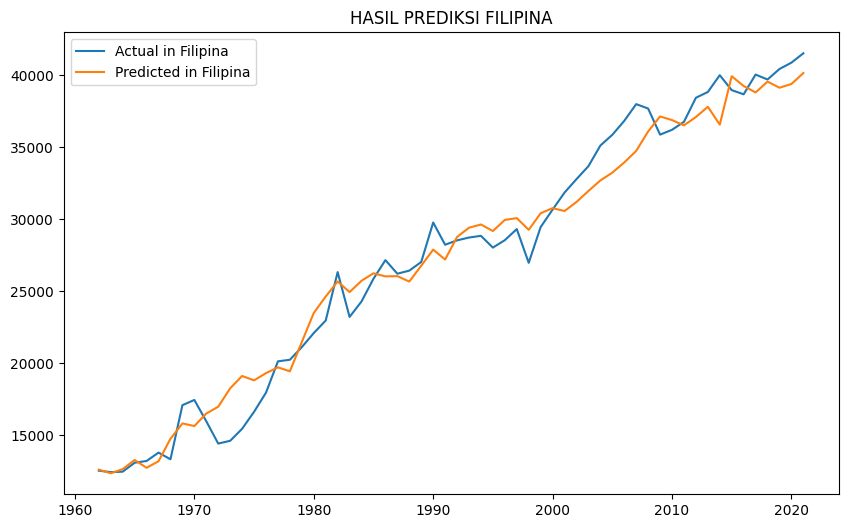

In [ ]:
# Plot
plt.plot(df_merged['PH Rice Yields'].index, df_merged['PH Rice Yields'].values, label='Actual in Filipina')
plt.plot(df_merged['PH Rice Yields'].index, final_predictions_ph, label='Predicted in Filipina')
plt.legend()
plt.title('HASIL PREDIKSI FILIPINA')
plt.show()

# Eksperimen Vietnam

In [ ]:
print(len(train_VN_X))
print(len(train_VN_y))

print(len(test_VN_X))
print(len(test_VN_y))

42
42
18
18


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_VN_y,
                     exog= train_VN_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-199.994, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-205.724, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-201.992, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-215.371, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-214.827, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-220.800, Time=0.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-220.001, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-217.038, Time=0.56 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-219.585, Time=0.79 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-213.247, Time=0.33 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-220.399, T

In [ ]:
best_order_vn = step_wise.order
print("Best Order:", best_order_vn)

Best Order: (3, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_VN_y, exog=train_VN_X,
                     order=best_order_vn)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_vn = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_vn.summary())

                               SARIMAX Results                                
Dep. Variable:           Diff_vietnam   No. Observations:                   42
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 117.242
Date:                Wed, 26 Jul 2023   AIC                           -208.485
Time:                        06:30:28   BIC                           -186.208
Sample:                    01-01-1962   HQIC                          -200.373
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.0098      0.280      0.035      0.972      -0.540       0.559
Diff_malaysia      0.3053      0.266      1.150      0.250      -0.215       0.826
Diff_brunei        0.0771      0.076

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_vn.aic, 2)
bic = round(result_vn.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -208.48
BIC: -186.21


In [ ]:
exog_test = test_VN_X
prediction_test_vn = result_vn.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_vn

2004-01-01    0.004728
2005-01-01    0.019162
2006-01-01    0.012020
2007-01-01    0.015610
2008-01-01    0.011350
2009-01-01    0.012445
2010-01-01    0.004467
2011-01-01    0.014382
2012-01-01    0.010160
2013-01-01    0.012537
2014-01-01   -0.009891
2015-01-01    0.046775
2016-01-01    0.002584
2017-01-01    0.001799
2018-01-01    0.012344
2019-01-01   -0.002674
2020-01-01    0.016745
2021-01-01    0.015246
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_VN_y

Year
2004-01-01    0.02166
2005-01-01    0.00338
2006-01-01    0.00052
2007-01-01    0.00926
2008-01-01    0.02467
2009-01-01    0.00036
2010-01-01    0.01044
2011-01-01    0.01967
2012-01-01    0.00970
2013-01-01   -0.00627
2014-01-01    0.01812
2015-01-01    0.00059
2016-01-01   -0.01859
2017-01-01   -0.00262
2018-01-01    0.02704
2019-01-01    0.00191
2020-01-01    0.00841
2021-01-01    0.01528
Name: Diff_vietnam, dtype: float64

MAE:0.012996


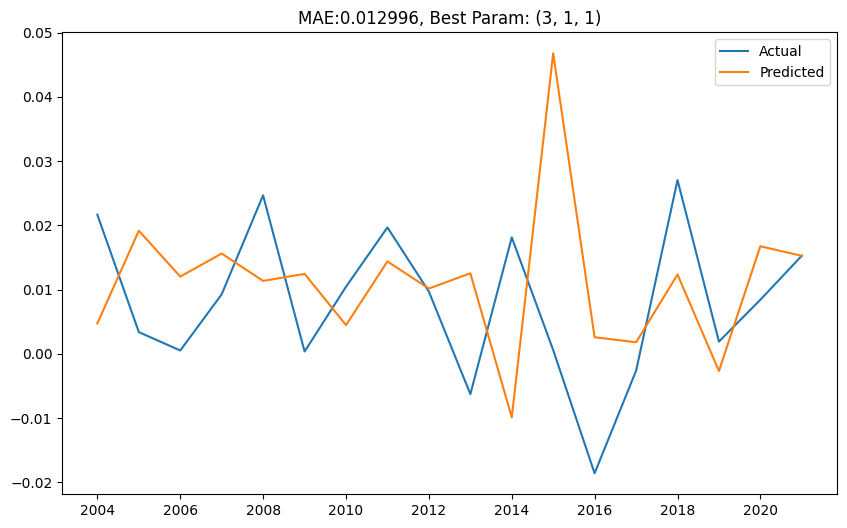

In [ ]:
# Metric
mae = mean_absolute_error(test_VN_y, prediction_test_vn)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_VN_y.index, test_VN_y.values, label='Actual')
plt.plot(test_VN_y.index, prediction_test_vn, label='Predicted')
plt.legend()
plt.title(label=f"MAE:{mae:.6f}, Best Param: {best_order_vn}")
plt.show()

In [ ]:
prediction_train_vn = result_vn.predict(exog=train_VN_X, start=0, end=len(train_data)-1)

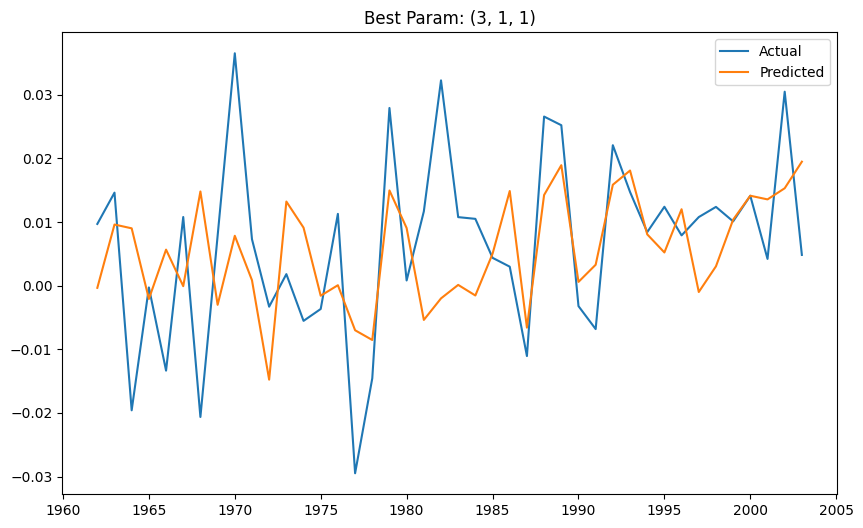

In [ ]:
# Plot
plt.plot(train_VN_y.index, train_VN_y.values, label='Actual')
plt.plot(train_VN_y.index, prediction_train_vn, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_vn}")
plt.show()

In [ ]:
prediction_all_vn = result_vn.predict(exog=test_VN_X,start=0, end=len(df_merged)-1)

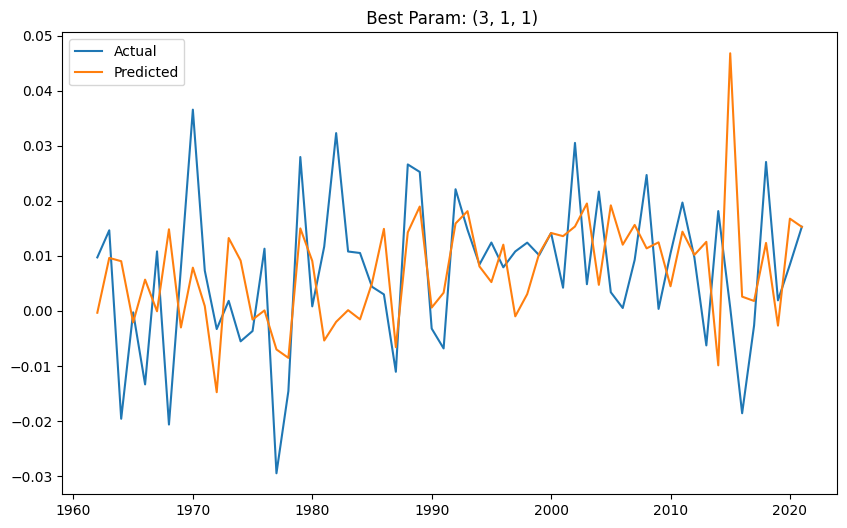

In [ ]:
# Plot
plt.plot(df_merged['Diff_vietnam'].index, df_merged['Diff_vietnam'].values, label='Actual')
plt.plot(df_merged['Diff_vietnam'].index, prediction_all_vn, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_vn}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['VN Rice Yields'].iloc[0]
final_test_predictions_vn = prediction_test_vn.cumsum() + base_value

In [ ]:
final_test_predictions_vn = final_test_predictions_vn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_vn)

2004-01-01    49025.824304
2005-01-01    50942.027038
2006-01-01    52143.998611
2007-01-01    53704.977680
2008-01-01    54840.004801
2009-01-01    56084.519618
2010-01-01    56531.216995
2011-01-01    57969.429174
2012-01-01    58985.409534
2013-01-01    60239.127554
2014-01-01    59250.073780
2015-01-01    63927.620885
2016-01-01    64186.049209
2017-01-01    64365.938807
2018-01-01    65600.319540
2019-01-01    65332.872709
2020-01-01    67007.411453
2021-01-01    68531.994443
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['VN Rice Yields'] = test_data['VN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['VN Rice Yields'])

Year
2004-01-01    48553.0
2005-01-01    48891.0
2006-01-01    48943.0
2007-01-01    49869.0
2008-01-01    52336.0
2009-01-01    52372.0
2010-01-01    53416.0
2011-01-01    55383.0
2012-01-01    56353.0
2013-01-01    55726.0
2014-01-01    57538.0
2015-01-01    57597.0
2016-01-01    55738.0
2017-01-01    55476.0
2018-01-01    58180.0
2019-01-01    58371.0
2020-01-01    59212.0
2021-01-01    60740.0
Name: VN Rice Yields, dtype: float64


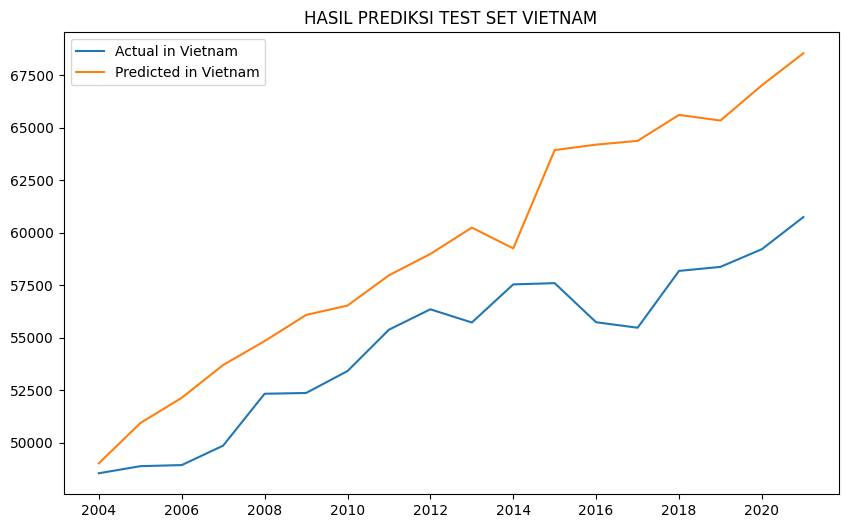

In [ ]:
# Plot
plt.plot(test_data['VN Rice Yields'].index, test_data['VN Rice Yields'].values, label='Actual in Vietnam')
plt.plot(test_data['VN Rice Yields'].index, final_test_predictions_vn, label='Predicted in Vietnam')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET VIETNAM')
plt.show()

In [ ]:
base_value2 = train_data['VN Rice Yields'].iloc[0]
final_train_predictions_vn = prediction_train_vn.cumsum() + base_value2

In [ ]:
train_data['VN Rice Yields'] = train_data['VN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['VN Rice Yields'])

Year
1962-01-01    19937.0
1963-01-01    21400.0
1964-01-01    19441.0
1965-01-01    19414.0
1966-01-01    18079.0
1967-01-01    19159.0
1968-01-01    17095.0
1969-01-01    17880.0
1970-01-01    21534.0
1971-01-01    22265.0
1972-01-01    21935.0
1973-01-01    22117.0
1974-01-01    21564.0
1975-01-01    21198.0
1976-01-01    22327.0
1977-01-01    19378.0
1978-01-01    17922.0
1979-01-01    20716.0
1980-01-01    20798.0
1981-01-01    21966.0
1982-01-01    25194.0
1983-01-01    26272.0
1984-01-01    27323.0
1985-01-01    27761.0
1986-01-01    28060.0
1987-01-01    26954.0
1988-01-01    29613.0
1989-01-01    32136.0
1990-01-01    31815.0
1991-01-01    31133.0
1992-01-01    33342.0
1993-01-01    34815.0
1994-01-01    35657.0
1995-01-01    36898.0
1996-01-01    37689.0
1997-01-01    38768.0
1998-01-01    40007.0
1999-01-01    41018.0
2000-01-01    42432.0
2001-01-01    42853.0
2002-01-01    45903.0
2003-01-01    46387.0
Name: VN Rice Yields, dtype: float64


In [ ]:
final_train_predictions_vn = final_train_predictions_vn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_vn)

1962-01-01    19903.234508
1963-01-01    20864.899270
1964-01-01    21766.813589
1965-01-01    21558.099984
1966-01-01    22125.176004
1967-01-01    22117.725034
1968-01-01    23598.928119
1969-01-01    23298.109334
1970-01-01    24082.775399
1971-01-01    24169.272355
1972-01-01    22692.269903
1973-01-01    24015.181703
1974-01-01    24927.973741
1975-01-01    24770.431659
1976-01-01    24778.197227
1977-01-01    24077.689844
1978-01-01    23224.218485
1979-01-01    24721.847841
1980-01-01    25628.898796
1981-01-01    25090.823712
1982-01-01    24891.465841
1983-01-01    24904.082105
1984-01-01    24750.073883
1985-01-01    25253.280542
1986-01-01    26742.096296
1987-01-01    26083.011391
1988-01-01    27508.625680
1989-01-01    29403.208273
1990-01-01    29462.977148
1991-01-01    29792.239694
1992-01-01    31379.186025
1993-01-01    33189.868812
1994-01-01    33997.136041
1995-01-01    34519.749012
1996-01-01    35721.758972
1997-01-01    35622.673032
1998-01-01    35927.325495
1

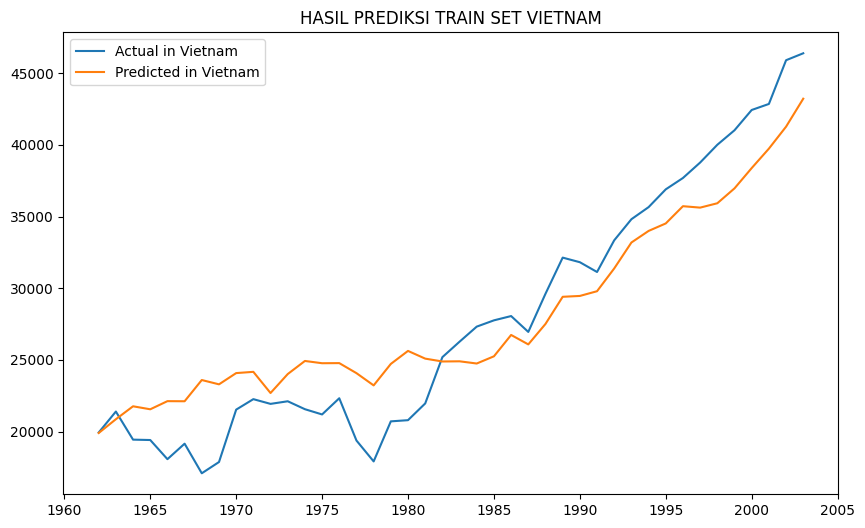

In [ ]:
# Plot
plt.plot(train_data['VN Rice Yields'].index, train_data['VN Rice Yields'].values, label='Actual in Vietnam')
plt.plot(train_data['VN Rice Yields'].index, final_train_predictions_vn, label='Predicted in Vietnam')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET VIETNAM')
plt.show()

In [ ]:
base_value3 = df_merged['VN Rice Yields'].iloc[0]
final_predictions_vn = prediction_all_vn.cumsum() + base_value3

In [ ]:
final_predictions_vn = final_predictions_vn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_vn)

1962-01-01    19903.234508
1963-01-01    20864.899270
1964-01-01    21766.813589
1965-01-01    21558.099984
1966-01-01    22125.176004
1967-01-01    22117.725034
1968-01-01    23598.928119
1969-01-01    23298.109334
1970-01-01    24082.775399
1971-01-01    24169.272355
1972-01-01    22692.269903
1973-01-01    24015.181703
1974-01-01    24927.973741
1975-01-01    24770.431659
1976-01-01    24778.197227
1977-01-01    24077.689844
1978-01-01    23224.218485
1979-01-01    24721.847841
1980-01-01    25628.898796
1981-01-01    25090.823712
1982-01-01    24891.465841
1983-01-01    24904.082105
1984-01-01    24750.073883
1985-01-01    25253.280542
1986-01-01    26742.096296
1987-01-01    26083.011391
1988-01-01    27508.625680
1989-01-01    29403.208273
1990-01-01    29462.977148
1991-01-01    29792.239694
1992-01-01    31379.186025
1993-01-01    33189.868812
1994-01-01    33997.136041
1995-01-01    34519.749012
1996-01-01    35721.758972
1997-01-01    35622.673032
1998-01-01    35927.325495
1

In [ ]:
df_merged['VN Rice Yields'] = df_merged['VN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['VN Rice Yields'])

Year
1962-01-01    19937.0
1963-01-01    21400.0
1964-01-01    19441.0
1965-01-01    19414.0
1966-01-01    18079.0
1967-01-01    19159.0
1968-01-01    17095.0
1969-01-01    17880.0
1970-01-01    21534.0
1971-01-01    22265.0
1972-01-01    21935.0
1973-01-01    22117.0
1974-01-01    21564.0
1975-01-01    21198.0
1976-01-01    22327.0
1977-01-01    19378.0
1978-01-01    17922.0
1979-01-01    20716.0
1980-01-01    20798.0
1981-01-01    21966.0
1982-01-01    25194.0
1983-01-01    26272.0
1984-01-01    27323.0
1985-01-01    27761.0
1986-01-01    28060.0
1987-01-01    26954.0
1988-01-01    29613.0
1989-01-01    32136.0
1990-01-01    31815.0
1991-01-01    31133.0
1992-01-01    33342.0
1993-01-01    34815.0
1994-01-01    35657.0
1995-01-01    36898.0
1996-01-01    37689.0
1997-01-01    38768.0
1998-01-01    40007.0
1999-01-01    41018.0
2000-01-01    42432.0
2001-01-01    42853.0
2002-01-01    45903.0
2003-01-01    46387.0
2004-01-01    48553.0
2005-01-01    48891.0
2006-01-01    48943.0
2007-

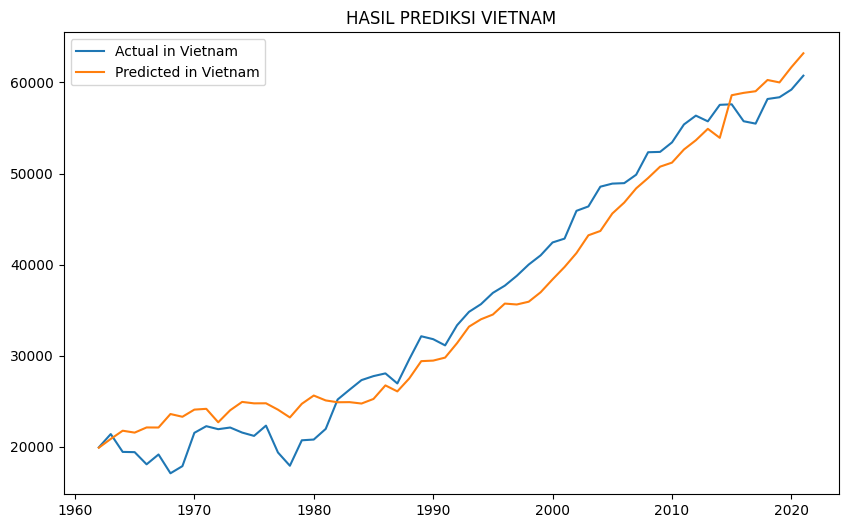

In [ ]:
# Plot
plt.plot(df_merged['VN Rice Yields'].index, df_merged['VN Rice Yields'].values, label='Actual in Vietnam')
plt.plot(df_merged['VN Rice Yields'].index, final_predictions_vn, label='Predicted in Vietnam')
plt.legend()
plt.title('HASIL PREDIKSI VIETNAM')
plt.show()

# Eksperimen Brunei

In [ ]:
print(len(train_BN_X))
print(len(train_BN_y))

print(len(test_BN_X))
print(len(test_BN_y))

42
42
18
18


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_BN_y,
                     exog= train_BN_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-90.319, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-107.765, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-124.167, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-92.319, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.973 seconds


In [ ]:
best_order_bn = step_wise.order
print("Best Order:", best_order_bn)

Best Order: (0, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_BN_y, exog=train_BN_X,
                     order=best_order_bn)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_bn = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_bn.summary())

                               SARIMAX Results                                
Dep. Variable:            Diff_brunei   No. Observations:                   42
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  70.512
Date:                Wed, 26 Jul 2023   AIC                           -121.024
Time:                        06:30:48   BIC                           -103.889
Sample:                    01-01-1962   HQIC                          -114.785
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.5817      1.457      0.399      0.690      -2.273       3.437
Diff_filipina     -0.1148      0.708     -0.162      0.871      -1.503       1.273
Diff_malaysia      0.5963      0.822

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_bn.aic, 2)
bic = round(result_bn.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -121.02
BIC: -103.89


In [ ]:
exog_test = test_BN_X
prediction_test_bn = result_bn.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_bn

2004-01-01   -0.004736
2005-01-01   -0.038934
2006-01-01   -0.019350
2007-01-01   -0.009485
2008-01-01    0.014679
2009-01-01   -0.003436
2010-01-01    0.012082
2011-01-01    0.019755
2012-01-01    0.006982
2013-01-01   -0.020064
2014-01-01   -0.084618
2015-01-01    0.052633
2016-01-01   -0.037056
2017-01-01   -0.016447
2018-01-01    0.020551
2019-01-01   -0.018736
2020-01-01    0.032253
2021-01-01   -0.009592
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_BN_y

Year
2004-01-01    0.00262
2005-01-01    0.00538
2006-01-01   -0.00637
2007-01-01   -0.00836
2008-01-01   -0.00247
2009-01-01   -0.01861
2010-01-01    0.00654
2011-01-01    0.03426
2012-01-01    0.00545
2013-01-01   -0.00108
2014-01-01    0.04878
2015-01-01    0.06918
2016-01-01   -0.05876
2017-01-01    0.01020
2018-01-01    0.03436
2019-01-01   -0.00630
2020-01-01    0.10032
2021-01-01   -0.00590
Name: Diff_brunei, dtype: float64

MAE:0.024165


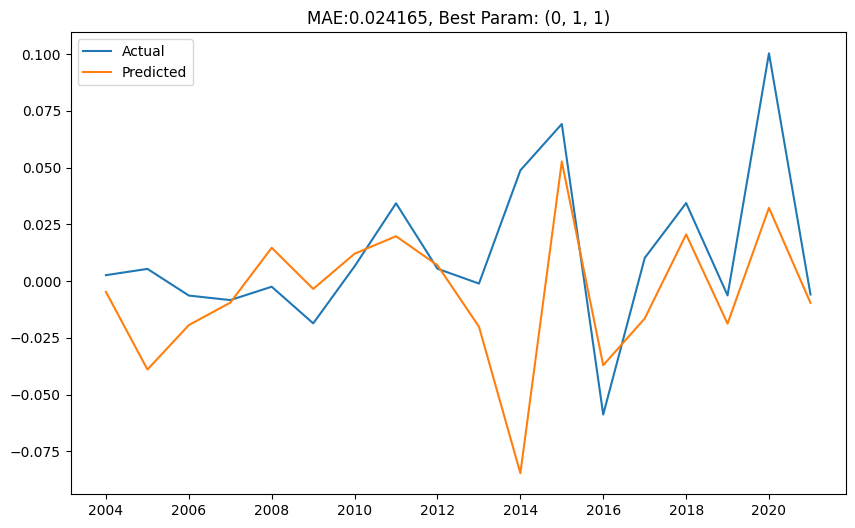

In [ ]:
# Metric
mae = mean_absolute_error(test_BN_y, prediction_test_bn)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_BN_y.index, test_BN_y.values, label='Actual')
plt.plot(test_BN_y.index, prediction_test_bn, label='Predicted')
plt.legend()
plt.title(label=f"MAE:{mae:.6f}, Best Param: {best_order_bn}")
plt.show()

In [ ]:
prediction_train_bn = result_bn.predict(exog=train_BN_X, start=0, end=len(train_data)-1)

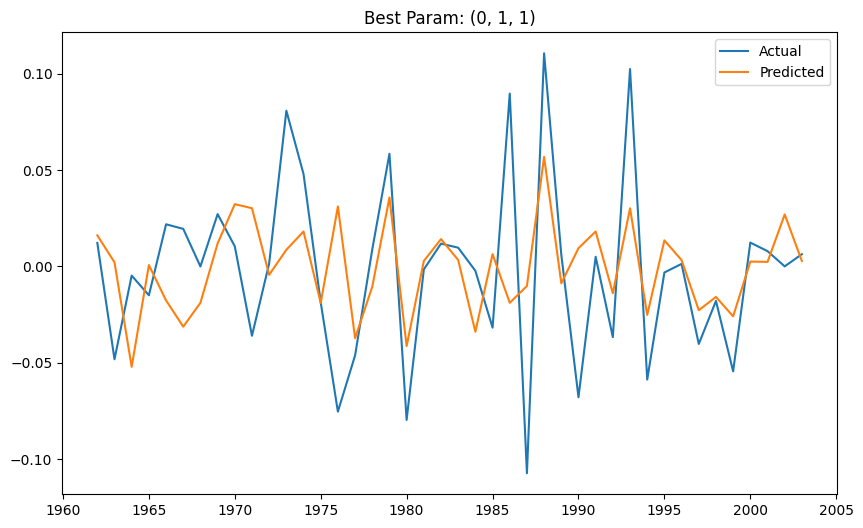

In [ ]:
# Plot
plt.plot(train_BN_y.index, train_BN_y.values, label='Actual')
plt.plot(train_BN_y.index, prediction_train_bn, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_bn}")
plt.show()

In [ ]:
prediction_all_bn = result_bn.predict(exog=test_BN_X, start=0, end=len(df_merged)-1)

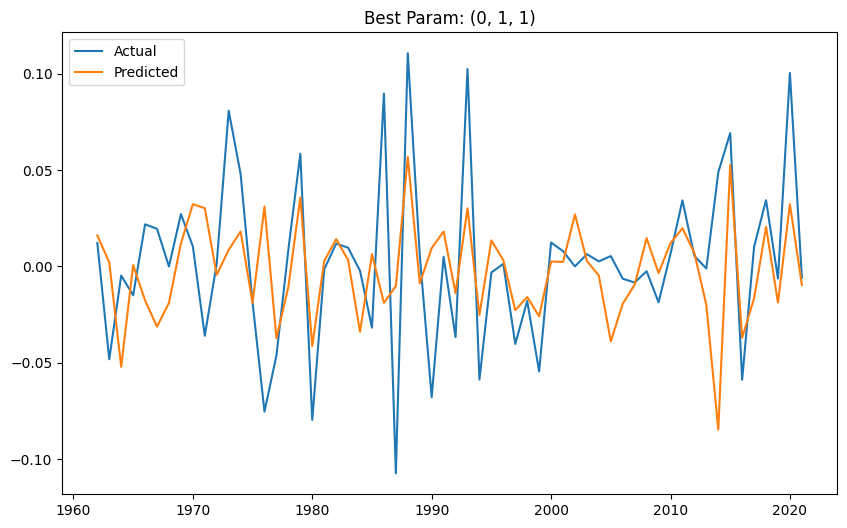

In [ ]:
# Plot
plt.plot(df_merged['Diff_brunei'].index, df_merged['Diff_brunei'].values, label='Actual')
plt.plot(df_merged['Diff_brunei'].index, prediction_all_bn, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_bn}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['BN Rice Yields'].iloc[0]
final_test_predictions_bn = prediction_test_bn.cumsum() + base_value

In [ ]:
final_test_predictions_bn = final_test_predictions_bn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_bn)

2004-01-01    7716.402071
2005-01-01    3822.999637
2006-01-01    1887.956092
2007-01-01     939.477044
2008-01-01    2407.358477
2009-01-01    2063.744397
2010-01-01    3271.980112
2011-01-01    5247.515232
2012-01-01    5945.758435
2013-01-01    3939.356975
2014-01-01   -4522.442662
2015-01-01     740.877008
2016-01-01   -2964.675280
2017-01-01   -4609.398095
2018-01-01   -2554.272730
2019-01-01   -4427.842531
2020-01-01   -1202.567017
2021-01-01   -2161.754748
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['BN Rice Yields'] = test_data['BN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['BN Rice Yields'])

Year
2004-01-01     8190.0
2005-01-01     8728.0
2006-01-01     8091.0
2007-01-01     7255.0
2008-01-01     7008.0
2009-01-01     5147.0
2010-01-01     5801.0
2011-01-01     9227.0
2012-01-01     9772.0
2013-01-01     9664.0
2014-01-01    14542.0
2015-01-01    21460.0
2016-01-01    15584.0
2017-01-01    16604.0
2018-01-01    20040.0
2019-01-01    19410.0
2020-01-01    29442.0
2021-01-01    28852.0
Name: BN Rice Yields, dtype: float64


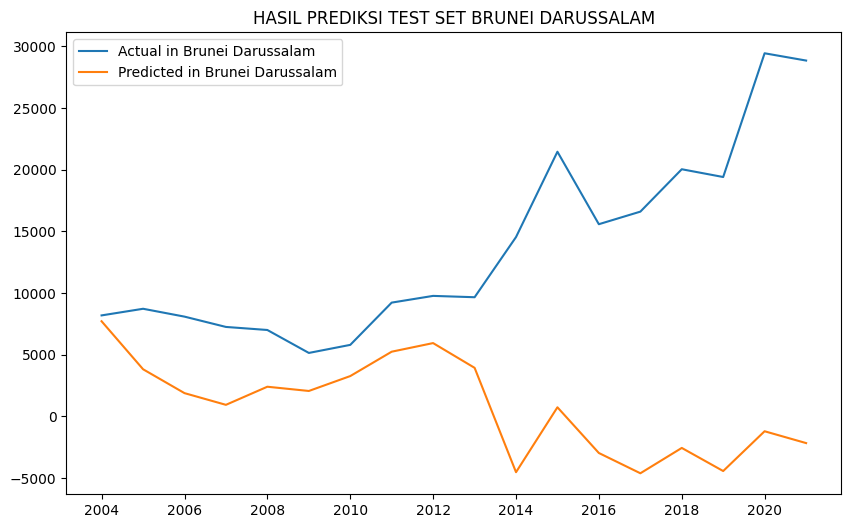

In [ ]:
# Plot
plt.plot(test_data['BN Rice Yields'].index, test_data['BN Rice Yields'].values, label='Actual in Brunei Darussalam')
plt.plot(test_data['BN Rice Yields'].index, final_test_predictions_bn, label='Predicted in Brunei Darussalam')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET BRUNEI DARUSSALAM')
plt.show()

In [ ]:
base_value2 = train_data['BN Rice Yields'].iloc[0]
final_train_predictions_bn = prediction_train_ph.cumsum() + base_value2

In [ ]:
train_data['BN Rice Yields'] = train_data['BN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['BN Rice Yields'])

Year
1962-01-01    18527.0
1963-01-01    13711.0
1964-01-01    13235.0
1965-01-01    11737.0
1966-01-01    13922.0
1967-01-01    15871.0
1968-01-01    15868.0
1969-01-01    18581.0
1970-01-01    19621.0
1971-01-01    16024.0
1972-01-01    16175.0
1973-01-01    24251.0
1974-01-01    29040.0
1975-01-01    27178.0
1976-01-01    19647.0
1977-01-01    15034.0
1978-01-01    15917.0
1979-01-01    21759.0
1980-01-01    13797.0
1981-01-01    13643.0
1982-01-01    14825.0
1983-01-01    15797.0
1984-01-01    15571.0
1985-01-01    12394.0
1986-01-01    21359.0
1987-01-01    10630.0
1988-01-01    21685.0
1989-01-01    22286.0
1990-01-01    15500.0
1991-01-01    16000.0
1992-01-01    12333.0
1993-01-01    22571.0
1994-01-01    16702.0
1995-01-01    16387.0
1996-01-01    16519.0
1997-01-01    12497.0
1998-01-01    10707.0
1999-01-01     5263.0
2000-01-01     6500.0
2001-01-01     7292.0
2002-01-01     7294.0
2003-01-01     7928.0
Name: BN Rice Yields, dtype: float64


In [ ]:
final_train_predictions_bn = final_train_predictions_bn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_bn)

1962-01-01    18597.863644
1963-01-01    18346.368451
1964-01-01    18634.857627
1965-01-01    19269.202732
1966-01-01    18726.800334
1967-01-01    19184.123134
1968-01-01    20741.457403
1969-01-01    21808.727880
1970-01-01    21628.077121
1971-01-01    22496.441892
1972-01-01    22968.892710
1973-01-01    24250.668746
1974-01-01    25106.225030
1975-01-01    24800.260893
1976-01-01    25302.258177
1977-01-01    25703.794379
1978-01-01    25429.571508
1979-01-01    27465.661359
1980-01-01    29480.109918
1981-01-01    30624.739824
1982-01-01    31668.195152
1983-01-01    30933.967977
1984-01-01    31718.398858
1985-01-01    32238.380696
1986-01-01    32022.182244
1987-01-01    32040.874496
1988-01-01    31662.354607
1989-01-01    32763.700914
1990-01-01    33881.861947
1991-01-01    33192.962631
1992-01-01    34756.587148
1993-01-01    35402.635075
1994-01-01    35626.528049
1995-01-01    35173.800232
1996-01-01    35941.270354
1997-01-01    36071.501679
1998-01-01    35255.900128
1

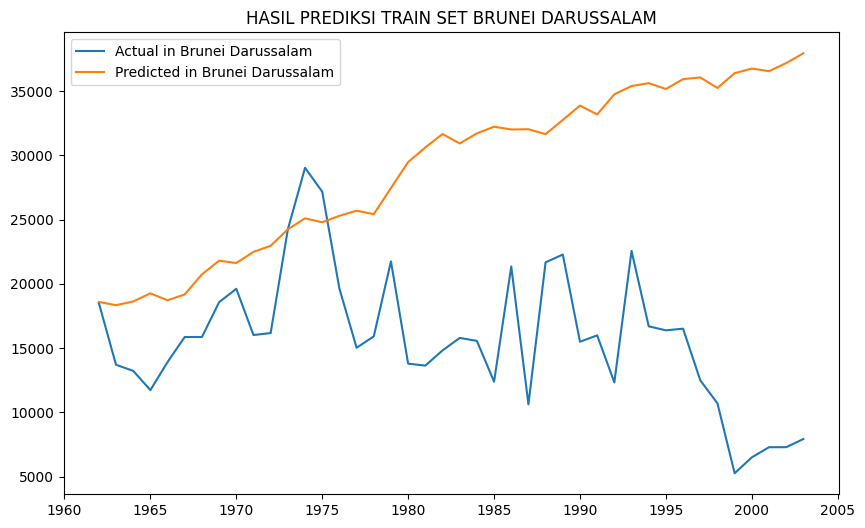

In [ ]:
# Plot
plt.plot(train_data['BN Rice Yields'].index, train_data['BN Rice Yields'].values, label='Actual in Brunei Darussalam')
plt.plot(train_data['BN Rice Yields'].index, final_train_predictions_bn, label='Predicted in Brunei Darussalam')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET BRUNEI DARUSSALAM')
plt.show()

In [ ]:
base_value3 = df_merged['BN Rice Yields'].iloc[0]
final_predictions_bn = prediction_all_ph.cumsum() + base_value3

In [ ]:
final_predictions_bn = final_predictions_bn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_bn)

1962-01-01    18597.863644
1963-01-01    18346.368451
1964-01-01    18634.857627
1965-01-01    19269.202732
1966-01-01    18726.800334
1967-01-01    19184.123134
1968-01-01    20741.457403
1969-01-01    21808.727880
1970-01-01    21628.077121
1971-01-01    22496.441892
1972-01-01    22968.892710
1973-01-01    24250.668746
1974-01-01    25106.225030
1975-01-01    24800.260893
1976-01-01    25302.258177
1977-01-01    25703.794379
1978-01-01    25429.571508
1979-01-01    27465.661359
1980-01-01    29480.109918
1981-01-01    30624.739824
1982-01-01    31668.195152
1983-01-01    30933.967977
1984-01-01    31718.398858
1985-01-01    32238.380696
1986-01-01    32022.182244
1987-01-01    32040.874496
1988-01-01    31662.354607
1989-01-01    32763.700914
1990-01-01    33881.861947
1991-01-01    33192.962631
1992-01-01    34756.587148
1993-01-01    35402.635075
1994-01-01    35626.528049
1995-01-01    35173.800232
1996-01-01    35941.270354
1997-01-01    36071.501679
1998-01-01    35255.900128
1

In [ ]:
df_merged['BN Rice Yields'] = df_merged['BN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['BN Rice Yields'])

Year
1962-01-01    18527.0
1963-01-01    13711.0
1964-01-01    13235.0
1965-01-01    11737.0
1966-01-01    13922.0
1967-01-01    15871.0
1968-01-01    15868.0
1969-01-01    18581.0
1970-01-01    19621.0
1971-01-01    16024.0
1972-01-01    16175.0
1973-01-01    24251.0
1974-01-01    29040.0
1975-01-01    27178.0
1976-01-01    19647.0
1977-01-01    15034.0
1978-01-01    15917.0
1979-01-01    21759.0
1980-01-01    13797.0
1981-01-01    13643.0
1982-01-01    14825.0
1983-01-01    15797.0
1984-01-01    15571.0
1985-01-01    12394.0
1986-01-01    21359.0
1987-01-01    10630.0
1988-01-01    21685.0
1989-01-01    22286.0
1990-01-01    15500.0
1991-01-01    16000.0
1992-01-01    12333.0
1993-01-01    22571.0
1994-01-01    16702.0
1995-01-01    16387.0
1996-01-01    16519.0
1997-01-01    12497.0
1998-01-01    10707.0
1999-01-01     5263.0
2000-01-01     6500.0
2001-01-01     7292.0
2002-01-01     7294.0
2003-01-01     7928.0
2004-01-01     8190.0
2005-01-01     8728.0
2006-01-01     8091.0
2007-

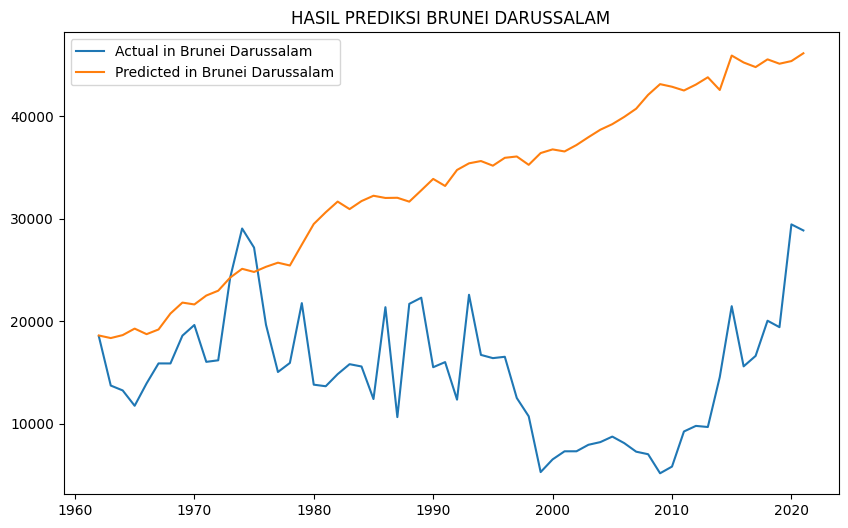

In [ ]:
# Plot
plt.plot(df_merged['BN Rice Yields'].index, df_merged['BN Rice Yields'].values, label='Actual in Brunei Darussalam')
plt.plot(df_merged['BN Rice Yields'].index, final_predictions_bn, label='Predicted in Brunei Darussalam')
plt.legend()
plt.title('HASIL PREDIKSI BRUNEI DARUSSALAM')
plt.show()

# Eksperimen Laos

In [ ]:
print(len(train_LA_X))
print(len(train_LA_y))

print(len(test_LA_X))
print(len(test_LA_y))

42
42
18
18


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_LA_y,
                     exog= train_LA_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-170.186, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-189.801, Time=0.98 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-205.589, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-172.181, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-205.789, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-204.214, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-206.649, Time=0.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-208.117, Time=0.61 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-205.893, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 5.781 seconds


In [ ]:
best_order_la = step_wise.order
print("Best Order:", best_order_la)

Best Order: (0, 1, 2)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_LA_y, exog=train_LA_X,
                     order=best_order_la)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_la = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_la.summary())

                               SARIMAX Results                                
Dep. Variable:              Diff_laos   No. Observations:                   42
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 112.380
Date:                Wed, 26 Jul 2023   AIC                           -202.759
Time:                        06:31:03   BIC                           -183.910
Sample:                    01-01-1962   HQIC                          -195.896
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.2847      0.218      1.306      0.191      -0.142       0.712
Diff_malaysia      0.0083      0.184      0.045      0.964      -0.353       0.369
Diff_brunei       -0.0411      0.071

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_la.aic, 2)
bic = round(result_la.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -202.76
BIC: -183.91


In [ ]:
exog_test = test_LA_X
prediction_test_la = result_la.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_la

2004-01-01    0.010709
2005-01-01    0.021767
2006-01-01    0.003123
2007-01-01    0.010821
2008-01-01    0.013861
2009-01-01    0.003931
2010-01-01    0.009925
2011-01-01    0.010664
2012-01-01    0.014679
2013-01-01    0.003672
2014-01-01    0.003111
2015-01-01    0.002587
2016-01-01    0.001371
2017-01-01    0.002722
2018-01-01    0.006130
2019-01-01   -0.002718
2020-01-01    0.001483
2021-01-01    0.013628
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_LA_y

Year
2004-01-01    0.01428
2005-01-01    0.02059
2006-01-01    0.00965
2007-01-01    0.01378
2008-01-01    0.00539
2009-01-01    0.00647
2010-01-01   -0.02510
2011-01-01    0.01604
2012-01-01   -0.00146
2013-01-01    0.00948
2014-01-01    0.03471
2015-01-01    0.00715
2016-01-01    0.00124
2017-01-01   -0.00374
2018-01-01    0.00013
2019-01-01   -0.00716
2020-01-01   -0.03367
2021-01-01    0.02850
Name: Diff_laos, dtype: float64

MAE:0.010601


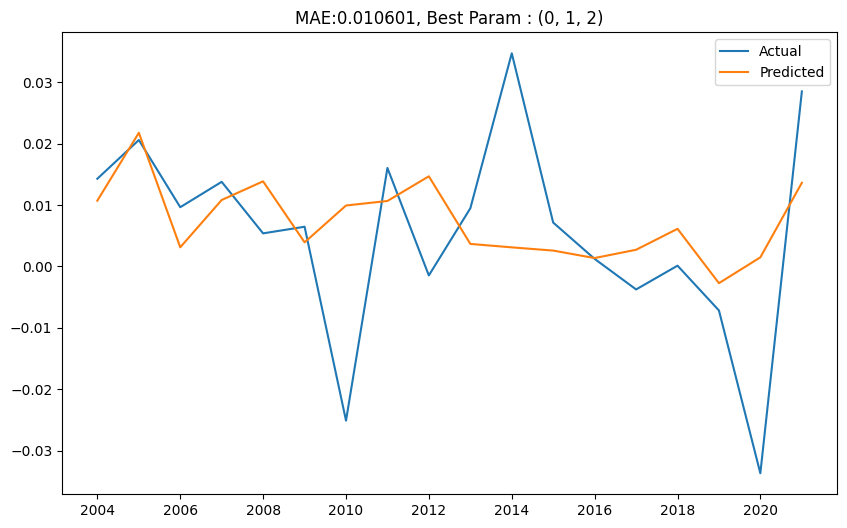

In [ ]:
# Metric
mae = mean_absolute_error(test_LA_y, prediction_test_la)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_LA_y.index, test_LA_y.values, label='Actual')
plt.plot(test_LA_y.index, prediction_test_la, label='Predicted')
plt.legend()
plt.title(label=f"MAE:{mae:.6f}, Best Param : {best_order_la}")
plt.show()

In [ ]:
prediction_train_la = result_la.predict(exog=train_LA_X, start=0, end=len(train_data)-1)

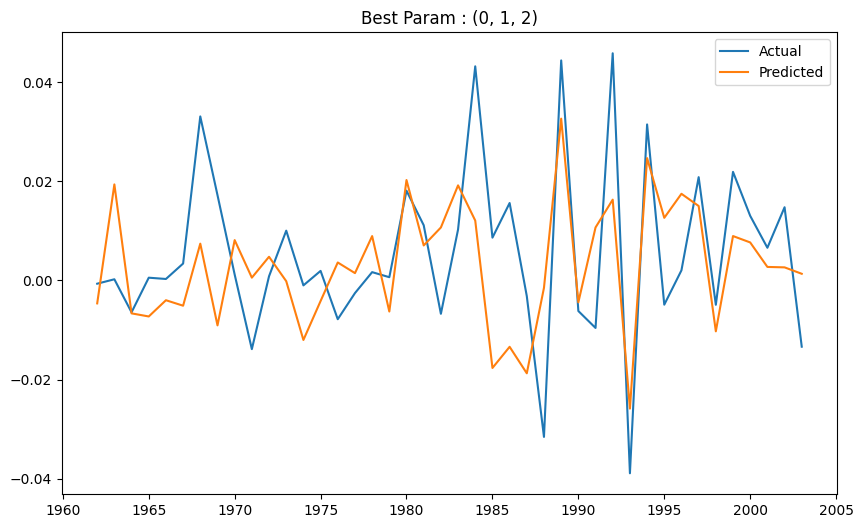

In [ ]:
# Plot
plt.plot(train_LA_y.index, train_LA_y.values, label='Actual')
plt.plot(train_LA_y.index, prediction_train_la, label='Predicted')
plt.legend()
plt.title(label=f"Best Param : {best_order_la}")
plt.show()

In [ ]:
prediction_all_la = result_la.predict(exog=test_LA_X,start=0, end=len(df_merged)-1)

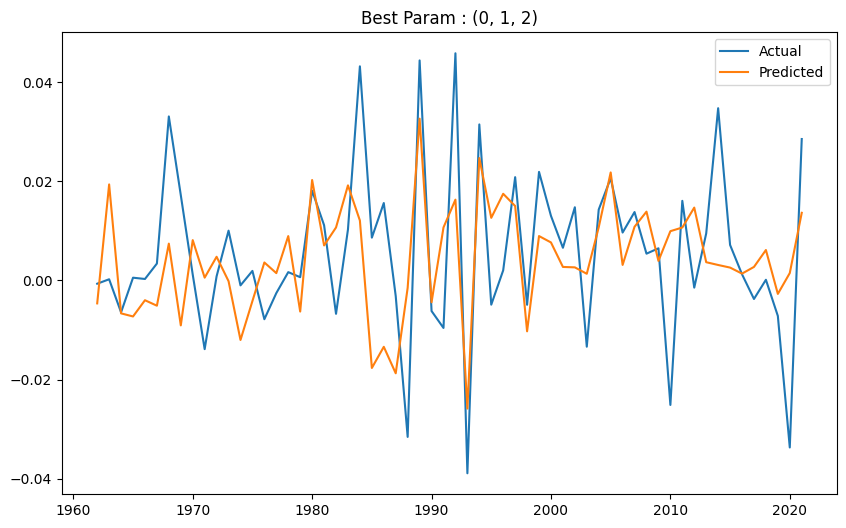

In [ ]:
# Plot
plt.plot(df_merged['Diff_laos'].index, df_merged['Diff_laos'].values, label='Actual')
plt.plot(df_merged['Diff_laos'].index, prediction_all_la, label='Predicted')
plt.legend()
plt.title(label=f"Best Param : {best_order_la}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['LA Rice Yields'].iloc[0]
final_test_predictions_la = prediction_test_la.cumsum() + base_value

In [ ]:
final_test_predictions_la = final_test_predictions_la.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_la)

2004-01-01    33901.904807
2005-01-01    36078.580707
2006-01-01    36390.885823
2007-01-01    37472.997099
2008-01-01    38859.059112
2009-01-01    39252.173519
2010-01-01    40244.655381
2011-01-01    41311.016720
2012-01-01    42778.874143
2013-01-01    43146.043604
2014-01-01    43457.130606
2015-01-01    43715.815278
2016-01-01    43852.910333
2017-01-01    44125.095654
2018-01-01    44738.058503
2019-01-01    44466.240102
2020-01-01    44614.576057
2021-01-01    45977.403464
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['LA Rice Yields'] = test_data['LA Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['LA Rice Yields'])

Year
2004-01-01    32831.0
2005-01-01    34890.0
2006-01-01    35855.0
2007-01-01    37233.0
2008-01-01    37772.0
2009-01-01    38419.0
2010-01-01    35909.0
2011-01-01    37513.0
2012-01-01    37367.0
2013-01-01    38315.0
2014-01-01    41786.0
2015-01-01    42501.0
2016-01-01    42625.0
2017-01-01    42251.0
2018-01-01    42264.0
2019-01-01    41548.0
2020-01-01    38181.0
2021-01-01    41031.0
Name: LA Rice Yields, dtype: float64


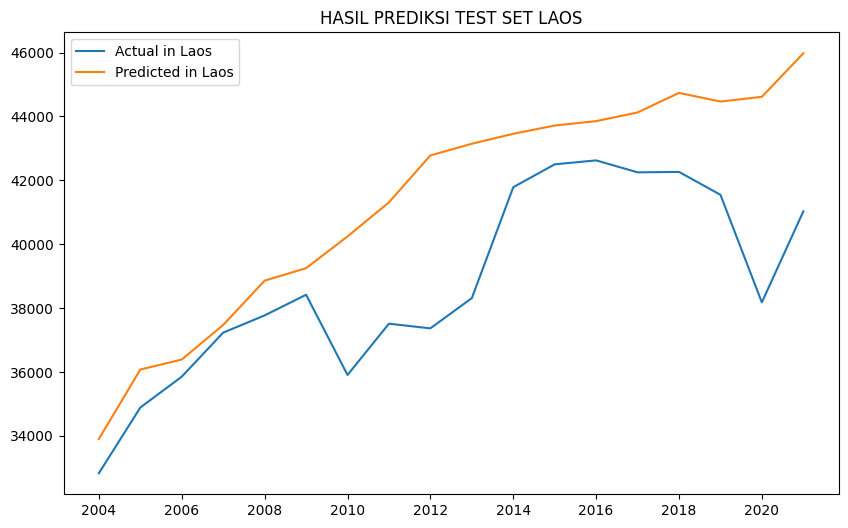

In [ ]:
# Plot
plt.plot(test_data['LA Rice Yields'].index, test_data['LA Rice Yields'].values, label='Actual in Laos')
plt.plot(test_data['LA Rice Yields'].index, final_test_predictions_la, label='Predicted in Laos')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET LAOS')
plt.show()

In [ ]:
base_value2 = train_data['LA Rice Yields'].iloc[0]
final_train_predictions_la = prediction_train_vn.cumsum() + base_value2

In [ ]:
final_train_predictions_la = final_train_predictions_la.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_la)

1962-01-01     8610.234508
1963-01-01     9571.899270
1964-01-01    10473.813589
1965-01-01    10265.099984
1966-01-01    10832.176004
1967-01-01    10824.725034
1968-01-01    12305.928119
1969-01-01    12005.109334
1970-01-01    12789.775399
1971-01-01    12876.272355
1972-01-01    11399.269903
1973-01-01    12722.181703
1974-01-01    13634.973741
1975-01-01    13477.431659
1976-01-01    13485.197227
1977-01-01    12784.689844
1978-01-01    11931.218485
1979-01-01    13428.847841
1980-01-01    14335.898796
1981-01-01    13797.823712
1982-01-01    13598.465841
1983-01-01    13611.082105
1984-01-01    13457.073883
1985-01-01    13960.280542
1986-01-01    15449.096296
1987-01-01    14790.011391
1988-01-01    16215.625680
1989-01-01    18110.208273
1990-01-01    18169.977148
1991-01-01    18499.239694
1992-01-01    20086.186025
1993-01-01    21896.868812
1994-01-01    22704.136041
1995-01-01    23226.749012
1996-01-01    24428.758972
1997-01-01    24329.673032
1998-01-01    24634.325495
1

In [ ]:
train_data['LA Rice Yields'] = train_data['LA Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['LA Rice Yields'])

Year
1962-01-01     8644.0
1963-01-01     8667.0
1964-01-01     8024.0
1965-01-01     8079.0
1966-01-01     8108.0
1967-01-01     8448.0
1968-01-01    11753.0
1969-01-01    13471.0
1970-01-01    13589.0
1971-01-01    12204.0
1972-01-01    12287.0
1973-01-01    13290.0
1974-01-01    13190.0
1975-01-01    13382.0
1976-01-01    12600.0
1977-01-01    12345.0
1978-01-01    12512.0
1979-01-01    12577.0
1980-01-01    14386.0
1981-01-01    15498.0
1982-01-01    14825.0
1983-01-01    15851.0
1984-01-01    20166.0
1985-01-01    21028.0
1986-01-01    22588.0
1987-01-01    22272.0
1988-01-01    19118.0
1989-01-01    23552.0
1990-01-01    22935.0
1991-01-01    21977.0
1992-01-01    26555.0
1993-01-01    22668.0
1994-01-01    25812.0
1995-01-01    25323.0
1996-01-01    25526.0
1997-01-01    27607.0
1998-01-01    27116.0
1999-01-01    29304.0
2000-01-01    30606.0
2001-01-01    31264.0
2002-01-01    32739.0
2003-01-01    31403.0
Name: LA Rice Yields, dtype: float64


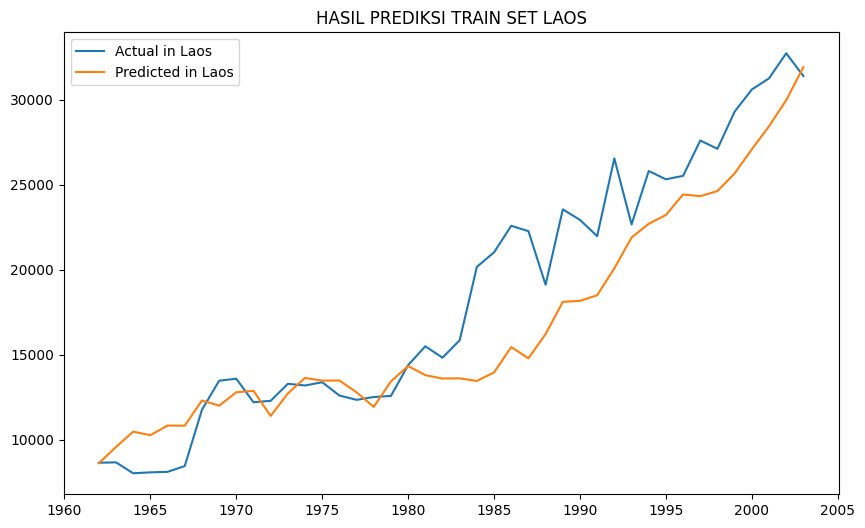

In [ ]:
# Plot
plt.plot(train_data['LA Rice Yields'].index, train_data['LA Rice Yields'].values, label='Actual in Laos')
plt.plot(train_data['LA Rice Yields'].index, final_train_predictions_la, label='Predicted in Laos')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET LAOS')
plt.show()

In [ ]:
base_value3 = df_merged['LA Rice Yields'].iloc[0]
final_predictions_la = prediction_all_la.cumsum() + base_value3

In [ ]:
final_predictions_la = final_predictions_la.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_la)

1962-01-01     8181.019731
1963-01-01    10115.976285
1964-01-01     9451.861397
1965-01-01     8725.344359
1966-01-01     8326.137415
1967-01-01     7816.467270
1968-01-01     8557.580933
1969-01-01     7651.312815
1970-01-01     8463.579721
1971-01-01     8519.404145
1972-01-01     8996.145062
1973-01-01     8980.578322
1974-01-01     7780.254955
1975-01-01     7364.724672
1976-01-01     7726.264589
1977-01-01     7873.376925
1978-01-01     8766.766561
1979-01-01     8139.464364
1980-01-01    10162.862246
1981-01-01    10867.857996
1982-01-01    11934.998756
1983-01-01    13850.943279
1984-01-01    15057.747515
1985-01-01    13293.201015
1986-01-01    11955.113062
1987-01-01    10083.189616
1988-01-01     9934.122249
1989-01-01    13194.368005
1990-01-01    12753.786064
1991-01-01    13821.327123
1992-01-01    15449.268059
1993-01-01    12865.780573
1994-01-01    15331.350857
1995-01-01    16592.770242
1996-01-01    18338.657167
1997-01-01    19838.361320
1998-01-01    18812.453458
1

In [ ]:
df_merged['LA Rice Yields'] = df_merged['LA Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['LA Rice Yields'])

Year
1962-01-01     8644.0
1963-01-01     8667.0
1964-01-01     8024.0
1965-01-01     8079.0
1966-01-01     8108.0
1967-01-01     8448.0
1968-01-01    11753.0
1969-01-01    13471.0
1970-01-01    13589.0
1971-01-01    12204.0
1972-01-01    12287.0
1973-01-01    13290.0
1974-01-01    13190.0
1975-01-01    13382.0
1976-01-01    12600.0
1977-01-01    12345.0
1978-01-01    12512.0
1979-01-01    12577.0
1980-01-01    14386.0
1981-01-01    15498.0
1982-01-01    14825.0
1983-01-01    15851.0
1984-01-01    20166.0
1985-01-01    21028.0
1986-01-01    22588.0
1987-01-01    22272.0
1988-01-01    19118.0
1989-01-01    23552.0
1990-01-01    22935.0
1991-01-01    21977.0
1992-01-01    26555.0
1993-01-01    22668.0
1994-01-01    25812.0
1995-01-01    25323.0
1996-01-01    25526.0
1997-01-01    27607.0
1998-01-01    27116.0
1999-01-01    29304.0
2000-01-01    30606.0
2001-01-01    31264.0
2002-01-01    32739.0
2003-01-01    31403.0
2004-01-01    32831.0
2005-01-01    34890.0
2006-01-01    35855.0
2007-

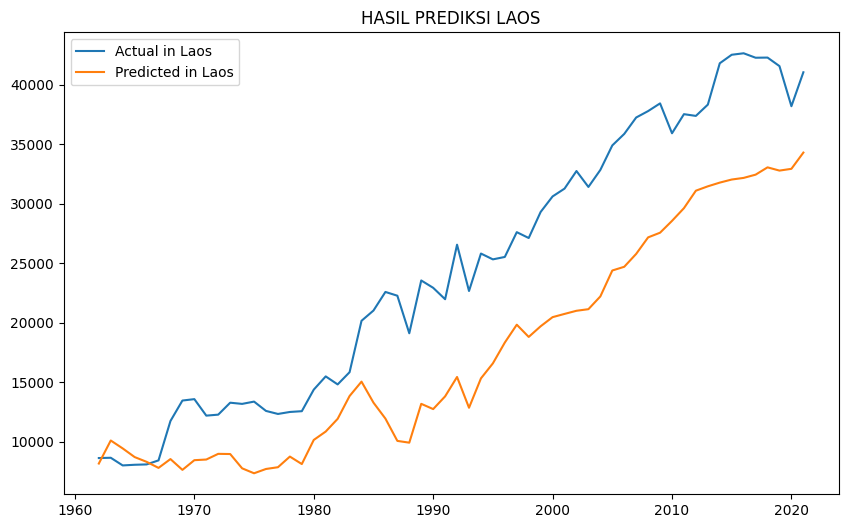

In [ ]:
# Plot
plt.plot(df_merged['LA Rice Yields'].index, df_merged['LA Rice Yields'].values, label='Actual in Laos')
plt.plot(df_merged['LA Rice Yields'].index, final_predictions_la, label='Predicted in Laos')
plt.legend()
plt.title('HASIL PREDIKSI LAOS')
plt.show()

# Eksperimen Myanmar

In [ ]:
print(len(train_MM_X))
print(len(train_MM_y))

print(len(test_MM_X))
print(len(test_MM_y))

42
42
18
18


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_MM_y,
                     exog= train_MM_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-196.384, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-211.062, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-198.382, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-228.098, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-227.737, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-234.211, Time=1.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-234.536, Time=0.38 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-230.617, Time=0.23 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-229.624, Time=0.15 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-230.984, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-232.265, Time=0.18 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-229.4

In [ ]:
best_order_mm = step_wise.order
print("Best Order:", best_order_mm)

Best Order: (2, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_MM_y, exog=train_MM_X,
                     order=best_order_mm)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_mm = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_mm.summary())

                               SARIMAX Results                                
Dep. Variable:           Diff_myanmar   No. Observations:                   42
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 127.214
Date:                Wed, 26 Jul 2023   AIC                           -230.429
Time:                        06:31:16   BIC                           -209.866
Sample:                    01-01-1962   HQIC                          -222.941
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.1872      0.203      0.920      0.358      -0.212       0.586
Diff_malaysia      0.1947      0.143      1.358      0.175      -0.086       0.476
Diff_brunei        0.0036      0.052

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_mm.aic, 2)
bic = round(result_mm.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -230.43
BIC: -209.87


In [ ]:
exog_test = test_MM_X
prediction_test_mm = result_mm.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_mm

2004-01-01    0.015068
2005-01-01    0.024125
2006-01-01   -0.000315
2007-01-01    0.017879
2008-01-01    0.020413
2009-01-01    0.012684
2010-01-01    0.009750
2011-01-01    0.013366
2012-01-01    0.011677
2013-01-01    0.011778
2014-01-01   -0.005268
2015-01-01    0.034951
2016-01-01    0.004858
2017-01-01    0.001242
2018-01-01    0.011900
2019-01-01   -0.001226
2020-01-01    0.011367
2021-01-01    0.015689
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_MM_y

Year
2004-01-01   -0.00444
2005-01-01    0.01079
2006-01-01   -0.00471
2007-01-01    0.00938
2008-01-01   -0.00467
2009-01-01   -0.00895
2010-01-01    0.00842
2011-01-01    0.01946
2012-01-01   -0.00002
2013-01-01   -0.00402
2014-01-01   -0.00877
2015-01-01   -0.02080
2016-01-01    0.01172
2017-01-01    0.01012
2018-01-01   -0.00310
2019-01-01   -0.01216
2020-01-01   -0.00100
2021-01-01    0.00803
Name: Diff_myanmar, dtype: float64

MAE:0.013796


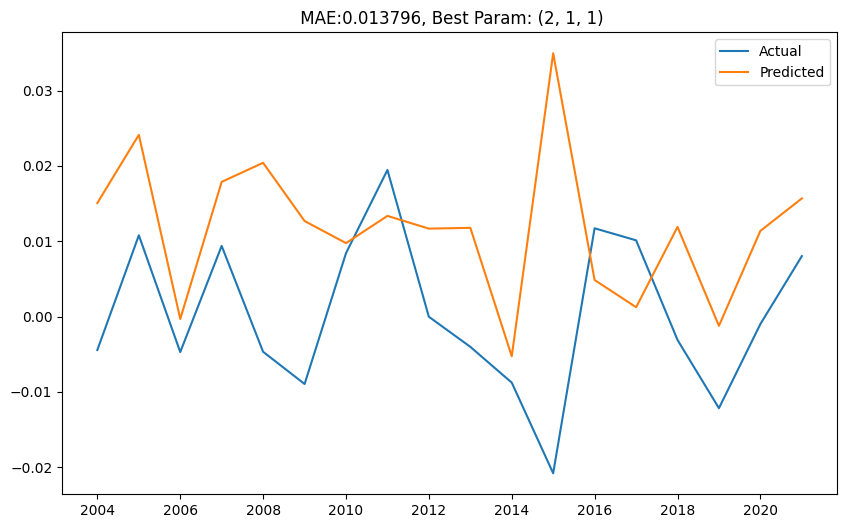

In [ ]:
# Metric
mae = mean_absolute_error(test_MM_y, prediction_test_mm)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_MM_y.index, test_MM_y.values, label='Actual')
plt.plot(test_MM_y.index, prediction_test_mm, label='Predicted')
plt.legend()
plt.title(label=f" MAE:{mae:.6f}, Best Param: {best_order_mm}")
plt.show()

In [ ]:
prediction_train_mm = result_mm.predict(exog=train_MM_X, start=0, end=len(train_data)-1)

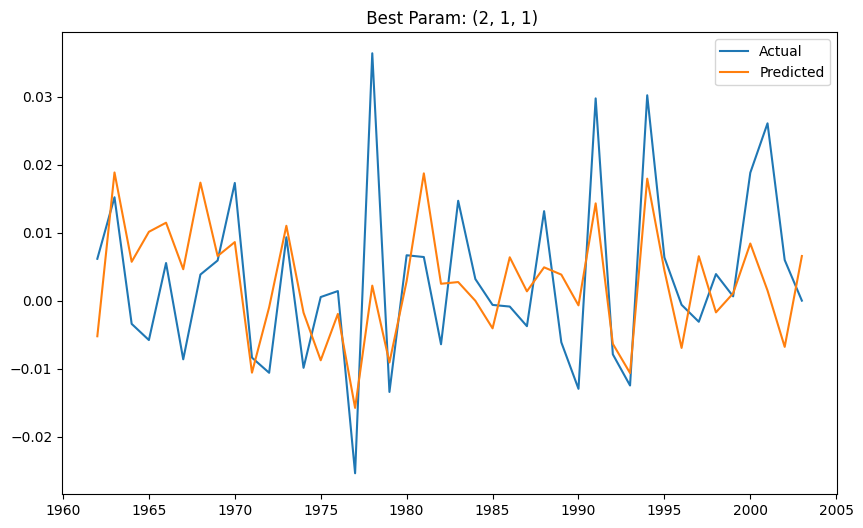

In [ ]:

# Plot
plt.plot(train_MM_y.index, train_MM_y.values, label='Actual')
plt.plot(train_MM_y.index, prediction_train_mm, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_mm}")
plt.show()

In [ ]:
prediction_all_mm = result_mm.predict(exog=test_MM_X,start=0, end=len(df_merged)-1)

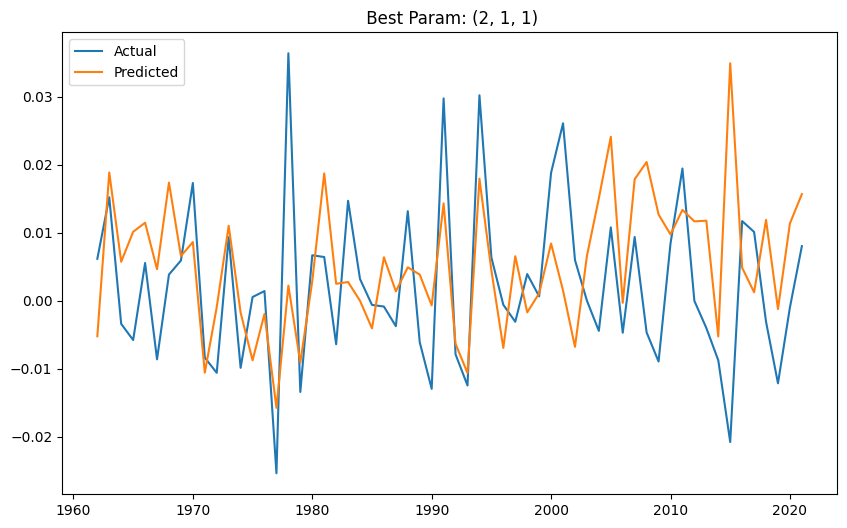

In [ ]:

# Plot
plt.plot(df_merged['Diff_myanmar'].index, df_merged['Diff_myanmar'].values, label='Actual')
plt.plot(df_merged['Diff_myanmar'].index, prediction_all_mm, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_mm}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['MM Rice Yields'].iloc[0]
final_test_predictions_mm = prediction_test_mm.cumsum() + base_value

In [ ]:
final_test_predictions_mm = final_test_predictions_mm.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_mm)

2004-01-01    37291.826789
2005-01-01    39704.353796
2006-01-01    39672.810116
2007-01-01    41460.754752
2008-01-01    43502.069793
2009-01-01    44770.462578
2010-01-01    45745.483624
2011-01-01    47082.062913
2012-01-01    48249.754882
2013-01-01    49427.506710
2014-01-01    48900.736567
2015-01-01    52395.812789
2016-01-01    52881.652433
2017-01-01    53005.890769
2018-01-01    54195.930598
2019-01-01    54073.375499
2020-01-01    55210.078057
2021-01-01    56778.974054
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['MM Rice Yields'] = test_data['MM Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['MM Rice Yields'])

Year
2004-01-01    35785.0
2005-01-01    36899.0
2006-01-01    37694.0
2007-01-01    38639.0
2008-01-01    39688.0
2009-01-01    39917.0
2010-01-01    40026.0
2011-01-01    37733.0
2012-01-01    37512.0
2013-01-01    37930.0
2014-01-01    38464.0
2015-01-01    38718.0
2016-01-01    38181.0
2017-01-01    38218.0
2018-01-01    38568.0
2019-01-01    37957.0
2020-01-01    38043.0
2021-01-01    38108.0
Name: MM Rice Yields, dtype: float64


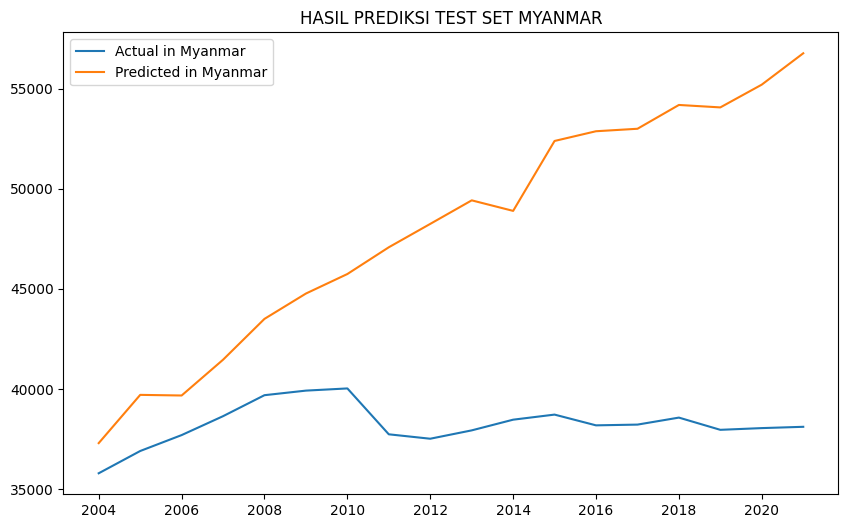

In [ ]:
# Plot
plt.plot(test_data['MM Rice Yields'].index, test_data['MM Rice Yields'].values, label='Actual in Myanmar')
plt.plot(test_data['MM Rice Yields'].index, final_test_predictions_mm, label='Predicted in Myanmar')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET MYANMAR')
plt.show()

In [ ]:
base_value2 = train_data['MM Rice Yields'].iloc[0]
final_train_predictions_mm = prediction_train_mm.cumsum() + base_value2

In [ ]:
train_data['MM Rice Yields'] = train_data['MM Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['MM Rice Yields'])

Year
1962-01-01    16469.0
1963-01-01    15957.0
1964-01-01    17097.0
1965-01-01    16614.0
1966-01-01    14694.0
1967-01-01    16510.0
1968-01-01    16843.0
1969-01-01    17092.0
1970-01-01    16973.0
1971-01-01    17161.0
1972-01-01    16247.0
1973-01-01    17629.0
1974-01-01    17574.0
1975-01-01    18307.0
1976-01-01    18974.0
1977-01-01    19453.0
1978-01-01    21012.0
1979-01-01    23521.0
1980-01-01    27739.0
1981-01-01    29419.0
1982-01-01    31505.0
1983-01-01    30666.0
1984-01-01    30981.0
1985-01-01    30718.0
1986-01-01    30279.0
1987-01-01    30424.0
1988-01-01    29084.0
1989-01-01    29174.0
1990-01-01    29353.0
1991-01-01    28400.0
1992-01-01    28882.0
1993-01-01    30063.0
1994-01-01    31182.0
1995-01-01    29290.0
1996-01-01    30159.0
1997-01-01    30308.0
1998-01-01    30793.0
1999-01-01    32405.0
2000-01-01    33301.0
2001-01-01    33639.0
2002-01-01    33655.0
2003-01-01    34883.0
Name: MM Rice Yields, dtype: float64


In [ ]:
final_train_predictions_mm = final_train_predictions_mm.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_mm)

1962-01-01    15945.693347
1963-01-01    17833.193591
1964-01-01    18406.209713
1965-01-01    19420.268488
1966-01-01    20568.490277
1967-01-01    21031.601081
1968-01-01    22769.712597
1969-01-01    23427.304350
1970-01-01    24290.295666
1971-01-01    23231.113581
1972-01-01    23134.522794
1973-01-01    24237.507337
1974-01-01    24061.819565
1975-01-01    23184.963498
1976-01-01    22990.911438
1977-01-01    21413.456335
1978-01-01    21635.620961
1979-01-01    20726.249359
1980-01-01    21013.437297
1981-01-01    22887.715068
1982-01-01    23137.136327
1983-01-01    23411.853879
1984-01-01    23410.611939
1985-01-01    23003.777704
1986-01-01    23643.084078
1987-01-01    23781.176869
1988-01-01    24272.608812
1989-01-01    24656.769162
1990-01-01    24588.347612
1991-01-01    26021.047761
1992-01-01    25386.590175
1993-01-01    24321.465842
1994-01-01    26117.864509
1995-01-01    26564.321037
1996-01-01    25869.263160
1997-01-01    26524.387845
1998-01-01    26352.890030
1

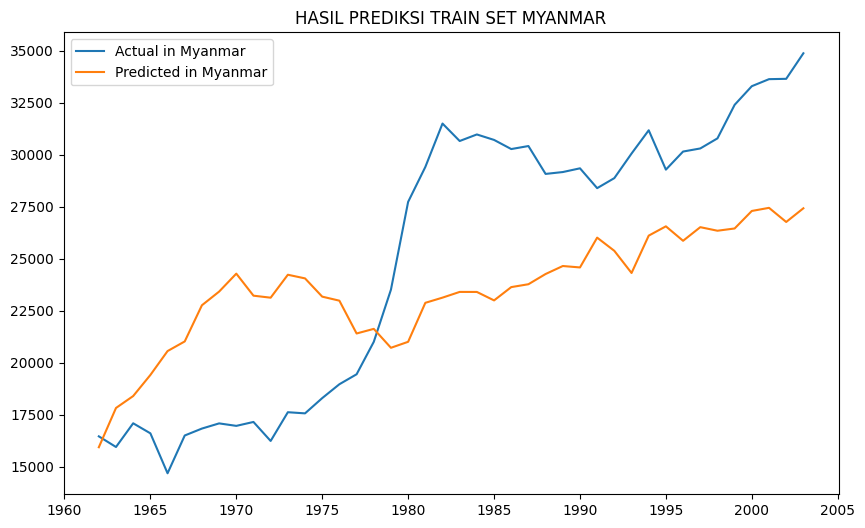

In [ ]:
# Plot
plt.plot(train_data['MM Rice Yields'].index, train_data['MM Rice Yields'].values, label='Actual in Myanmar')
plt.plot(train_data['MM Rice Yields'].index, final_train_predictions_mm, label='Predicted in Myanmar')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET MYANMAR')
plt.show()

In [ ]:
base_value3 = df_merged['MM Rice Yields'].iloc[0]
final_predictions_mm = prediction_all_mm.cumsum() + base_value3

In [ ]:
final_predictions_mm = final_predictions_mm.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_mm)

1962-01-01    15945.693347
1963-01-01    17833.193591
1964-01-01    18406.209713
1965-01-01    19420.268488
1966-01-01    20568.490277
1967-01-01    21031.601081
1968-01-01    22769.712597
1969-01-01    23427.304350
1970-01-01    24290.295666
1971-01-01    23231.113581
1972-01-01    23134.522794
1973-01-01    24237.507337
1974-01-01    24061.819565
1975-01-01    23184.963498
1976-01-01    22990.911438
1977-01-01    21413.456335
1978-01-01    21635.620961
1979-01-01    20726.249359
1980-01-01    21013.437297
1981-01-01    22887.715068
1982-01-01    23137.136327
1983-01-01    23411.853879
1984-01-01    23410.611939
1985-01-01    23003.777704
1986-01-01    23643.084078
1987-01-01    23781.176869
1988-01-01    24272.608812
1989-01-01    24656.769162
1990-01-01    24588.347612
1991-01-01    26021.047761
1992-01-01    25386.590175
1993-01-01    24321.465842
1994-01-01    26117.864509
1995-01-01    26564.321037
1996-01-01    25869.263160
1997-01-01    26524.387845
1998-01-01    26352.890030
1

In [ ]:
df_merged['MM Rice Yields'] = df_merged['MM Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['MM Rice Yields'])

Year
1962-01-01    16469.0
1963-01-01    15957.0
1964-01-01    17097.0
1965-01-01    16614.0
1966-01-01    14694.0
1967-01-01    16510.0
1968-01-01    16843.0
1969-01-01    17092.0
1970-01-01    16973.0
1971-01-01    17161.0
1972-01-01    16247.0
1973-01-01    17629.0
1974-01-01    17574.0
1975-01-01    18307.0
1976-01-01    18974.0
1977-01-01    19453.0
1978-01-01    21012.0
1979-01-01    23521.0
1980-01-01    27739.0
1981-01-01    29419.0
1982-01-01    31505.0
1983-01-01    30666.0
1984-01-01    30981.0
1985-01-01    30718.0
1986-01-01    30279.0
1987-01-01    30424.0
1988-01-01    29084.0
1989-01-01    29174.0
1990-01-01    29353.0
1991-01-01    28400.0
1992-01-01    28882.0
1993-01-01    30063.0
1994-01-01    31182.0
1995-01-01    29290.0
1996-01-01    30159.0
1997-01-01    30308.0
1998-01-01    30793.0
1999-01-01    32405.0
2000-01-01    33301.0
2001-01-01    33639.0
2002-01-01    33655.0
2003-01-01    34883.0
2004-01-01    35785.0
2005-01-01    36899.0
2006-01-01    37694.0
2007-

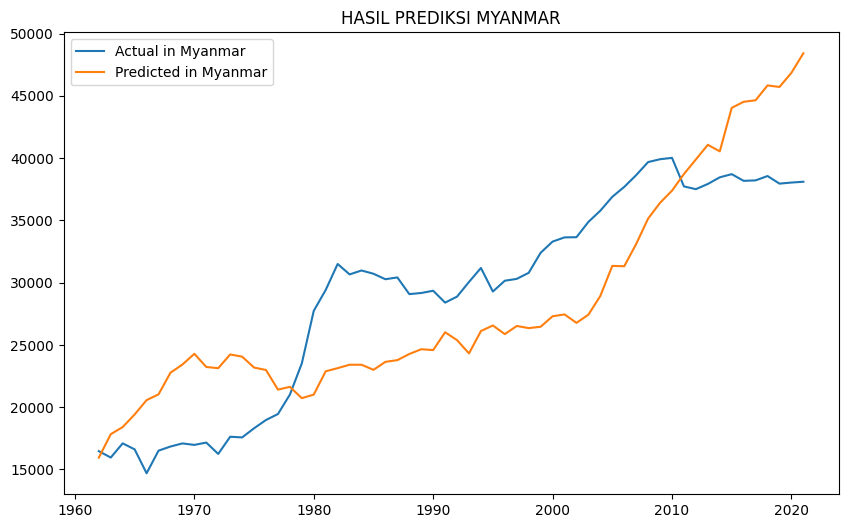

In [ ]:
# Plot
plt.plot(df_merged['MM Rice Yields'].index, df_merged['MM Rice Yields'].values, label='Actual in Myanmar')
plt.plot(df_merged['MM Rice Yields'].index, final_predictions_mm, label='Predicted in Myanmar')
plt.legend()
plt.title('HASIL PREDIKSI MYANMAR')
plt.show()

# Eksperimen Kamboja

In [ ]:
print(len(train_KH_X))
print(len(train_KH_y))

print(len(test_KH_X))
print(len(test_KH_y))

42
42
18
18


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_KH_y,
                     exog= train_KH_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-184.424, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-201.847, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.177, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-186.362, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-215.151, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-214.263, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-217.780, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-219.100, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-215.101, Time=0.28 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 2.139 seconds


In [ ]:
best_order_kh = step_wise.order
print("Best Order:", best_order_kh)

Best Order: (0, 1, 2)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_KH_y, exog=train_KH_X,
                     order=best_order_kh)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_kh = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_kh.summary())

                               SARIMAX Results                                
Dep. Variable:           Diff_kamboja   No. Observations:                   42
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 118.148
Date:                Wed, 26 Jul 2023   AIC                           -214.297
Time:                        06:31:22   BIC                           -195.447
Sample:                    01-01-1962   HQIC                          -207.433
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.4833      0.369      1.310      0.190      -0.240       1.207
Diff_malaysia     -0.2398      0.312     -0.769      0.442      -0.851       0.372
Diff_brunei       -0.0491      0.065

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_kh.aic, 2)
bic = round(result_kh.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -214.3
BIC: -195.45


In [ ]:
exog_test = test_KH_X
prediction_test_kh = result_kh.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_kh

2004-01-01   -0.004497
2005-01-01    0.003160
2006-01-01   -0.000193
2007-01-01    0.001530
2008-01-01    0.011887
2009-01-01   -0.001095
2010-01-01    0.002205
2011-01-01    0.002983
2012-01-01    0.003530
2013-01-01   -0.004742
2014-01-01    0.017355
2015-01-01   -0.026295
2016-01-01   -0.008239
2017-01-01    0.003642
2018-01-01    0.004711
2019-01-01   -0.005206
2020-01-01   -0.012804
2021-01-01    0.007909
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_KH_y

Year
2004-01-01   -0.01239
2005-01-01    0.05020
2006-01-01    0.00100
2007-01-01    0.01323
2008-01-01    0.01241
2009-01-01    0.00906
2010-01-01    0.01334
2011-01-01   -0.00123
2012-01-01    0.01318
2013-01-01    0.00799
2014-01-01    0.00920
2015-01-01    0.00739
2016-01-01    0.01093
2017-01-01   -0.00469
2018-01-01    0.00037
2019-01-01   -0.00658
2020-01-01    0.00498
2021-01-01    0.01224
Name: Diff_kamboja, dtype: float64

MAE:0.011856


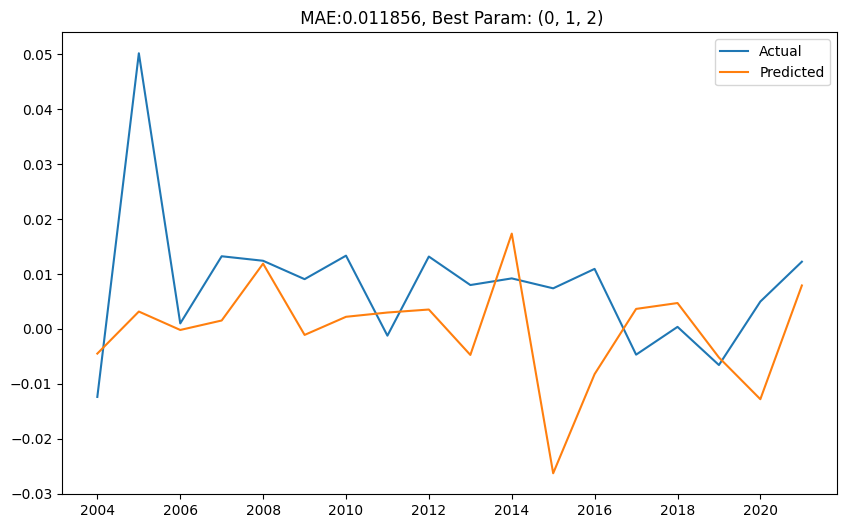

In [ ]:
# Metric
mae = mean_absolute_error(test_KH_y, prediction_test_kh)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_KH_y.index, test_KH_y.values, label='Actual')
plt.plot(test_KH_y.index, prediction_test_kh, label='Predicted')
plt.legend()
plt.title(label=f" MAE:{mae:.6f}, Best Param: {best_order_kh}")
plt.show()

In [ ]:
prediction_train_kh = result_kh.predict(exog=train_KH_X, start=0, end=len(train_data)-1)

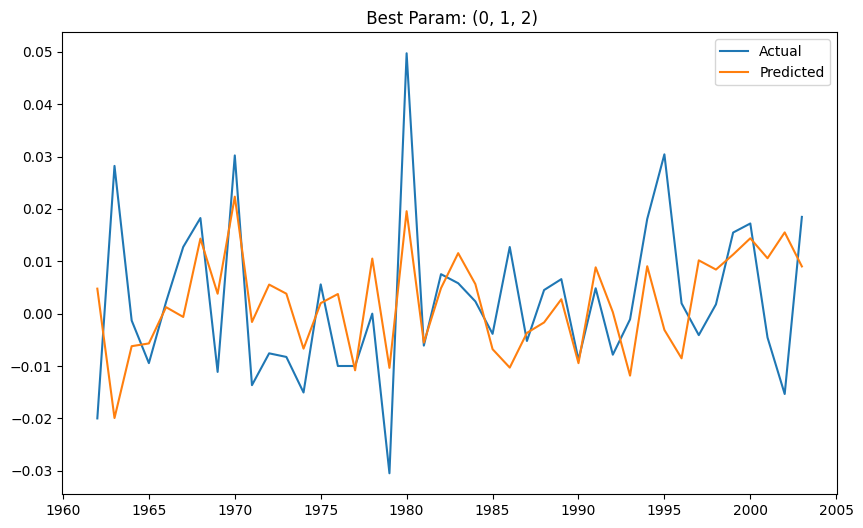

In [ ]:
# Plot
plt.plot(train_KH_y.index, train_KH_y.values, label='Actual')
plt.plot(train_KH_y.index, prediction_train_kh, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_kh}")
plt.show()

In [ ]:
prediction_all_kh = result_kh.predict(exog=test_KH_X,start=0, end=len(df_merged)-1)

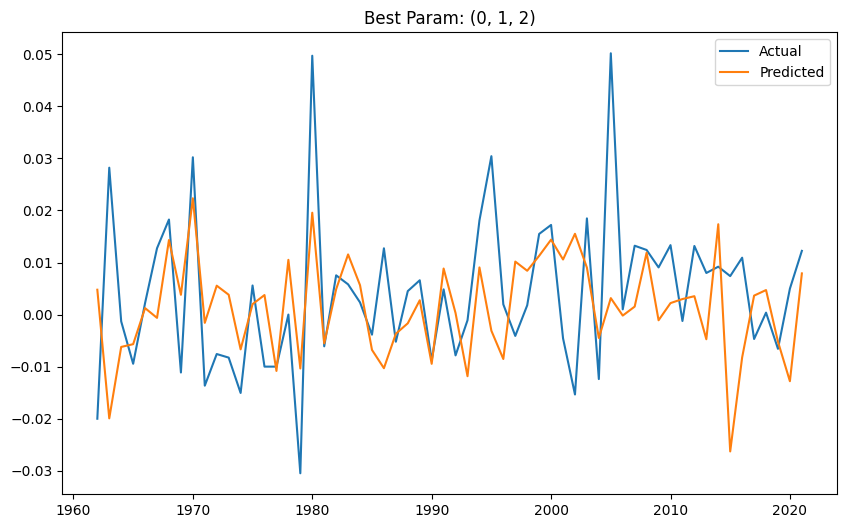

In [ ]:
# Plot
plt.plot(df_merged['Diff_kamboja'].index, df_merged['Diff_kamboja'].values, label='Actual')
plt.plot(df_merged['Diff_kamboja'].index, prediction_all_kh, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_kh}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['KH Rice Yields'].iloc[0]
final_test_predictions_kh = prediction_test_kh.cumsum() + base_value

In [ ]:
final_test_predictions_kh = final_test_predictions_kh.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_kh)

2004-01-01    19323.296453
2005-01-01    19639.308294
2006-01-01    19620.039269
2007-01-01    19773.037076
2008-01-01    20961.713711
2009-01-01    20852.247311
2010-01-01    21072.724800
2011-01-01    21370.999700
2012-01-01    21723.978729
2013-01-01    21249.801849
2014-01-01    22985.349103
2015-01-01    20355.864482
2016-01-01    19531.965199
2017-01-01    19896.169674
2018-01-01    20367.312022
2019-01-01    19846.726546
2020-01-01    18566.287669
2021-01-01    19357.215150
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['KH Rice Yields'] = test_data['KH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['KH Rice Yields'])

Year
2004-01-01    19773.0
2005-01-01    24793.0
2006-01-01    24893.0
2007-01-01    26216.0
2008-01-01    27457.0
2009-01-01    28363.0
2010-01-01    29697.0
2011-01-01    29574.0
2012-01-01    30892.0
2013-01-01    31691.0
2014-01-01    32611.0
2015-01-01    33350.0
2016-01-01    34443.0
2017-01-01    33974.0
2018-01-01    34011.0
2019-01-01    33353.0
2020-01-01    33851.0
2021-01-01    35075.0
Name: KH Rice Yields, dtype: float64


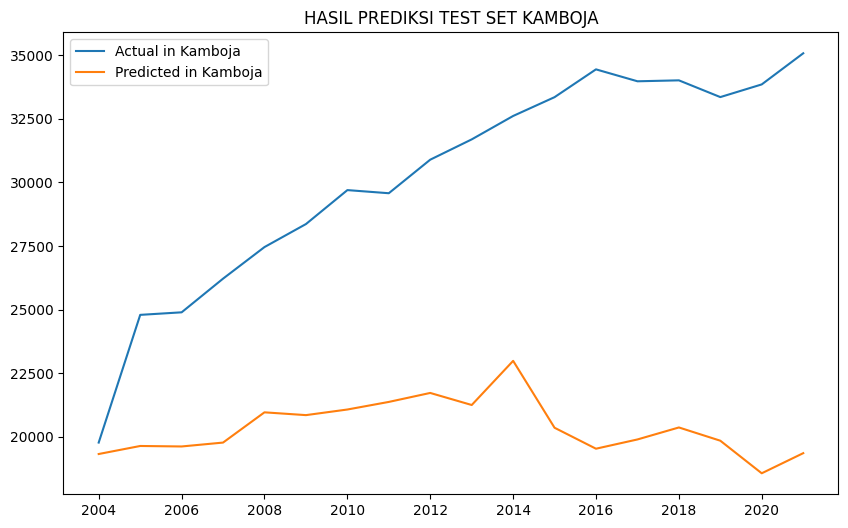

In [ ]:
# Plot
plt.plot(test_data['KH Rice Yields'].index, test_data['KH Rice Yields'].values, label='Actual in Kamboja')
plt.plot(test_data['KH Rice Yields'].index, final_test_predictions_kh, label='Predicted in Kamboja')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET KAMBOJA')
plt.show()

In [ ]:
base_value2 = train_data['KH Rice Yields'].iloc[0]
final_train_predictions_kh = prediction_train_kh.cumsum() + base_value2

In [ ]:
final_train_predictions_kh = final_train_predictions_kh.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_kh)

1962-01-01     9397.364997
1963-01-01     7403.642093
1964-01-01     6781.931984
1965-01-01     6213.199488
1966-01-01     6337.003610
1967-01-01     6273.809309
1968-01-01     7706.678657
1969-01-01     8087.004343
1970-01-01    10321.453714
1971-01-01    10162.276801
1972-01-01    10717.308516
1973-01-01    11098.241723
1974-01-01    10429.734107
1975-01-01    10630.327012
1976-01-01    11005.461860
1977-01-01     9922.935745
1978-01-01    10974.626177
1979-01-01     9938.923039
1980-01-01    11895.871605
1981-01-01    11343.013964
1982-01-01    11830.136746
1983-01-01    12985.648168
1984-01-01    13550.241954
1985-01-01    12871.601192
1986-01-01    11841.170588
1987-01-01    11473.400159
1988-01-01    11305.487887
1989-01-01    11580.347210
1990-01-01    10634.492250
1991-01-01    11519.140753
1992-01-01    11548.270165
1993-01-01    10364.375648
1994-01-01    11270.103807
1995-01-01    10959.666015
1996-01-01    10106.199007
1997-01-01    11124.073509
1998-01-01    11966.106302
1

In [ ]:
train_data['KH Rice Yields'] = train_data['KH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['KH Rice Yields'])

Year
1962-01-01     8920.0
1963-01-01    11742.0
1964-01-01    11611.0
1965-01-01    10666.0
1966-01-01    10889.0
1967-01-01    12163.0
1968-01-01    13989.0
1969-01-01    12876.0
1970-01-01    15898.0
1971-01-01    14532.0
1972-01-01    13774.0
1973-01-01    12947.0
1974-01-01    11441.0
1975-01-01    12000.0
1976-01-01    11000.0
1977-01-01    10000.0
1978-01-01    10000.0
1979-01-01     6951.0
1980-01-01    11924.0
1981-01-01    11314.0
1982-01-01    12068.0
1983-01-01    12649.0
1984-01-01    12883.0
1985-01-01    12497.0
1986-01-01    13770.0
1987-01-01    13248.0
1988-01-01    13699.0
1989-01-01    14358.0
1990-01-01    13477.0
1991-01-01    13962.0
1992-01-01    13178.0
1993-01-01    13069.0
1994-01-01    14877.0
1995-01-01    17920.0
1996-01-01    18116.0
1997-01-01    17706.0
1998-01-01    17884.0
1999-01-01    19433.0
2000-01-01    21155.0
2001-01-01    20699.0
2002-01-01    19164.0
2003-01-01    21012.0
Name: KH Rice Yields, dtype: float64


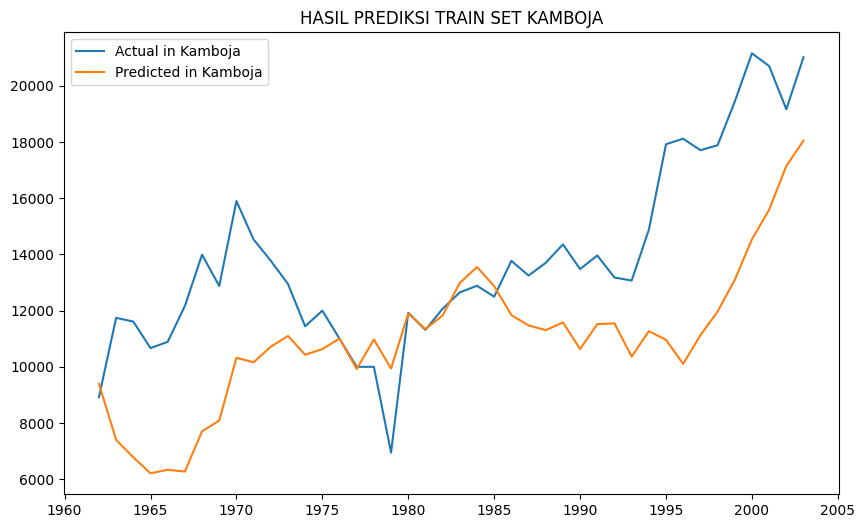

In [ ]:
# Plot
plt.plot(train_data['KH Rice Yields'].index, train_data['KH Rice Yields'].values, label='Actual in Kamboja')
plt.plot(train_data['KH Rice Yields'].index, final_train_predictions_kh, label='Predicted in Kamboja')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET KAMBOJA')
plt.show()

In [ ]:
base_value3 = df_merged['KH Rice Yields'].iloc[0]
final_predictions_kh = prediction_all_kh.cumsum() + base_value3

In [ ]:
df_merged['KH Rice Yields'] = df_merged['KH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['KH Rice Yields'])

Year
1962-01-01     8920.0
1963-01-01    11742.0
1964-01-01    11611.0
1965-01-01    10666.0
1966-01-01    10889.0
1967-01-01    12163.0
1968-01-01    13989.0
1969-01-01    12876.0
1970-01-01    15898.0
1971-01-01    14532.0
1972-01-01    13774.0
1973-01-01    12947.0
1974-01-01    11441.0
1975-01-01    12000.0
1976-01-01    11000.0
1977-01-01    10000.0
1978-01-01    10000.0
1979-01-01     6951.0
1980-01-01    11924.0
1981-01-01    11314.0
1982-01-01    12068.0
1983-01-01    12649.0
1984-01-01    12883.0
1985-01-01    12497.0
1986-01-01    13770.0
1987-01-01    13248.0
1988-01-01    13699.0
1989-01-01    14358.0
1990-01-01    13477.0
1991-01-01    13962.0
1992-01-01    13178.0
1993-01-01    13069.0
1994-01-01    14877.0
1995-01-01    17920.0
1996-01-01    18116.0
1997-01-01    17706.0
1998-01-01    17884.0
1999-01-01    19433.0
2000-01-01    21155.0
2001-01-01    20699.0
2002-01-01    19164.0
2003-01-01    21012.0
2004-01-01    19773.0
2005-01-01    24793.0
2006-01-01    24893.0
2007-

In [ ]:
final_predictions_kh = final_predictions_kh.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_kh)

1962-01-01     9397.364997
1963-01-01     7403.642093
1964-01-01     6781.931984
1965-01-01     6213.199488
1966-01-01     6337.003610
1967-01-01     6273.809309
1968-01-01     7706.678657
1969-01-01     8087.004343
1970-01-01    10321.453714
1971-01-01    10162.276801
1972-01-01    10717.308516
1973-01-01    11098.241723
1974-01-01    10429.734107
1975-01-01    10630.327012
1976-01-01    11005.461860
1977-01-01     9922.935745
1978-01-01    10974.626177
1979-01-01     9938.923039
1980-01-01    11895.871605
1981-01-01    11343.013964
1982-01-01    11830.136746
1983-01-01    12985.648168
1984-01-01    13550.241954
1985-01-01    12871.601192
1986-01-01    11841.170588
1987-01-01    11473.400159
1988-01-01    11305.487887
1989-01-01    11580.347210
1990-01-01    10634.492250
1991-01-01    11519.140753
1992-01-01    11548.270165
1993-01-01    10364.375648
1994-01-01    11270.103807
1995-01-01    10959.666015
1996-01-01    10106.199007
1997-01-01    11124.073509
1998-01-01    11966.106302
1

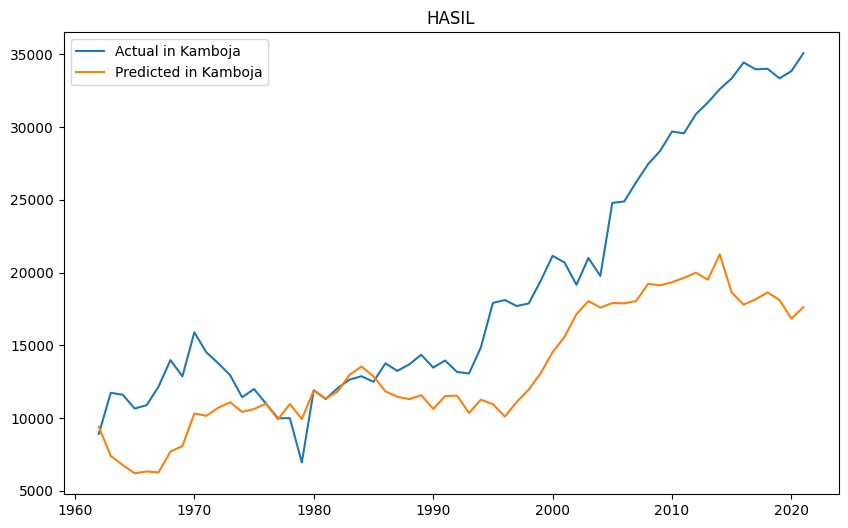

In [ ]:
# Plot
plt.plot(df_merged['KH Rice Yields'].index, df_merged['KH Rice Yields'].values, label='Actual in Kamboja')
plt.plot(df_merged['KH Rice Yields'].index, final_predictions_kh, label='Predicted in Kamboja')
plt.legend()
plt.title('HASIL')
plt.show()